In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.42


In [3]:
import torch
from gcpds_cv_pykit.datasets import OxfordIITPet
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import DeepLabV3Plus
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
OxfordIITPet()

100%|██████████| 626M/626M [00:23<00:00, 28.3MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/lucasiturriago/oxfordiiitpet/versions/3
Dataset copied to: /content/datasets/oxfordiiitpet
Original download folder '/root/.cache/kagglehub/datasets/lucasiturriago/oxfordiiitpet/versions/3' deleted.


'/content/datasets/oxfordiiitpet'

In [6]:
config = {"Dir of dataset": "./datasets/oxfordiiitpet", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 1, "Single class train": None, "Single class test": None, "Single class valid": None,
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "DeepLabV3+", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-DeepLabV3+-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Train/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1024


Organizing masks: 100%|██████████| 1024/1024 [00:00<00:00, 198933.18it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Valid/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 256


Organizing masks: 100%|██████████| 256/256 [00:00<00:00, 109031.46it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Test/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 256


Organizing masks: 100%|██████████| 256/256 [00:00<00:00, 82027.64it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 1, 256, 256])


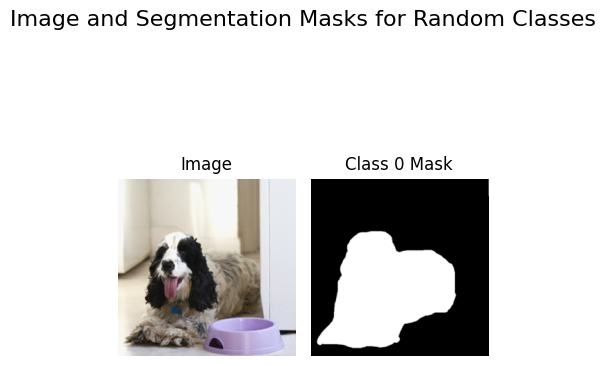

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 233MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

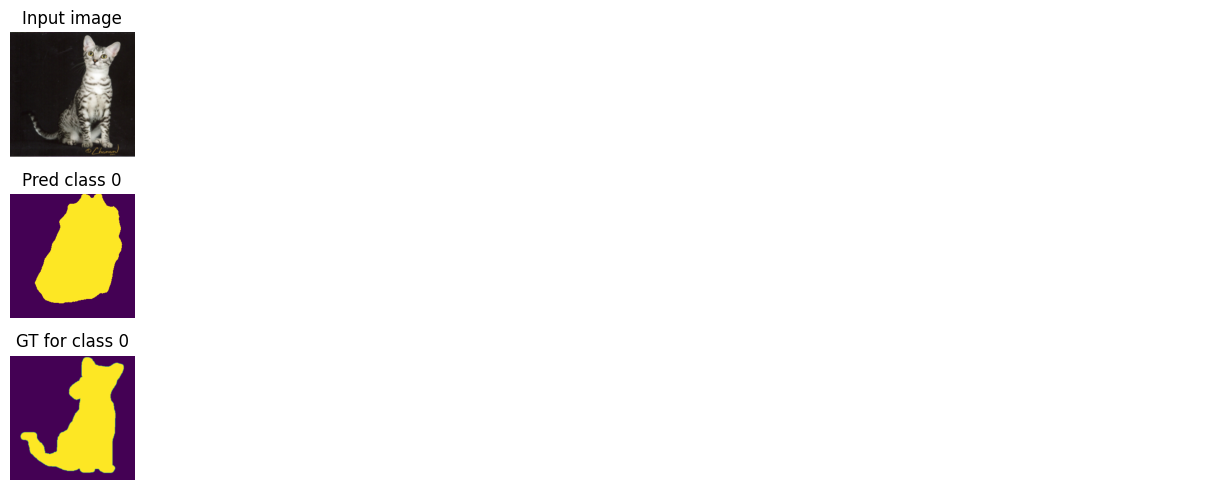

Train loss: 0.38317 | Time: 0m 24s | Val loss: 0.39035
Train_DICE_avg: 0.72511 | Train_Jaccard_avg: 0.58569 | Train_Sensitivity_avg: 0.65070 | Train_Specificity_avg: 0.86163 
Class 0 - Train_DICE: 0.72511 | Train_Jaccard: 0.58569 | Train_Sensitivity: 0.65070 | Train_Specificity: 0.86163 
Val_DICE_avg: 0.78361 | Val_Jaccard_avg: 0.65510 | Val_Sensitivity_avg: 0.78166 | Val_Specificity_avg: 0.85164 
Class 0 - Val_DICE: 0.78361 | Val_Jaccard: 0.65510 | Val_Sensitivity: 0.78166 | Val_Specificity: 0.85164 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.24906 | Time: 0m 47s | Val loss: 0.21334
Train_DICE_avg: 0.81162 | Train_Jaccard_avg: 0.69524 | Train_Sensitivity_avg: 0.75525 | Train_Specificity_avg: 0.91207 
Class 0 - Train_DICE: 0.81162 | Train_Jaccard: 0.69524 | Train_Sensitivity: 0.75525 | Train_Specificity: 0.91207 
Val_DICE_avg: 0.84199 | Val_Jaccard_avg: 0.73800 | Val_Sensitivity_avg: 0.81255 | Val_Specificity_avg: 0.91376 
Class 0 - Val_DICE: 0.84199 | Val_Jaccard: 0.73800 | Val_Sensitivity: 0.81255 | Val_Specificity: 0.91376 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.20423 | Time: 1m 9s | Val loss: 0.18873
Train_DICE_avg: 0.83920 | Train_Jaccard_avg: 0.73248 | Train_Sensitivity_avg: 0.79799 | Train_Specificity_avg: 0.91712 
Class 0 - Train_DICE: 0.83920 | Train_Jaccard: 0.73248 | Train_Sensitivity: 0.79799 | Train_Specificity: 0.91712 
Val_DICE_avg: 0.85508 | Val_Jaccard_avg: 0.75567 | Val_Sensitivity_avg: 0.83372 | Val_Specificity_avg: 0.91840 
Class 0 - Val_DICE: 0.85508 | Val_Jaccard: 0.75567 | Val_Sensitivity: 0.83372 | Val_Specificity: 0.91840 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18246 | Time: 1m 32s | Val loss: 0.16993
Train_DICE_avg: 0.85145 | Train_Jaccard_avg: 0.74984 | Train_Sensitivity_avg: 0.81900 | Train_Specificity_avg: 0.91813 
Class 0 - Train_DICE: 0.85145 | Train_Jaccard: 0.74984 | Train_Sensitivity: 0.81900 | Train_Specificity: 0.91813 
Val_DICE_avg: 0.86332 | Val_Jaccard_avg: 0.76874 | Val_Sensitivity_avg: 0.83261 | Val_Specificity_avg: 0.92914 
Class 0 - Val_DICE: 0.86332 | Val_Jaccard: 0.76874 | Val_Sensitivity: 0.83261 | Val_Specificity: 0.92914 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16894 | Time: 1m 54s | Val loss: 0.15849
Train_DICE_avg: 0.85862 | Train_Jaccard_avg: 0.76028 | Train_Sensitivity_avg: 0.82861 | Train_Specificity_avg: 0.92306 
Class 0 - Train_DICE: 0.85862 | Train_Jaccard: 0.76028 | Train_Sensitivity: 0.82861 | Train_Specificity: 0.92306 
Val_DICE_avg: 0.87008 | Val_Jaccard_avg: 0.77858 | Val_Sensitivity_avg: 0.85729 | Val_Specificity_avg: 0.92259 
Class 0 - Val_DICE: 0.87008 | Val_Jaccard: 0.77858 | Val_Sensitivity: 0.85729 | Val_Specificity: 0.92259 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

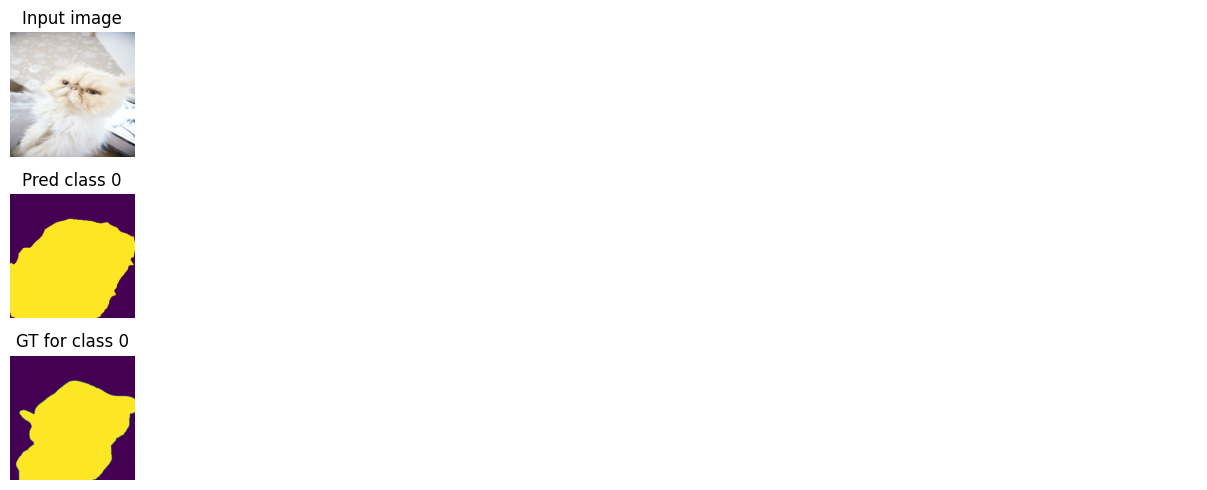

Train loss: 0.15773 | Time: 2m 17s | Val loss: 0.14987
Train_DICE_avg: 0.86585 | Train_Jaccard_avg: 0.77077 | Train_Sensitivity_avg: 0.84107 | Train_Specificity_avg: 0.92401 
Class 0 - Train_DICE: 0.86585 | Train_Jaccard: 0.77077 | Train_Sensitivity: 0.84107 | Train_Specificity: 0.92401 
Val_DICE_avg: 0.87266 | Val_Jaccard_avg: 0.78245 | Val_Sensitivity_avg: 0.84722 | Val_Specificity_avg: 0.93210 
Class 0 - Val_DICE: 0.87266 | Val_Jaccard: 0.78245 | Val_Sensitivity: 0.84722 | Val_Specificity: 0.93210 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15071 | Time: 2m 40s | Val loss: 0.14491
Train_DICE_avg: 0.86974 | Train_Jaccard_avg: 0.77691 | Train_Sensitivity_avg: 0.84709 | Train_Specificity_avg: 0.92537 
Class 0 - Train_DICE: 0.86974 | Train_Jaccard: 0.77691 | Train_Sensitivity: 0.84709 | Train_Specificity: 0.92537 
Val_DICE_avg: 0.87393 | Val_Jaccard_avg: 0.78463 | Val_Sensitivity_avg: 0.84713 | Val_Specificity_avg: 0.93395 
Class 0 - Val_DICE: 0.87393 | Val_Jaccard: 0.78463 | Val_Sensitivity: 0.84713 | Val_Specificity: 0.93395 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14328 | Time: 3m 2s | Val loss: 0.14229
Train_DICE_avg: 0.87478 | Train_Jaccard_avg: 0.78463 | Train_Sensitivity_avg: 0.85326 | Train_Specificity_avg: 0.92807 
Class 0 - Train_DICE: 0.87478 | Train_Jaccard: 0.78463 | Train_Sensitivity: 0.85326 | Train_Specificity: 0.92807 
Val_DICE_avg: 0.87293 | Val_Jaccard_avg: 0.78319 | Val_Sensitivity_avg: 0.83076 | Val_Specificity_avg: 0.94553 
Class 0 - Val_DICE: 0.87293 | Val_Jaccard: 0.78319 | Val_Sensitivity: 0.83076 | Val_Specificity: 0.94553 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13550 | Time: 3m 25s | Val loss: 0.13019
Train_DICE_avg: 0.88118 | Train_Jaccard_avg: 0.79411 | Train_Sensitivity_avg: 0.86143 | Train_Specificity_avg: 0.93002 
Class 0 - Train_DICE: 0.88118 | Train_Jaccard: 0.79411 | Train_Sensitivity: 0.86143 | Train_Specificity: 0.93002 
Val_DICE_avg: 0.88502 | Val_Jaccard_avg: 0.80176 | Val_Sensitivity_avg: 0.87089 | Val_Specificity_avg: 0.93244 
Class 0 - Val_DICE: 0.88502 | Val_Jaccard: 0.80176 | Val_Sensitivity: 0.87089 | Val_Specificity: 0.93244 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12981 | Time: 3m 47s | Val loss: 0.12613
Train_DICE_avg: 0.88562 | Train_Jaccard_avg: 0.80107 | Train_Sensitivity_avg: 0.86911 | Train_Specificity_avg: 0.92936 
Class 0 - Train_DICE: 0.88562 | Train_Jaccard: 0.80107 | Train_Sensitivity: 0.86911 | Train_Specificity: 0.92936 
Val_DICE_avg: 0.88852 | Val_Jaccard_avg: 0.80759 | Val_Sensitivity_avg: 0.89226 | Val_Specificity_avg: 0.92448 
Class 0 - Val_DICE: 0.88852 | Val_Jaccard: 0.80759 | Val_Sensitivity: 0.89226 | Val_Specificity: 0.92448 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

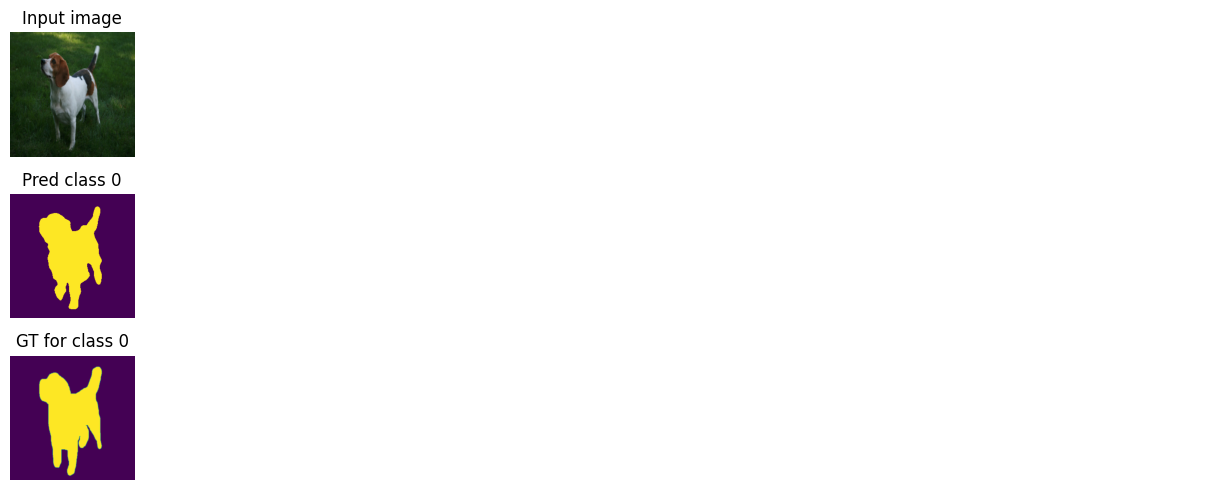

Train loss: 0.12508 | Time: 4m 11s | Val loss: 0.12165
Train_DICE_avg: 0.88776 | Train_Jaccard_avg: 0.80441 | Train_Sensitivity_avg: 0.87078 | Train_Specificity_avg: 0.93209 
Class 0 - Train_DICE: 0.88776 | Train_Jaccard: 0.80441 | Train_Sensitivity: 0.87078 | Train_Specificity: 0.93209 
Val_DICE_avg: 0.88975 | Val_Jaccard_avg: 0.80940 | Val_Sensitivity_avg: 0.88906 | Val_Specificity_avg: 0.92639 
Class 0 - Val_DICE: 0.88975 | Val_Jaccard: 0.80940 | Val_Sensitivity: 0.88906 | Val_Specificity: 0.92639 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11886 | Time: 4m 33s | Val loss: 0.11986
Train_DICE_avg: 0.89198 | Train_Jaccard_avg: 0.81111 | Train_Sensitivity_avg: 0.88014 | Train_Specificity_avg: 0.93214 
Class 0 - Train_DICE: 0.89198 | Train_Jaccard: 0.81111 | Train_Sensitivity: 0.88014 | Train_Specificity: 0.93214 
Val_DICE_avg: 0.88925 | Val_Jaccard_avg: 0.80888 | Val_Sensitivity_avg: 0.86421 | Val_Specificity_avg: 0.94374 
Class 0 - Val_DICE: 0.88925 | Val_Jaccard: 0.80888 | Val_Sensitivity: 0.86421 | Val_Specificity: 0.94374 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11264 | Time: 4m 56s | Val loss: 0.11539
Train_DICE_avg: 0.89680 | Train_Jaccard_avg: 0.81869 | Train_Sensitivity_avg: 0.88724 | Train_Specificity_avg: 0.93154 
Class 0 - Train_DICE: 0.89680 | Train_Jaccard: 0.81869 | Train_Sensitivity: 0.88724 | Train_Specificity: 0.93154 
Val_DICE_avg: 0.89272 | Val_Jaccard_avg: 0.81435 | Val_Sensitivity_avg: 0.87037 | Val_Specificity_avg: 0.94401 
Class 0 - Val_DICE: 0.89272 | Val_Jaccard: 0.81435 | Val_Sensitivity: 0.87037 | Val_Specificity: 0.94401 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10864 | Time: 5m 19s | Val loss: 0.11281
Train_DICE_avg: 0.89942 | Train_Jaccard_avg: 0.82287 | Train_Sensitivity_avg: 0.88962 | Train_Specificity_avg: 0.93342 
Class 0 - Train_DICE: 0.89942 | Train_Jaccard: 0.82287 | Train_Sensitivity: 0.88962 | Train_Specificity: 0.93342 
Val_DICE_avg: 0.89423 | Val_Jaccard_avg: 0.81617 | Val_Sensitivity_avg: 0.89804 | Val_Specificity_avg: 0.92745 
Class 0 - Val_DICE: 0.89423 | Val_Jaccard: 0.81617 | Val_Sensitivity: 0.89804 | Val_Specificity: 0.92745 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10760 | Time: 5m 42s | Val loss: 0.11009
Train_DICE_avg: 0.89971 | Train_Jaccard_avg: 0.82357 | Train_Sensitivity_avg: 0.89198 | Train_Specificity_avg: 0.93301 
Class 0 - Train_DICE: 0.89971 | Train_Jaccard: 0.82357 | Train_Sensitivity: 0.89198 | Train_Specificity: 0.93301 
Val_DICE_avg: 0.89635 | Val_Jaccard_avg: 0.81966 | Val_Sensitivity_avg: 0.89825 | Val_Specificity_avg: 0.92952 
Class 0 - Val_DICE: 0.89635 | Val_Jaccard: 0.81966 | Val_Sensitivity: 0.89825 | Val_Specificity: 0.92952 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

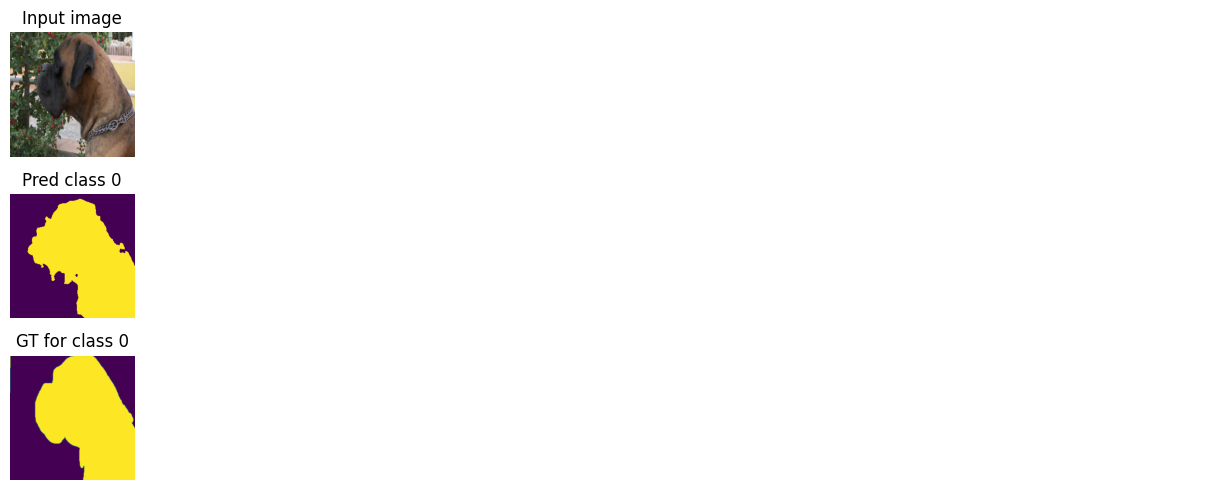

Train loss: 0.10349 | Time: 6m 6s | Val loss: 0.10916
Train_DICE_avg: 0.90327 | Train_Jaccard_avg: 0.82888 | Train_Sensitivity_avg: 0.89634 | Train_Specificity_avg: 0.93447 
Class 0 - Train_DICE: 0.90327 | Train_Jaccard: 0.82888 | Train_Sensitivity: 0.89634 | Train_Specificity: 0.93447 
Val_DICE_avg: 0.89647 | Val_Jaccard_avg: 0.82001 | Val_Sensitivity_avg: 0.90781 | Val_Specificity_avg: 0.92401 
Class 0 - Val_DICE: 0.89647 | Val_Jaccard: 0.82001 | Val_Sensitivity: 0.90781 | Val_Specificity: 0.92401 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09967 | Time: 6m 29s | Val loss: 0.11146
Train_DICE_avg: 0.90656 | Train_Jaccard_avg: 0.83442 | Train_Sensitivity_avg: 0.90104 | Train_Specificity_avg: 0.93610 
Class 0 - Train_DICE: 0.90656 | Train_Jaccard: 0.83442 | Train_Sensitivity: 0.90104 | Train_Specificity: 0.93610 
Val_DICE_avg: 0.89377 | Val_Jaccard_avg: 0.81614 | Val_Sensitivity_avg: 0.90344 | Val_Specificity_avg: 0.92831 
Class 0 - Val_DICE: 0.89377 | Val_Jaccard: 0.81614 | Val_Sensitivity: 0.90344 | Val_Specificity: 0.92831 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09805 | Time: 6m 52s | Val loss: 0.10584
Train_DICE_avg: 0.90788 | Train_Jaccard_avg: 0.83630 | Train_Sensitivity_avg: 0.90199 | Train_Specificity_avg: 0.93528 
Class 0 - Train_DICE: 0.90788 | Train_Jaccard: 0.83630 | Train_Sensitivity: 0.90199 | Train_Specificity: 0.93528 
Val_DICE_avg: 0.89883 | Val_Jaccard_avg: 0.82358 | Val_Sensitivity_avg: 0.90191 | Val_Specificity_avg: 0.93401 
Class 0 - Val_DICE: 0.89883 | Val_Jaccard: 0.82358 | Val_Sensitivity: 0.90191 | Val_Specificity: 0.93401 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09644 | Time: 7m 15s | Val loss: 0.10526
Train_DICE_avg: 0.90893 | Train_Jaccard_avg: 0.83844 | Train_Sensitivity_avg: 0.90452 | Train_Specificity_avg: 0.93655 
Class 0 - Train_DICE: 0.90893 | Train_Jaccard: 0.83844 | Train_Sensitivity: 0.90452 | Train_Specificity: 0.93655 
Val_DICE_avg: 0.89947 | Val_Jaccard_avg: 0.82464 | Val_Sensitivity_avg: 0.89131 | Val_Specificity_avg: 0.93956 
Class 0 - Val_DICE: 0.89947 | Val_Jaccard: 0.82464 | Val_Sensitivity: 0.89131 | Val_Specificity: 0.93956 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09236 | Time: 7m 38s | Val loss: 0.10301
Train_DICE_avg: 0.91274 | Train_Jaccard_avg: 0.84431 | Train_Sensitivity_avg: 0.90863 | Train_Specificity_avg: 0.93942 
Class 0 - Train_DICE: 0.91274 | Train_Jaccard: 0.84431 | Train_Sensitivity: 0.90863 | Train_Specificity: 0.93942 
Val_DICE_avg: 0.90138 | Val_Jaccard_avg: 0.82802 | Val_Sensitivity_avg: 0.90600 | Val_Specificity_avg: 0.93191 
Class 0 - Val_DICE: 0.90138 | Val_Jaccard: 0.82802 | Val_Sensitivity: 0.90600 | Val_Specificity: 0.93191 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

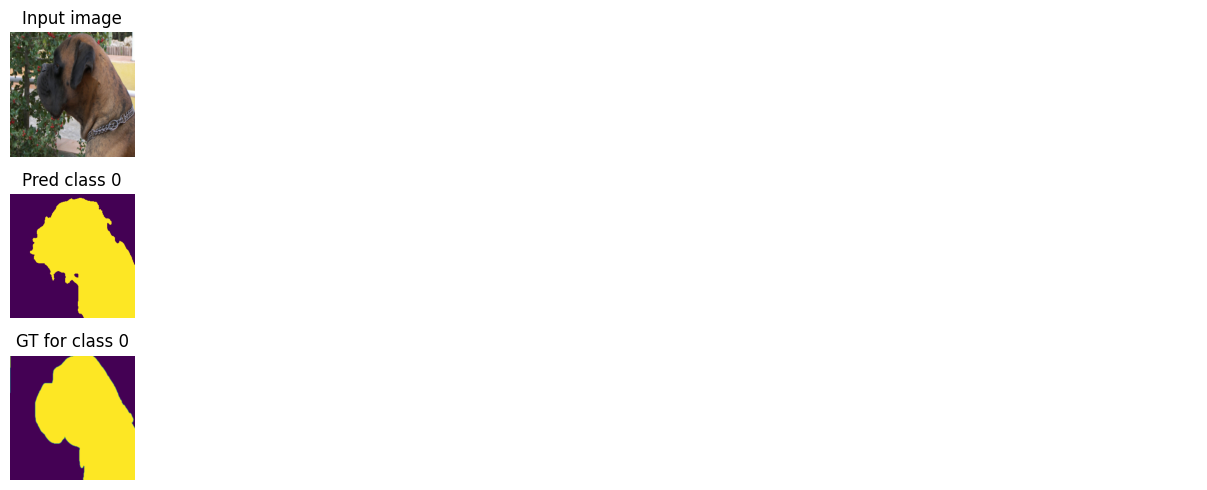

Train loss: 0.09298 | Time: 8m 1s | Val loss: 0.09972
Train_DICE_avg: 0.91173 | Train_Jaccard_avg: 0.84276 | Train_Sensitivity_avg: 0.90730 | Train_Specificity_avg: 0.93843 
Class 0 - Train_DICE: 0.91173 | Train_Jaccard: 0.84276 | Train_Sensitivity: 0.90730 | Train_Specificity: 0.93843 
Val_DICE_avg: 0.90436 | Val_Jaccard_avg: 0.83290 | Val_Sensitivity_avg: 0.89738 | Val_Specificity_avg: 0.94038 
Class 0 - Val_DICE: 0.90436 | Val_Jaccard: 0.83290 | Val_Sensitivity: 0.89738 | Val_Specificity: 0.94038 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08721 | Time: 8m 24s | Val loss: 0.09543
Train_DICE_avg: 0.91691 | Train_Jaccard_avg: 0.85127 | Train_Sensitivity_avg: 0.91383 | Train_Specificity_avg: 0.94060 
Class 0 - Train_DICE: 0.91691 | Train_Jaccard: 0.85127 | Train_Sensitivity: 0.91383 | Train_Specificity: 0.94060 
Val_DICE_avg: 0.90809 | Val_Jaccard_avg: 0.83836 | Val_Sensitivity_avg: 0.90905 | Val_Specificity_avg: 0.93727 
Class 0 - Val_DICE: 0.90809 | Val_Jaccard: 0.83836 | Val_Sensitivity: 0.90905 | Val_Specificity: 0.93727 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08496 | Time: 8m 47s | Val loss: 0.09561
Train_DICE_avg: 0.91902 | Train_Jaccard_avg: 0.85476 | Train_Sensitivity_avg: 0.91689 | Train_Specificity_avg: 0.94197 
Class 0 - Train_DICE: 0.91902 | Train_Jaccard: 0.85476 | Train_Sensitivity: 0.91689 | Train_Specificity: 0.94197 
Val_DICE_avg: 0.90747 | Val_Jaccard_avg: 0.83744 | Val_Sensitivity_avg: 0.91061 | Val_Specificity_avg: 0.93851 
Class 0 - Val_DICE: 0.90747 | Val_Jaccard: 0.83744 | Val_Sensitivity: 0.91061 | Val_Specificity: 0.93851 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08204 | Time: 9m 10s | Val loss: 0.09480
Train_DICE_avg: 0.92161 | Train_Jaccard_avg: 0.85919 | Train_Sensitivity_avg: 0.92108 | Train_Specificity_avg: 0.94160 
Class 0 - Train_DICE: 0.92161 | Train_Jaccard: 0.85919 | Train_Sensitivity: 0.92108 | Train_Specificity: 0.94160 
Val_DICE_avg: 0.90826 | Val_Jaccard_avg: 0.83908 | Val_Sensitivity_avg: 0.91895 | Val_Specificity_avg: 0.93505 
Class 0 - Val_DICE: 0.90826 | Val_Jaccard: 0.83908 | Val_Sensitivity: 0.91895 | Val_Specificity: 0.93505 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07982 | Time: 9m 33s | Val loss: 0.09299
Train_DICE_avg: 0.92348 | Train_Jaccard_avg: 0.86234 | Train_Sensitivity_avg: 0.92257 | Train_Specificity_avg: 0.94438 
Class 0 - Train_DICE: 0.92348 | Train_Jaccard: 0.86234 | Train_Sensitivity: 0.92257 | Train_Specificity: 0.94438 
Val_DICE_avg: 0.90985 | Val_Jaccard_avg: 0.84162 | Val_Sensitivity_avg: 0.90422 | Val_Specificity_avg: 0.94638 
Class 0 - Val_DICE: 0.90985 | Val_Jaccard: 0.84162 | Val_Sensitivity: 0.90422 | Val_Specificity: 0.94638 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

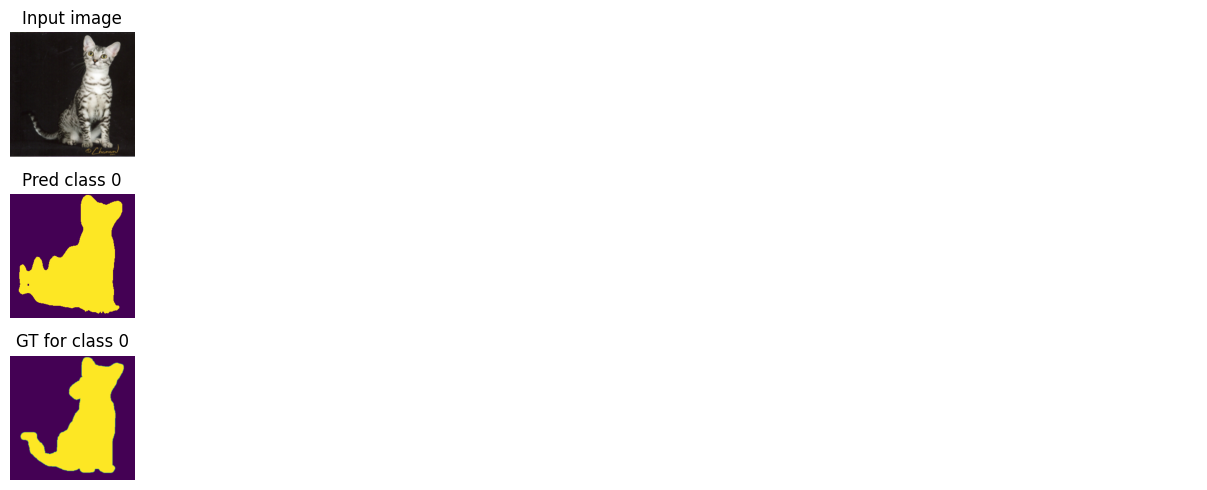

Train loss: 0.07849 | Time: 9m 57s | Val loss: 0.09015
Train_DICE_avg: 0.92459 | Train_Jaccard_avg: 0.86425 | Train_Sensitivity_avg: 0.92375 | Train_Specificity_avg: 0.94438 
Class 0 - Train_DICE: 0.92459 | Train_Jaccard: 0.86425 | Train_Sensitivity: 0.92375 | Train_Specificity: 0.94438 
Val_DICE_avg: 0.91260 | Val_Jaccard_avg: 0.84602 | Val_Sensitivity_avg: 0.90945 | Val_Specificity_avg: 0.94375 
Class 0 - Val_DICE: 0.91260 | Val_Jaccard: 0.84602 | Val_Sensitivity: 0.90945 | Val_Specificity: 0.94375 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07541 | Time: 10m 20s | Val loss: 0.08950
Train_DICE_avg: 0.92758 | Train_Jaccard_avg: 0.86908 | Train_Sensitivity_avg: 0.92596 | Train_Specificity_avg: 0.94707 
Class 0 - Train_DICE: 0.92758 | Train_Jaccard: 0.86908 | Train_Sensitivity: 0.92596 | Train_Specificity: 0.94707 
Val_DICE_avg: 0.91285 | Val_Jaccard_avg: 0.84620 | Val_Sensitivity_avg: 0.92639 | Val_Specificity_avg: 0.93387 
Class 0 - Val_DICE: 0.91285 | Val_Jaccard: 0.84620 | Val_Sensitivity: 0.92639 | Val_Specificity: 0.93387 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07572 | Time: 10m 43s | Val loss: 0.08815
Train_DICE_avg: 0.92707 | Train_Jaccard_avg: 0.86862 | Train_Sensitivity_avg: 0.92654 | Train_Specificity_avg: 0.94597 
Class 0 - Train_DICE: 0.92707 | Train_Jaccard: 0.86862 | Train_Sensitivity: 0.92654 | Train_Specificity: 0.94597 
Val_DICE_avg: 0.91418 | Val_Jaccard_avg: 0.84828 | Val_Sensitivity_avg: 0.91584 | Val_Specificity_avg: 0.94340 
Class 0 - Val_DICE: 0.91418 | Val_Jaccard: 0.84828 | Val_Sensitivity: 0.91584 | Val_Specificity: 0.94340 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07302 | Time: 11m 6s | Val loss: 0.08617
Train_DICE_avg: 0.92964 | Train_Jaccard_avg: 0.87265 | Train_Sensitivity_avg: 0.92903 | Train_Specificity_avg: 0.94740 
Class 0 - Train_DICE: 0.92964 | Train_Jaccard: 0.87265 | Train_Sensitivity: 0.92903 | Train_Specificity: 0.94740 
Val_DICE_avg: 0.91599 | Val_Jaccard_avg: 0.85110 | Val_Sensitivity_avg: 0.92725 | Val_Specificity_avg: 0.93767 
Class 0 - Val_DICE: 0.91599 | Val_Jaccard: 0.85110 | Val_Sensitivity: 0.92725 | Val_Specificity: 0.93767 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07055 | Time: 11m 29s | Val loss: 0.08708
Train_DICE_avg: 0.93210 | Train_Jaccard_avg: 0.87671 | Train_Sensitivity_avg: 0.93135 | Train_Specificity_avg: 0.94976 
Class 0 - Train_DICE: 0.93210 | Train_Jaccard: 0.87671 | Train_Sensitivity: 0.93135 | Train_Specificity: 0.94976 
Val_DICE_avg: 0.91497 | Val_Jaccard_avg: 0.85006 | Val_Sensitivity_avg: 0.92115 | Val_Specificity_avg: 0.94026 
Class 0 - Val_DICE: 0.91497 | Val_Jaccard: 0.85006 | Val_Sensitivity: 0.92115 | Val_Specificity: 0.94026 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

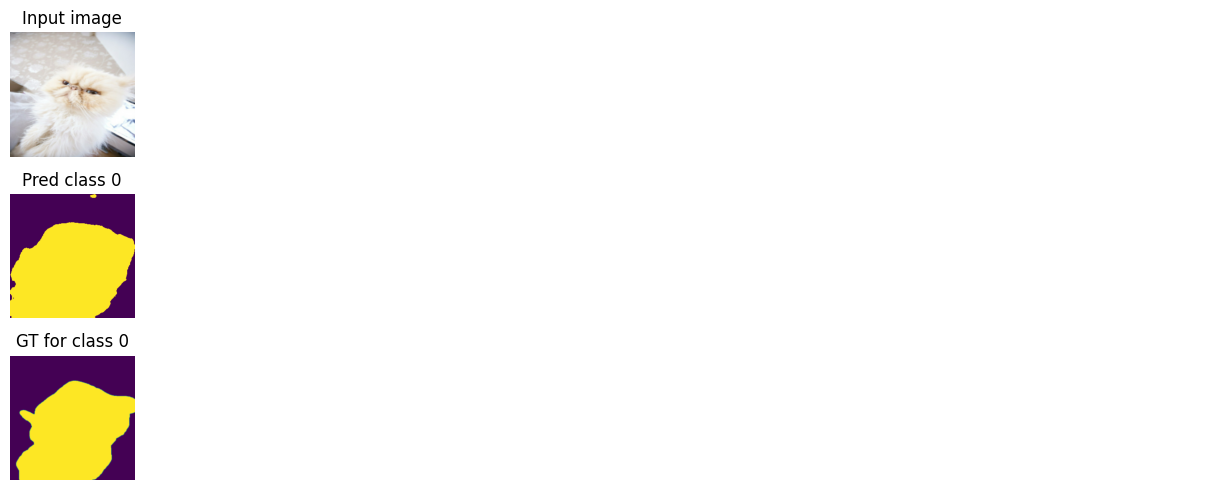

Train loss: 0.07128 | Time: 11m 52s | Val loss: 0.08366
Train_DICE_avg: 0.93118 | Train_Jaccard_avg: 0.87520 | Train_Sensitivity_avg: 0.93001 | Train_Specificity_avg: 0.94984 
Class 0 - Train_DICE: 0.93118 | Train_Jaccard: 0.87520 | Train_Sensitivity: 0.93001 | Train_Specificity: 0.94984 
Val_DICE_avg: 0.91838 | Val_Jaccard_avg: 0.85532 | Val_Sensitivity_avg: 0.92412 | Val_Specificity_avg: 0.94362 
Class 0 - Val_DICE: 0.91838 | Val_Jaccard: 0.85532 | Val_Sensitivity: 0.92412 | Val_Specificity: 0.94362 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06774 | Time: 12m 15s | Val loss: 0.08308
Train_DICE_avg: 0.93452 | Train_Jaccard_avg: 0.88095 | Train_Sensitivity_avg: 0.93405 | Train_Specificity_avg: 0.95186 
Class 0 - Train_DICE: 0.93452 | Train_Jaccard: 0.88095 | Train_Sensitivity: 0.93405 | Train_Specificity: 0.95186 
Val_DICE_avg: 0.91875 | Val_Jaccard_avg: 0.85585 | Val_Sensitivity_avg: 0.93024 | Val_Specificity_avg: 0.93841 
Class 0 - Val_DICE: 0.91875 | Val_Jaccard: 0.85585 | Val_Sensitivity: 0.93024 | Val_Specificity: 0.93841 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06658 | Time: 12m 38s | Val loss: 0.08290
Train_DICE_avg: 0.93559 | Train_Jaccard_avg: 0.88287 | Train_Sensitivity_avg: 0.93629 | Train_Specificity_avg: 0.95092 
Class 0 - Train_DICE: 0.93559 | Train_Jaccard: 0.88287 | Train_Sensitivity: 0.93629 | Train_Specificity: 0.95092 
Val_DICE_avg: 0.91866 | Val_Jaccard_avg: 0.85577 | Val_Sensitivity_avg: 0.93533 | Val_Specificity_avg: 0.93684 
Class 0 - Val_DICE: 0.91866 | Val_Jaccard: 0.85577 | Val_Sensitivity: 0.93533 | Val_Specificity: 0.93684 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06472 | Time: 13m 2s | Val loss: 0.08069
Train_DICE_avg: 0.93737 | Train_Jaccard_avg: 0.88595 | Train_Sensitivity_avg: 0.93605 | Train_Specificity_avg: 0.95520 
Class 0 - Train_DICE: 0.93737 | Train_Jaccard: 0.88595 | Train_Sensitivity: 0.93605 | Train_Specificity: 0.95520 
Val_DICE_avg: 0.92115 | Val_Jaccard_avg: 0.86028 | Val_Sensitivity_avg: 0.92381 | Val_Specificity_avg: 0.94701 
Class 0 - Val_DICE: 0.92115 | Val_Jaccard: 0.86028 | Val_Sensitivity: 0.92381 | Val_Specificity: 0.94701 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06236 | Time: 13m 25s | Val loss: 0.07857
Train_DICE_avg: 0.93960 | Train_Jaccard_avg: 0.88971 | Train_Sensitivity_avg: 0.93952 | Train_Specificity_avg: 0.95432 
Class 0 - Train_DICE: 0.93960 | Train_Jaccard: 0.88971 | Train_Sensitivity: 0.93952 | Train_Specificity: 0.95432 
Val_DICE_avg: 0.92310 | Val_Jaccard_avg: 0.86326 | Val_Sensitivity_avg: 0.92758 | Val_Specificity_avg: 0.94681 
Class 0 - Val_DICE: 0.92310 | Val_Jaccard: 0.86326 | Val_Sensitivity: 0.92758 | Val_Specificity: 0.94681 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

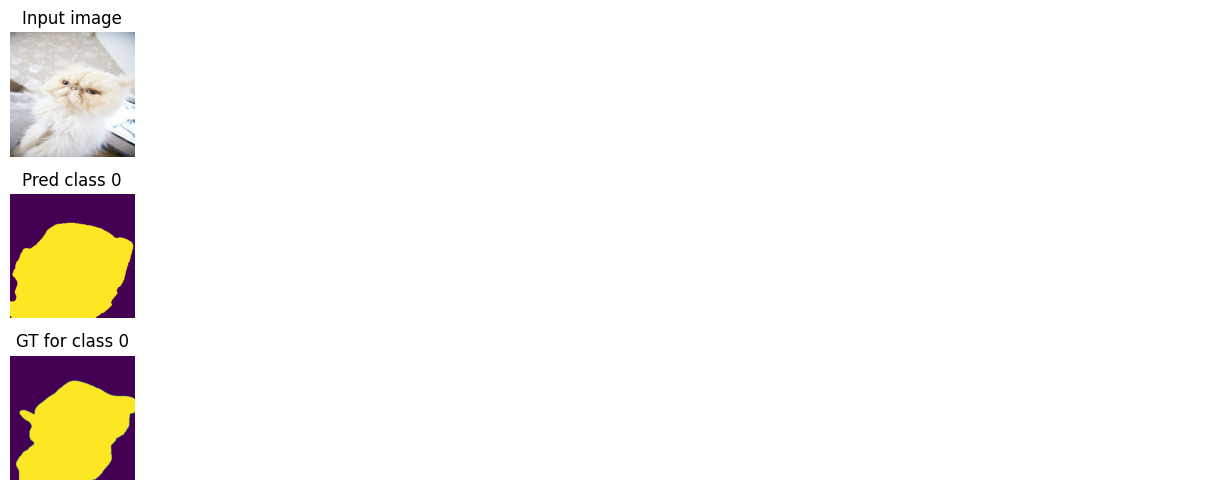

Train loss: 0.06128 | Time: 13m 48s | Val loss: 0.07913
Train_DICE_avg: 0.94064 | Train_Jaccard_avg: 0.89166 | Train_Sensitivity_avg: 0.94085 | Train_Specificity_avg: 0.95663 
Class 0 - Train_DICE: 0.94064 | Train_Jaccard: 0.89166 | Train_Sensitivity: 0.94085 | Train_Specificity: 0.95663 
Val_DICE_avg: 0.92264 | Val_Jaccard_avg: 0.86283 | Val_Sensitivity_avg: 0.91698 | Val_Specificity_avg: 0.95258 
Class 0 - Val_DICE: 0.92264 | Val_Jaccard: 0.86283 | Val_Sensitivity: 0.91698 | Val_Specificity: 0.95258 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05981 | Time: 14m 11s | Val loss: 0.07814
Train_DICE_avg: 0.94200 | Train_Jaccard_avg: 0.89393 | Train_Sensitivity_avg: 0.94229 | Train_Specificity_avg: 0.95597 
Class 0 - Train_DICE: 0.94200 | Train_Jaccard: 0.89393 | Train_Sensitivity: 0.94229 | Train_Specificity: 0.95597 
Val_DICE_avg: 0.92333 | Val_Jaccard_avg: 0.86366 | Val_Sensitivity_avg: 0.93798 | Val_Specificity_avg: 0.94066 
Class 0 - Val_DICE: 0.92333 | Val_Jaccard: 0.86366 | Val_Sensitivity: 0.93798 | Val_Specificity: 0.94066 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05873 | Time: 14m 34s | Val loss: 0.07688
Train_DICE_avg: 0.94308 | Train_Jaccard_avg: 0.89579 | Train_Sensitivity_avg: 0.94305 | Train_Specificity_avg: 0.95843 
Class 0 - Train_DICE: 0.94308 | Train_Jaccard: 0.89579 | Train_Sensitivity: 0.94305 | Train_Specificity: 0.95843 
Val_DICE_avg: 0.92469 | Val_Jaccard_avg: 0.86592 | Val_Sensitivity_avg: 0.92412 | Val_Specificity_avg: 0.95027 
Class 0 - Val_DICE: 0.92469 | Val_Jaccard: 0.86592 | Val_Sensitivity: 0.92412 | Val_Specificity: 0.95027 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05793 | Time: 14m 58s | Val loss: 0.07417
Train_DICE_avg: 0.94379 | Train_Jaccard_avg: 0.89702 | Train_Sensitivity_avg: 0.94426 | Train_Specificity_avg: 0.95835 
Class 0 - Train_DICE: 0.94379 | Train_Jaccard: 0.89702 | Train_Sensitivity: 0.94426 | Train_Specificity: 0.95835 
Val_DICE_avg: 0.92742 | Val_Jaccard_avg: 0.87048 | Val_Sensitivity_avg: 0.92680 | Val_Specificity_avg: 0.95145 
Class 0 - Val_DICE: 0.92742 | Val_Jaccard: 0.87048 | Val_Sensitivity: 0.92680 | Val_Specificity: 0.95145 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05781 | Time: 15m 20s | Val loss: 0.07517
Train_DICE_avg: 0.94390 | Train_Jaccard_avg: 0.89720 | Train_Sensitivity_avg: 0.94381 | Train_Specificity_avg: 0.95744 
Class 0 - Train_DICE: 0.94390 | Train_Jaccard: 0.89720 | Train_Sensitivity: 0.94381 | Train_Specificity: 0.95744 
Val_DICE_avg: 0.92627 | Val_Jaccard_avg: 0.86850 | Val_Sensitivity_avg: 0.93250 | Val_Specificity_avg: 0.94510 
Class 0 - Val_DICE: 0.92627 | Val_Jaccard: 0.86850 | Val_Sensitivity: 0.93250 | Val_Specificity: 0.94510 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

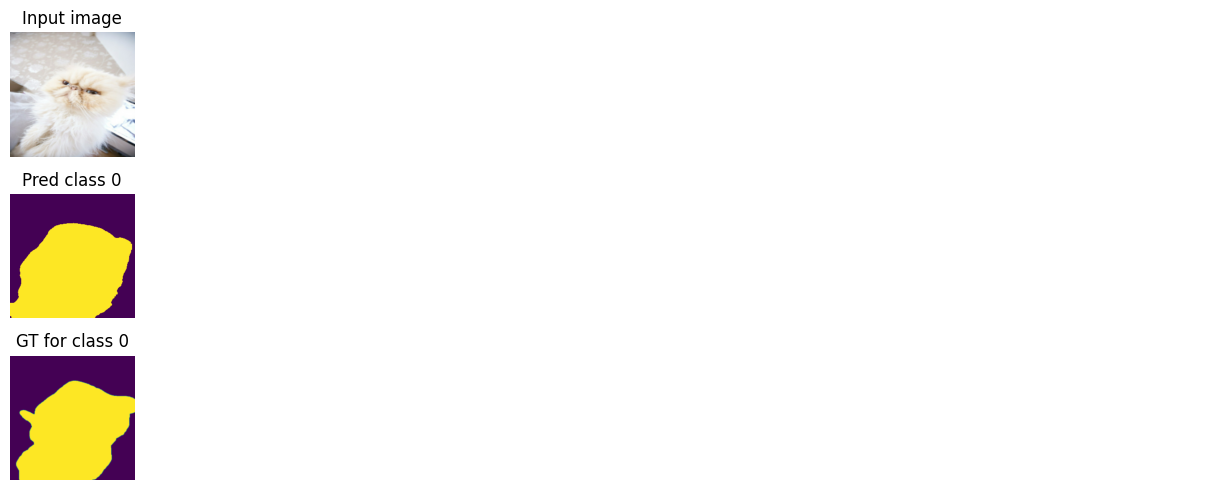

Train loss: 0.05567 | Time: 15m 44s | Val loss: 0.07582
Train_DICE_avg: 0.94603 | Train_Jaccard_avg: 0.90100 | Train_Sensitivity_avg: 0.94611 | Train_Specificity_avg: 0.96078 
Class 0 - Train_DICE: 0.94603 | Train_Jaccard: 0.90100 | Train_Sensitivity: 0.94611 | Train_Specificity: 0.96078 
Val_DICE_avg: 0.92561 | Val_Jaccard_avg: 0.86752 | Val_Sensitivity_avg: 0.93574 | Val_Specificity_avg: 0.94464 
Class 0 - Val_DICE: 0.92561 | Val_Jaccard: 0.86752 | Val_Sensitivity: 0.93574 | Val_Specificity: 0.94464 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05520 | Time: 16m 7s | Val loss: 0.07512
Train_DICE_avg: 0.94652 | Train_Jaccard_avg: 0.90179 | Train_Sensitivity_avg: 0.94672 | Train_Specificity_avg: 0.95942 
Class 0 - Train_DICE: 0.94652 | Train_Jaccard: 0.90179 | Train_Sensitivity: 0.94672 | Train_Specificity: 0.95942 
Val_DICE_avg: 0.92647 | Val_Jaccard_avg: 0.86904 | Val_Sensitivity_avg: 0.92421 | Val_Specificity_avg: 0.95229 
Class 0 - Val_DICE: 0.92647 | Val_Jaccard: 0.86904 | Val_Sensitivity: 0.92421 | Val_Specificity: 0.95229 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05516 | Time: 16m 30s | Val loss: 0.07420
Train_DICE_avg: 0.94648 | Train_Jaccard_avg: 0.90179 | Train_Sensitivity_avg: 0.94726 | Train_Specificity_avg: 0.95971 
Class 0 - Train_DICE: 0.94648 | Train_Jaccard: 0.90179 | Train_Sensitivity: 0.94726 | Train_Specificity: 0.95971 
Val_DICE_avg: 0.92738 | Val_Jaccard_avg: 0.87043 | Val_Sensitivity_avg: 0.92581 | Val_Specificity_avg: 0.95262 
Class 0 - Val_DICE: 0.92738 | Val_Jaccard: 0.87043 | Val_Sensitivity: 0.92581 | Val_Specificity: 0.95262 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05372 | Time: 16m 53s | Val loss: 0.07374
Train_DICE_avg: 0.94790 | Train_Jaccard_avg: 0.90421 | Train_Sensitivity_avg: 0.94779 | Train_Specificity_avg: 0.96169 
Class 0 - Train_DICE: 0.94790 | Train_Jaccard: 0.90421 | Train_Sensitivity: 0.94779 | Train_Specificity: 0.96169 
Val_DICE_avg: 0.92768 | Val_Jaccard_avg: 0.87103 | Val_Sensitivity_avg: 0.93380 | Val_Specificity_avg: 0.94697 
Class 0 - Val_DICE: 0.92768 | Val_Jaccard: 0.87103 | Val_Sensitivity: 0.93380 | Val_Specificity: 0.94697 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05394 | Time: 17m 16s | Val loss: 0.07294
Train_DICE_avg: 0.94765 | Train_Jaccard_avg: 0.90383 | Train_Sensitivity_avg: 0.94812 | Train_Specificity_avg: 0.96157 
Class 0 - Train_DICE: 0.94765 | Train_Jaccard: 0.90383 | Train_Sensitivity: 0.94812 | Train_Specificity: 0.96157 
Val_DICE_avg: 0.92850 | Val_Jaccard_avg: 0.87243 | Val_Sensitivity_avg: 0.93003 | Val_Specificity_avg: 0.95023 
Class 0 - Val_DICE: 0.92850 | Val_Jaccard: 0.87243 | Val_Sensitivity: 0.93003 | Val_Specificity: 0.95023 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

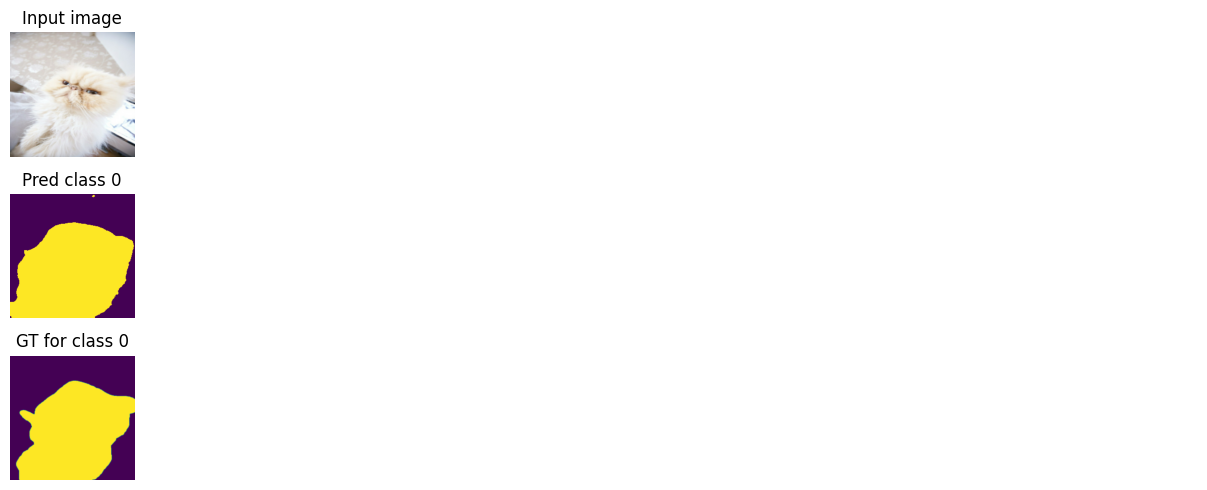

Train loss: 0.05322 | Time: 17m 39s | Val loss: 0.07418
Train_DICE_avg: 0.94843 | Train_Jaccard_avg: 0.90522 | Train_Sensitivity_avg: 0.94869 | Train_Specificity_avg: 0.96207 
Class 0 - Train_DICE: 0.94843 | Train_Jaccard: 0.90522 | Train_Sensitivity: 0.94869 | Train_Specificity: 0.96207 
Val_DICE_avg: 0.92727 | Val_Jaccard_avg: 0.87052 | Val_Sensitivity_avg: 0.92473 | Val_Specificity_avg: 0.95303 
Class 0 - Val_DICE: 0.92727 | Val_Jaccard: 0.87052 | Val_Sensitivity: 0.92473 | Val_Specificity: 0.95303 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05287 | Time: 18m 2s | Val loss: 0.07354
Train_DICE_avg: 0.94875 | Train_Jaccard_avg: 0.90579 | Train_Sensitivity_avg: 0.94862 | Train_Specificity_avg: 0.96115 
Class 0 - Train_DICE: 0.94875 | Train_Jaccard: 0.90579 | Train_Sensitivity: 0.94862 | Train_Specificity: 0.96115 
Val_DICE_avg: 0.92795 | Val_Jaccard_avg: 0.87175 | Val_Sensitivity_avg: 0.92477 | Val_Specificity_avg: 0.95426 
Class 0 - Val_DICE: 0.92795 | Val_Jaccard: 0.87175 | Val_Sensitivity: 0.92477 | Val_Specificity: 0.95426 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05241 | Time: 18m 25s | Val loss: 0.07290
Train_DICE_avg: 0.94918 | Train_Jaccard_avg: 0.90653 | Train_Sensitivity_avg: 0.94916 | Train_Specificity_avg: 0.96285 
Class 0 - Train_DICE: 0.94918 | Train_Jaccard: 0.90653 | Train_Sensitivity: 0.94916 | Train_Specificity: 0.96285 
Val_DICE_avg: 0.92851 | Val_Jaccard_avg: 0.87236 | Val_Sensitivity_avg: 0.93038 | Val_Specificity_avg: 0.95112 
Class 0 - Val_DICE: 0.92851 | Val_Jaccard: 0.87236 | Val_Sensitivity: 0.93038 | Val_Specificity: 0.95112 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05197 | Time: 18m 49s | Val loss: 0.07240
Train_DICE_avg: 0.94957 | Train_Jaccard_avg: 0.90718 | Train_Sensitivity_avg: 0.94973 | Train_Specificity_avg: 0.96271 
Class 0 - Train_DICE: 0.94957 | Train_Jaccard: 0.90718 | Train_Sensitivity: 0.94973 | Train_Specificity: 0.96271 
Val_DICE_avg: 0.92908 | Val_Jaccard_avg: 0.87347 | Val_Sensitivity_avg: 0.92437 | Val_Specificity_avg: 0.95583 
Class 0 - Val_DICE: 0.92908 | Val_Jaccard: 0.87347 | Val_Sensitivity: 0.92437 | Val_Specificity: 0.95583 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05150 | Time: 19m 11s | Val loss: 0.07301
Train_DICE_avg: 0.95007 | Train_Jaccard_avg: 0.90812 | Train_Sensitivity_avg: 0.95023 | Train_Specificity_avg: 0.96262 
Class 0 - Train_DICE: 0.95007 | Train_Jaccard: 0.90812 | Train_Sensitivity: 0.95023 | Train_Specificity: 0.96262 
Val_DICE_avg: 0.92850 | Val_Jaccard_avg: 0.87253 | Val_Sensitivity_avg: 0.92428 | Val_Specificity_avg: 0.95596 
Class 0 - Val_DICE: 0.92850 | Val_Jaccard: 0.87253 | Val_Sensitivity: 0.92428 | Val_Specificity: 0.95596 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

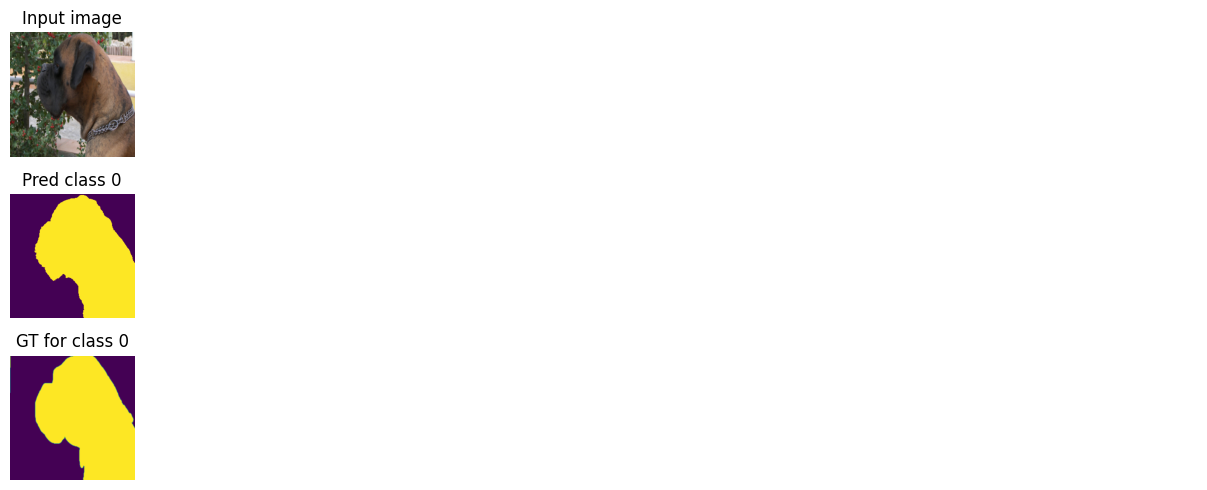

Train loss: 0.05148 | Time: 19m 35s | Val loss: 0.07234
Train_DICE_avg: 0.95008 | Train_Jaccard_avg: 0.90819 | Train_Sensitivity_avg: 0.94993 | Train_Specificity_avg: 0.96276 
Class 0 - Train_DICE: 0.95008 | Train_Jaccard: 0.90819 | Train_Sensitivity: 0.94993 | Train_Specificity: 0.96276 
Val_DICE_avg: 0.92906 | Val_Jaccard_avg: 0.87334 | Val_Sensitivity_avg: 0.92916 | Val_Specificity_avg: 0.95278 
Class 0 - Val_DICE: 0.92906 | Val_Jaccard: 0.87334 | Val_Sensitivity: 0.92916 | Val_Specificity: 0.95278 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05091 | Time: 19m 58s | Val loss: 0.07257
Train_DICE_avg: 0.95059 | Train_Jaccard_avg: 0.90904 | Train_Sensitivity_avg: 0.95086 | Train_Specificity_avg: 0.96316 
Class 0 - Train_DICE: 0.95059 | Train_Jaccard: 0.90904 | Train_Sensitivity: 0.95086 | Train_Specificity: 0.96316 
Val_DICE_avg: 0.92883 | Val_Jaccard_avg: 0.87305 | Val_Sensitivity_avg: 0.92872 | Val_Specificity_avg: 0.95304 
Class 0 - Val_DICE: 0.92883 | Val_Jaccard: 0.87305 | Val_Sensitivity: 0.92872 | Val_Specificity: 0.95304 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05127 | Time: 20m 21s | Val loss: 0.07275
Train_DICE_avg: 0.95023 | Train_Jaccard_avg: 0.90838 | Train_Sensitivity_avg: 0.95024 | Train_Specificity_avg: 0.96358 
Class 0 - Train_DICE: 0.95023 | Train_Jaccard: 0.90838 | Train_Sensitivity: 0.95024 | Train_Specificity: 0.96358 
Val_DICE_avg: 0.92871 | Val_Jaccard_avg: 0.87295 | Val_Sensitivity_avg: 0.92353 | Val_Specificity_avg: 0.95641 
Class 0 - Val_DICE: 0.92871 | Val_Jaccard: 0.87295 | Val_Sensitivity: 0.92353 | Val_Specificity: 0.95641 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05071 | Time: 20m 44s | Val loss: 0.07257
Train_DICE_avg: 0.95079 | Train_Jaccard_avg: 0.90941 | Train_Sensitivity_avg: 0.95094 | Train_Specificity_avg: 0.96375 
Class 0 - Train_DICE: 0.95079 | Train_Jaccard: 0.90941 | Train_Sensitivity: 0.95094 | Train_Specificity: 0.96375 
Val_DICE_avg: 0.92883 | Val_Jaccard_avg: 0.87315 | Val_Sensitivity_avg: 0.92617 | Val_Specificity_avg: 0.95548 
Class 0 - Val_DICE: 0.92883 | Val_Jaccard: 0.87315 | Val_Sensitivity: 0.92617 | Val_Specificity: 0.95548 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05079 | Time: 21m 7s | Val loss: 0.07249
Train_DICE_avg: 0.95071 | Train_Jaccard_avg: 0.90925 | Train_Sensitivity_avg: 0.95115 | Train_Specificity_avg: 0.96359 
Class 0 - Train_DICE: 0.95071 | Train_Jaccard: 0.90925 | Train_Sensitivity: 0.95115 | Train_Specificity: 0.96359 
Val_DICE_avg: 0.92898 | Val_Jaccard_avg: 0.87340 | Val_Sensitivity_avg: 0.92614 | Val_Specificity_avg: 0.95503 
Class 0 - Val_DICE: 0.92898 | Val_Jaccard: 0.87340 | Val_Sensitivity: 0.92614 | Val_Specificity: 0.95503 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

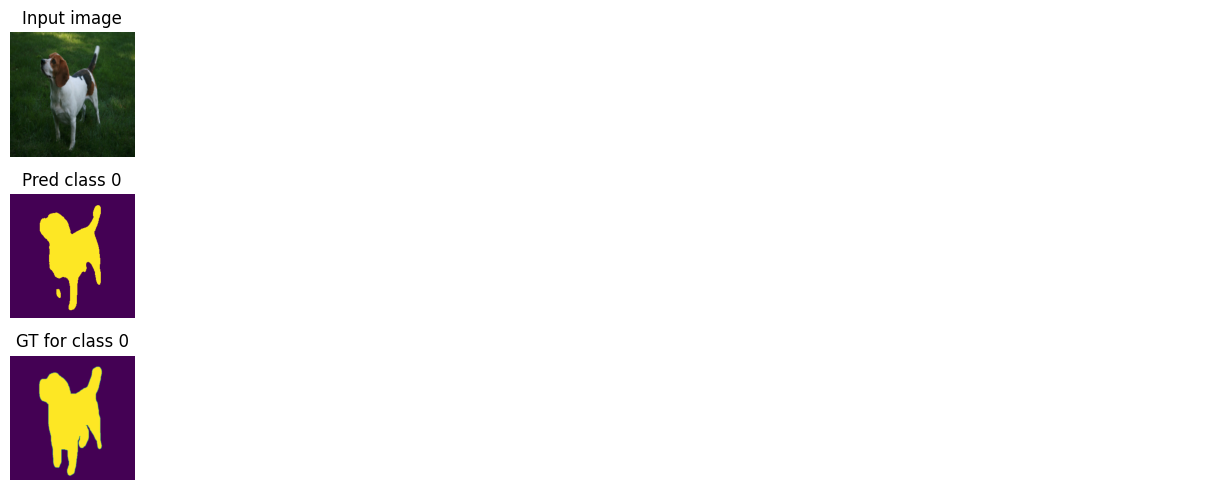

Train loss: 0.04953 | Time: 21m 30s | Val loss: 0.07213
Train_DICE_avg: 0.95199 | Train_Jaccard_avg: 0.91151 | Train_Sensitivity_avg: 0.95227 | Train_Specificity_avg: 0.96411 
Class 0 - Train_DICE: 0.95199 | Train_Jaccard: 0.91151 | Train_Sensitivity: 0.95227 | Train_Specificity: 0.96411 
Val_DICE_avg: 0.92927 | Val_Jaccard_avg: 0.87381 | Val_Sensitivity_avg: 0.92685 | Val_Specificity_avg: 0.95505 
Class 0 - Val_DICE: 0.92927 | Val_Jaccard: 0.87381 | Val_Sensitivity: 0.92685 | Val_Specificity: 0.95505 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04929 | Time: 21m 53s | Val loss: 0.07189
Train_DICE_avg: 0.95218 | Train_Jaccard_avg: 0.91182 | Train_Sensitivity_avg: 0.95250 | Train_Specificity_avg: 0.96413 
Class 0 - Train_DICE: 0.95218 | Train_Jaccard: 0.91182 | Train_Sensitivity: 0.95250 | Train_Specificity: 0.96413 
Val_DICE_avg: 0.92949 | Val_Jaccard_avg: 0.87417 | Val_Sensitivity_avg: 0.92998 | Val_Specificity_avg: 0.95425 
Class 0 - Val_DICE: 0.92949 | Val_Jaccard: 0.87417 | Val_Sensitivity: 0.92998 | Val_Specificity: 0.95425 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04993 | Time: 22m 17s | Val loss: 0.07175
Train_DICE_avg: 0.95155 | Train_Jaccard_avg: 0.91074 | Train_Sensitivity_avg: 0.95169 | Train_Specificity_avg: 0.96504 
Class 0 - Train_DICE: 0.95155 | Train_Jaccard: 0.91074 | Train_Sensitivity: 0.95169 | Train_Specificity: 0.96504 
Val_DICE_avg: 0.92968 | Val_Jaccard_avg: 0.87451 | Val_Sensitivity_avg: 0.92548 | Val_Specificity_avg: 0.95664 
Class 0 - Val_DICE: 0.92968 | Val_Jaccard: 0.87451 | Val_Sensitivity: 0.92548 | Val_Specificity: 0.95664 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04966 | Time: 22m 40s | Val loss: 0.07125
Train_DICE_avg: 0.95181 | Train_Jaccard_avg: 0.91124 | Train_Sensitivity_avg: 0.95165 | Train_Specificity_avg: 0.96427 
Class 0 - Train_DICE: 0.95181 | Train_Jaccard: 0.91124 | Train_Sensitivity: 0.95165 | Train_Specificity: 0.96427 
Val_DICE_avg: 0.93014 | Val_Jaccard_avg: 0.87526 | Val_Sensitivity_avg: 0.93007 | Val_Specificity_avg: 0.95420 
Class 0 - Val_DICE: 0.93014 | Val_Jaccard: 0.87526 | Val_Sensitivity: 0.93007 | Val_Specificity: 0.95420 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04946 | Time: 23m 3s | Val loss: 0.07128
Train_DICE_avg: 0.95196 | Train_Jaccard_avg: 0.91148 | Train_Sensitivity_avg: 0.95247 | Train_Specificity_avg: 0.96420 
Class 0 - Train_DICE: 0.95196 | Train_Jaccard: 0.91148 | Train_Sensitivity: 0.95247 | Train_Specificity: 0.96420 
Val_DICE_avg: 0.93013 | Val_Jaccard_avg: 0.87521 | Val_Sensitivity_avg: 0.92925 | Val_Specificity_avg: 0.95479 
Class 0 - Val_DICE: 0.93013 | Val_Jaccard: 0.87521 | Val_Sensitivity: 0.92925 | Val_Specificity: 0.95479 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

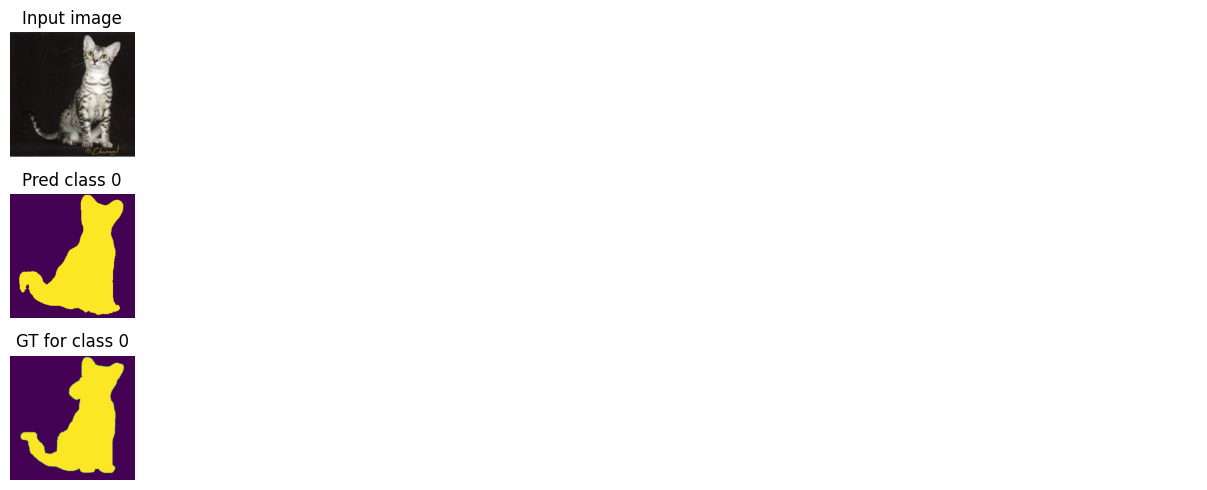

Train loss: 0.04868 | Time: 23m 26s | Val loss: 0.07155
Train_DICE_avg: 0.95277 | Train_Jaccard_avg: 0.91297 | Train_Sensitivity_avg: 0.95319 | Train_Specificity_avg: 0.96449 
Class 0 - Train_DICE: 0.95277 | Train_Jaccard: 0.91297 | Train_Sensitivity: 0.95319 | Train_Specificity: 0.96449 
Val_DICE_avg: 0.92987 | Val_Jaccard_avg: 0.87482 | Val_Sensitivity_avg: 0.92608 | Val_Specificity_avg: 0.95631 
Class 0 - Val_DICE: 0.92987 | Val_Jaccard: 0.87482 | Val_Sensitivity: 0.92608 | Val_Specificity: 0.95631 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 28.1MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]



Global Performance Metrics:
Loss mean: 0.06651, std: 0.00793
Dice Coefficient mean: 0.93513, std: 0.04245
Jaccard Index mean: 0.88092, std: 0.06938
Sensitivity mean: 0.94188, std: 0.05097
Specificity mean: 0.95549, std: 0.04691

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.93513, std: 0.04245
Jaccard mean: 0.88092, std: 0.06938
Sensitivity mean: 0.94188, std: 0.05097
Specificity mean: 0.95549, std: 0.04691


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-DeepLabV3+-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.56 GB
GPU Memory - Reserved: 0.75 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

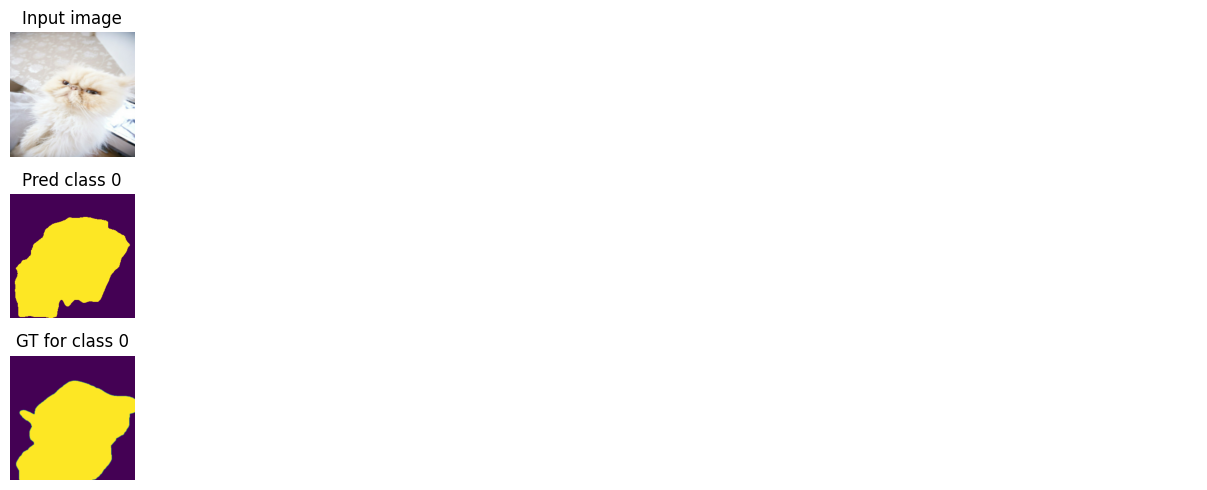

Train loss: 0.45713 | Time: 0m 22s | Val loss: 0.43488
Train_DICE_avg: 0.67348 | Train_Jaccard_avg: 0.53572 | Train_Sensitivity_avg: 0.81579 | Train_Specificity_avg: 0.76625 
Class 0 - Train_DICE: 0.67348 | Train_Jaccard: 0.53572 | Train_Sensitivity: 0.81579 | Train_Specificity: 0.76625 
Val_DICE_avg: 0.55379 | Val_Jaccard_avg: 0.40831 | Val_Sensitivity_avg: 0.96550 | Val_Specificity_avg: 0.69376 
Class 0 - Val_DICE: 0.55379 | Val_Jaccard: 0.40831 | Val_Sensitivity: 0.96550 | Val_Specificity: 0.69376 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.29653 | Time: 0m 45s | Val loss: 0.26805
Train_DICE_avg: 0.81153 | Train_Jaccard_avg: 0.69446 | Train_Sensitivity_avg: 0.88490 | Train_Specificity_avg: 0.84558 
Class 0 - Train_DICE: 0.81153 | Train_Jaccard: 0.69446 | Train_Sensitivity: 0.88490 | Train_Specificity: 0.84558 
Val_DICE_avg: 0.79734 | Val_Jaccard_avg: 0.68066 | Val_Sensitivity_avg: 0.93867 | Val_Specificity_avg: 0.82585 
Class 0 - Val_DICE: 0.79734 | Val_Jaccard: 0.68066 | Val_Sensitivity: 0.93867 | Val_Specificity: 0.82585 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.26036 | Time: 1m 7s | Val loss: 0.23930
Train_DICE_avg: 0.82983 | Train_Jaccard_avg: 0.72018 | Train_Sensitivity_avg: 0.90125 | Train_Specificity_avg: 0.85699 
Class 0 - Train_DICE: 0.82983 | Train_Jaccard: 0.72018 | Train_Sensitivity: 0.90125 | Train_Specificity: 0.85699 
Val_DICE_avg: 0.84015 | Val_Jaccard_avg: 0.73632 | Val_Sensitivity_avg: 0.92307 | Val_Specificity_avg: 0.85991 
Class 0 - Val_DICE: 0.84015 | Val_Jaccard: 0.73632 | Val_Sensitivity: 0.92307 | Val_Specificity: 0.85991 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.24058 | Time: 1m 30s | Val loss: 0.22521
Train_DICE_avg: 0.84505 | Train_Jaccard_avg: 0.74106 | Train_Sensitivity_avg: 0.91075 | Train_Specificity_avg: 0.86499 
Class 0 - Train_DICE: 0.84505 | Train_Jaccard: 0.74106 | Train_Sensitivity: 0.91075 | Train_Specificity: 0.86499 
Val_DICE_avg: 0.85915 | Val_Jaccard_avg: 0.76274 | Val_Sensitivity_avg: 0.91830 | Val_Specificity_avg: 0.87999 
Class 0 - Val_DICE: 0.85915 | Val_Jaccard: 0.76274 | Val_Sensitivity: 0.91830 | Val_Specificity: 0.87999 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.23071 | Time: 1m 52s | Val loss: 0.21573
Train_DICE_avg: 0.85009 | Train_Jaccard_avg: 0.74850 | Train_Sensitivity_avg: 0.91319 | Train_Specificity_avg: 0.87007 
Class 0 - Train_DICE: 0.85009 | Train_Jaccard: 0.74850 | Train_Sensitivity: 0.91319 | Train_Specificity: 0.87007 
Val_DICE_avg: 0.85567 | Val_Jaccard_avg: 0.75822 | Val_Sensitivity_avg: 0.93326 | Val_Specificity_avg: 0.87183 
Class 0 - Val_DICE: 0.85567 | Val_Jaccard: 0.75822 | Val_Sensitivity: 0.93326 | Val_Specificity: 0.87183 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

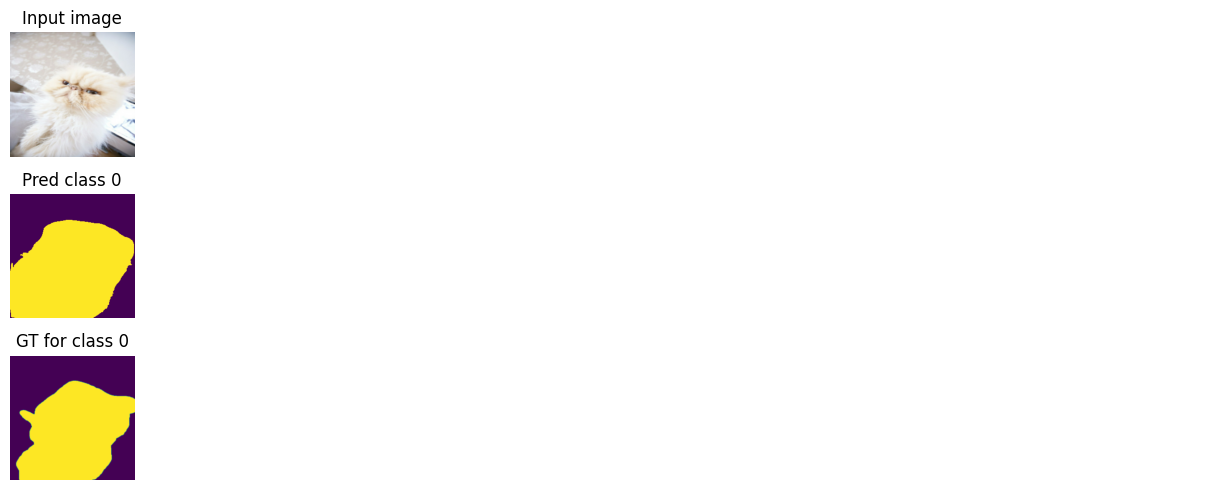

Train loss: 0.21988 | Time: 2m 15s | Val loss: 0.21166
Train_DICE_avg: 0.85881 | Train_Jaccard_avg: 0.76082 | Train_Sensitivity_avg: 0.91840 | Train_Specificity_avg: 0.87532 
Class 0 - Train_DICE: 0.85881 | Train_Jaccard: 0.76082 | Train_Sensitivity: 0.91840 | Train_Specificity: 0.87532 
Val_DICE_avg: 0.86160 | Val_Jaccard_avg: 0.76709 | Val_Sensitivity_avg: 0.93226 | Val_Specificity_avg: 0.87910 
Class 0 - Val_DICE: 0.86160 | Val_Jaccard: 0.76709 | Val_Sensitivity: 0.93226 | Val_Specificity: 0.87910 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.20965 | Time: 2m 38s | Val loss: 0.21017
Train_DICE_avg: 0.86726 | Train_Jaccard_avg: 0.77341 | Train_Sensitivity_avg: 0.92385 | Train_Specificity_avg: 0.87964 
Class 0 - Train_DICE: 0.86726 | Train_Jaccard: 0.77341 | Train_Sensitivity: 0.92385 | Train_Specificity: 0.87964 
Val_DICE_avg: 0.84654 | Val_Jaccard_avg: 0.74636 | Val_Sensitivity_avg: 0.95118 | Val_Specificity_avg: 0.86141 
Class 0 - Val_DICE: 0.84654 | Val_Jaccard: 0.74636 | Val_Sensitivity: 0.95118 | Val_Specificity: 0.86141 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.20497 | Time: 3m 0s | Val loss: 0.19701
Train_DICE_avg: 0.87061 | Train_Jaccard_avg: 0.77921 | Train_Sensitivity_avg: 0.92499 | Train_Specificity_avg: 0.88531 
Class 0 - Train_DICE: 0.87061 | Train_Jaccard: 0.77921 | Train_Sensitivity: 0.92499 | Train_Specificity: 0.88531 
Val_DICE_avg: 0.87134 | Val_Jaccard_avg: 0.78139 | Val_Sensitivity_avg: 0.94073 | Val_Specificity_avg: 0.88227 
Class 0 - Val_DICE: 0.87134 | Val_Jaccard: 0.78139 | Val_Sensitivity: 0.94073 | Val_Specificity: 0.88227 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.19609 | Time: 3m 23s | Val loss: 0.19965
Train_DICE_avg: 0.87641 | Train_Jaccard_avg: 0.78761 | Train_Sensitivity_avg: 0.92919 | Train_Specificity_avg: 0.88775 
Class 0 - Train_DICE: 0.87641 | Train_Jaccard: 0.78761 | Train_Sensitivity: 0.92919 | Train_Specificity: 0.88775 
Val_DICE_avg: 0.87902 | Val_Jaccard_avg: 0.79302 | Val_Sensitivity_avg: 0.92732 | Val_Specificity_avg: 0.89806 
Class 0 - Val_DICE: 0.87902 | Val_Jaccard: 0.79302 | Val_Sensitivity: 0.92732 | Val_Specificity: 0.89806 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18927 | Time: 3m 45s | Val loss: 0.19798
Train_DICE_avg: 0.88195 | Train_Jaccard_avg: 0.79604 | Train_Sensitivity_avg: 0.93276 | Train_Specificity_avg: 0.89293 
Class 0 - Train_DICE: 0.88195 | Train_Jaccard: 0.79604 | Train_Sensitivity: 0.93276 | Train_Specificity: 0.89293 
Val_DICE_avg: 0.88111 | Val_Jaccard_avg: 0.79631 | Val_Sensitivity_avg: 0.92441 | Val_Specificity_avg: 0.90247 
Class 0 - Val_DICE: 0.88111 | Val_Jaccard: 0.79631 | Val_Sensitivity: 0.92441 | Val_Specificity: 0.90247 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

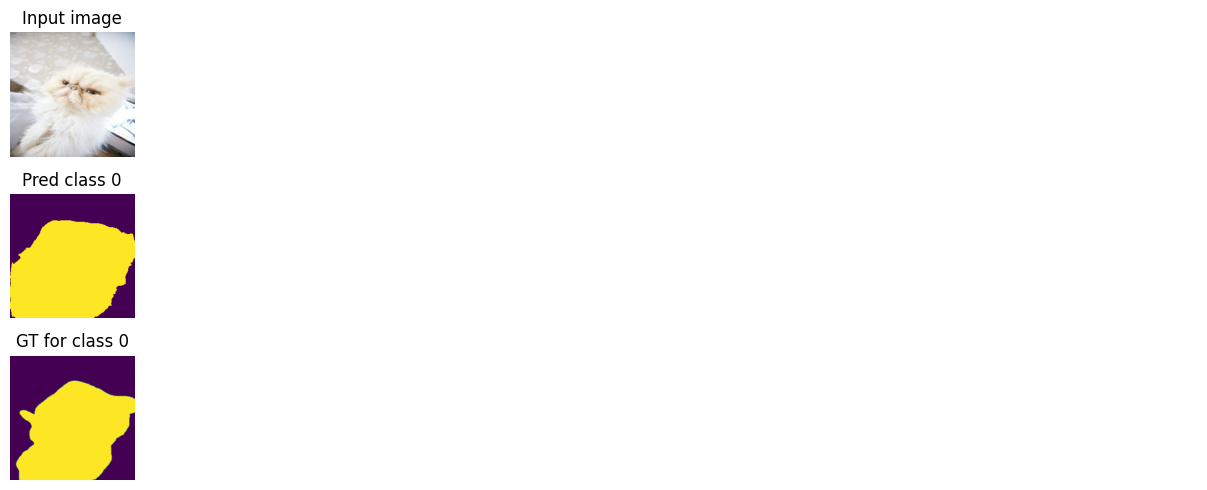

Train loss: 0.18577 | Time: 4m 9s | Val loss: 0.19881
Train_DICE_avg: 0.88393 | Train_Jaccard_avg: 0.79931 | Train_Sensitivity_avg: 0.93167 | Train_Specificity_avg: 0.89626 
Class 0 - Train_DICE: 0.88393 | Train_Jaccard: 0.79931 | Train_Sensitivity: 0.93167 | Train_Specificity: 0.89626 
Val_DICE_avg: 0.86711 | Val_Jaccard_avg: 0.77523 | Val_Sensitivity_avg: 0.94854 | Val_Specificity_avg: 0.87785 
Class 0 - Val_DICE: 0.86711 | Val_Jaccard: 0.77523 | Val_Sensitivity: 0.94854 | Val_Specificity: 0.87785 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.17563 | Time: 4m 31s | Val loss: 0.19010
Train_DICE_avg: 0.89129 | Train_Jaccard_avg: 0.81035 | Train_Sensitivity_avg: 0.93675 | Train_Specificity_avg: 0.89917 
Class 0 - Train_DICE: 0.89129 | Train_Jaccard: 0.81035 | Train_Sensitivity: 0.93675 | Train_Specificity: 0.89917 
Val_DICE_avg: 0.88660 | Val_Jaccard_avg: 0.80491 | Val_Sensitivity_avg: 0.93052 | Val_Specificity_avg: 0.90459 
Class 0 - Val_DICE: 0.88660 | Val_Jaccard: 0.80491 | Val_Sensitivity: 0.93052 | Val_Specificity: 0.90459 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.17099 | Time: 4m 54s | Val loss: 0.19085
Train_DICE_avg: 0.89484 | Train_Jaccard_avg: 0.81610 | Train_Sensitivity_avg: 0.93822 | Train_Specificity_avg: 0.90273 
Class 0 - Train_DICE: 0.89484 | Train_Jaccard: 0.81610 | Train_Sensitivity: 0.93822 | Train_Specificity: 0.90273 
Val_DICE_avg: 0.88277 | Val_Jaccard_avg: 0.79940 | Val_Sensitivity_avg: 0.93752 | Val_Specificity_avg: 0.89935 
Class 0 - Val_DICE: 0.88277 | Val_Jaccard: 0.79940 | Val_Sensitivity: 0.93752 | Val_Specificity: 0.89935 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16759 | Time: 5m 17s | Val loss: 0.18538
Train_DICE_avg: 0.89680 | Train_Jaccard_avg: 0.81899 | Train_Sensitivity_avg: 0.94072 | Train_Specificity_avg: 0.90456 
Class 0 - Train_DICE: 0.89680 | Train_Jaccard: 0.81899 | Train_Sensitivity: 0.94072 | Train_Specificity: 0.90456 
Val_DICE_avg: 0.89040 | Val_Jaccard_avg: 0.81086 | Val_Sensitivity_avg: 0.93349 | Val_Specificity_avg: 0.90673 
Class 0 - Val_DICE: 0.89040 | Val_Jaccard: 0.81086 | Val_Sensitivity: 0.93349 | Val_Specificity: 0.90673 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16210 | Time: 5m 40s | Val loss: 0.18321
Train_DICE_avg: 0.90004 | Train_Jaccard_avg: 0.82393 | Train_Sensitivity_avg: 0.94107 | Train_Specificity_avg: 0.90678 
Class 0 - Train_DICE: 0.90004 | Train_Jaccard: 0.82393 | Train_Sensitivity: 0.94107 | Train_Specificity: 0.90678 
Val_DICE_avg: 0.88899 | Val_Jaccard_avg: 0.80935 | Val_Sensitivity_avg: 0.93815 | Val_Specificity_avg: 0.90427 
Class 0 - Val_DICE: 0.88899 | Val_Jaccard: 0.80935 | Val_Sensitivity: 0.93815 | Val_Specificity: 0.90427 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

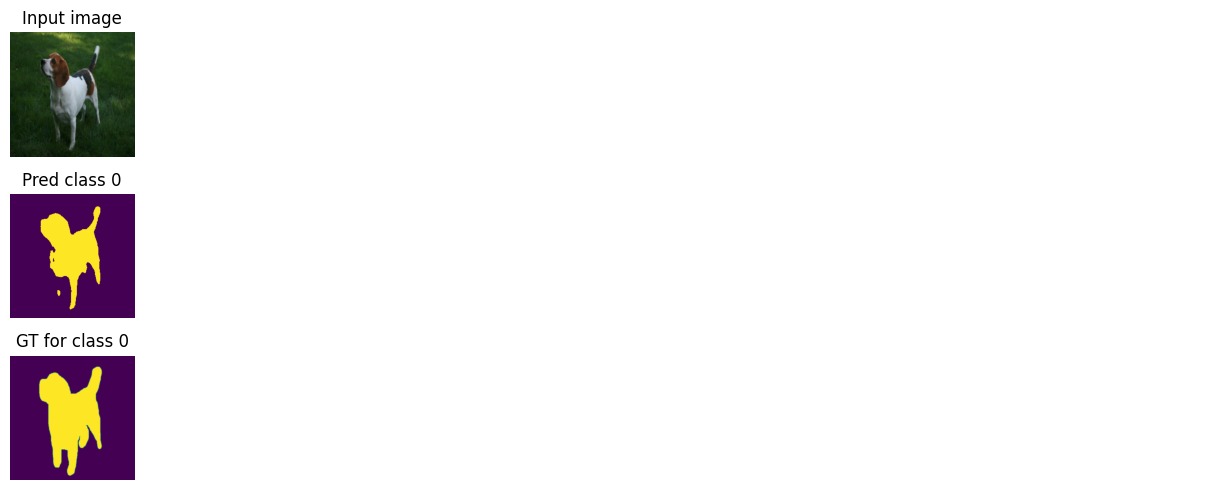

Train loss: 0.15790 | Time: 6m 3s | Val loss: 0.18130
Train_DICE_avg: 0.90236 | Train_Jaccard_avg: 0.82782 | Train_Sensitivity_avg: 0.94301 | Train_Specificity_avg: 0.91060 
Class 0 - Train_DICE: 0.90236 | Train_Jaccard: 0.82782 | Train_Sensitivity: 0.94301 | Train_Specificity: 0.91060 
Val_DICE_avg: 0.89122 | Val_Jaccard_avg: 0.81225 | Val_Sensitivity_avg: 0.93926 | Val_Specificity_avg: 0.90349 
Class 0 - Val_DICE: 0.89122 | Val_Jaccard: 0.81225 | Val_Sensitivity: 0.93926 | Val_Specificity: 0.90349 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15612 | Time: 6m 26s | Val loss: 0.17986
Train_DICE_avg: 0.90428 | Train_Jaccard_avg: 0.83116 | Train_Sensitivity_avg: 0.94337 | Train_Specificity_avg: 0.91152 
Class 0 - Train_DICE: 0.90428 | Train_Jaccard: 0.83116 | Train_Sensitivity: 0.94337 | Train_Specificity: 0.91152 
Val_DICE_avg: 0.89407 | Val_Jaccard_avg: 0.81696 | Val_Sensitivity_avg: 0.93883 | Val_Specificity_avg: 0.90938 
Class 0 - Val_DICE: 0.89407 | Val_Jaccard: 0.81696 | Val_Sensitivity: 0.93883 | Val_Specificity: 0.90938 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15185 | Time: 6m 49s | Val loss: 0.17853
Train_DICE_avg: 0.90614 | Train_Jaccard_avg: 0.83404 | Train_Sensitivity_avg: 0.94505 | Train_Specificity_avg: 0.91212 
Class 0 - Train_DICE: 0.90614 | Train_Jaccard: 0.83404 | Train_Sensitivity: 0.94505 | Train_Specificity: 0.91212 
Val_DICE_avg: 0.89742 | Val_Jaccard_avg: 0.82170 | Val_Sensitivity_avg: 0.93553 | Val_Specificity_avg: 0.91361 
Class 0 - Val_DICE: 0.89742 | Val_Jaccard: 0.82170 | Val_Sensitivity: 0.93553 | Val_Specificity: 0.91361 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15067 | Time: 7m 12s | Val loss: 0.17520
Train_DICE_avg: 0.90680 | Train_Jaccard_avg: 0.83527 | Train_Sensitivity_avg: 0.94531 | Train_Specificity_avg: 0.91359 
Class 0 - Train_DICE: 0.90680 | Train_Jaccard: 0.83527 | Train_Sensitivity: 0.94531 | Train_Specificity: 0.91359 
Val_DICE_avg: 0.89700 | Val_Jaccard_avg: 0.82107 | Val_Sensitivity_avg: 0.93993 | Val_Specificity_avg: 0.90940 
Class 0 - Val_DICE: 0.89700 | Val_Jaccard: 0.82107 | Val_Sensitivity: 0.93993 | Val_Specificity: 0.90940 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14600 | Time: 7m 35s | Val loss: 0.17790
Train_DICE_avg: 0.90831 | Train_Jaccard_avg: 0.83770 | Train_Sensitivity_avg: 0.94839 | Train_Specificity_avg: 0.91464 
Class 0 - Train_DICE: 0.90831 | Train_Jaccard: 0.83770 | Train_Sensitivity: 0.94839 | Train_Specificity: 0.91464 
Val_DICE_avg: 0.89522 | Val_Jaccard_avg: 0.81830 | Val_Sensitivity_avg: 0.94035 | Val_Specificity_avg: 0.90751 
Class 0 - Val_DICE: 0.89522 | Val_Jaccard: 0.81830 | Val_Sensitivity: 0.94035 | Val_Specificity: 0.90751 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

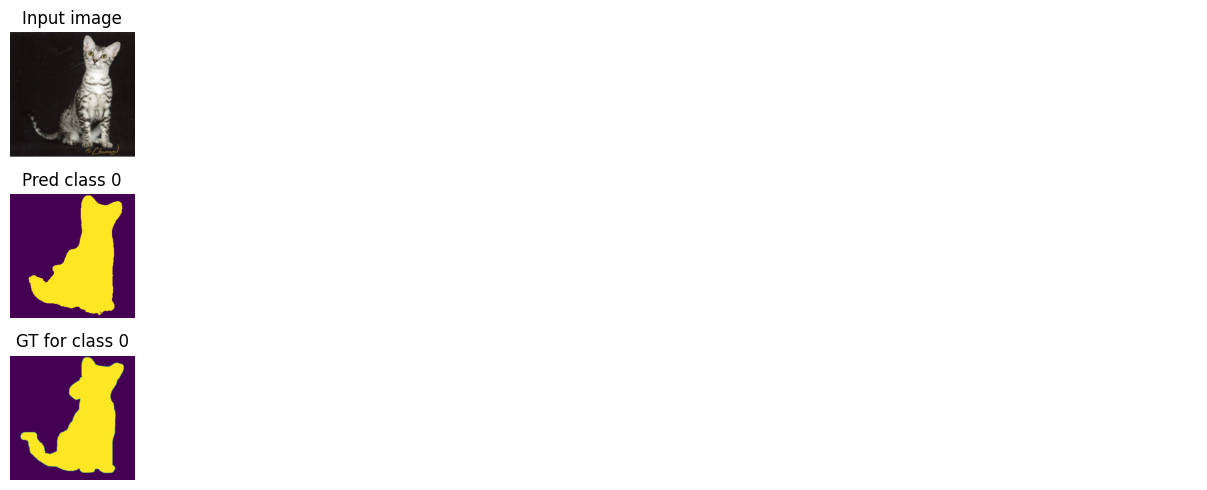

Train loss: 0.14765 | Time: 7m 58s | Val loss: 0.17476
Train_DICE_avg: 0.90835 | Train_Jaccard_avg: 0.83791 | Train_Sensitivity_avg: 0.94667 | Train_Specificity_avg: 0.91491 
Class 0 - Train_DICE: 0.90835 | Train_Jaccard: 0.83791 | Train_Sensitivity: 0.94667 | Train_Specificity: 0.91491 
Val_DICE_avg: 0.89906 | Val_Jaccard_avg: 0.82470 | Val_Sensitivity_avg: 0.93665 | Val_Specificity_avg: 0.91529 
Class 0 - Val_DICE: 0.89906 | Val_Jaccard: 0.82470 | Val_Sensitivity: 0.93665 | Val_Specificity: 0.91529 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13686 | Time: 8m 21s | Val loss: 0.17259
Train_DICE_avg: 0.91385 | Train_Jaccard_avg: 0.84669 | Train_Sensitivity_avg: 0.95025 | Train_Specificity_avg: 0.92066 
Class 0 - Train_DICE: 0.91385 | Train_Jaccard: 0.84669 | Train_Sensitivity: 0.95025 | Train_Specificity: 0.92066 
Val_DICE_avg: 0.89934 | Val_Jaccard_avg: 0.82517 | Val_Sensitivity_avg: 0.94422 | Val_Specificity_avg: 0.91146 
Class 0 - Val_DICE: 0.89934 | Val_Jaccard: 0.82517 | Val_Sensitivity: 0.94422 | Val_Specificity: 0.91146 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13481 | Time: 8m 44s | Val loss: 0.16954
Train_DICE_avg: 0.91717 | Train_Jaccard_avg: 0.85191 | Train_Sensitivity_avg: 0.95146 | Train_Specificity_avg: 0.92169 
Class 0 - Train_DICE: 0.91717 | Train_Jaccard: 0.85191 | Train_Sensitivity: 0.95146 | Train_Specificity: 0.92169 
Val_DICE_avg: 0.90286 | Val_Jaccard_avg: 0.83092 | Val_Sensitivity_avg: 0.94235 | Val_Specificity_avg: 0.91549 
Class 0 - Val_DICE: 0.90286 | Val_Jaccard: 0.83092 | Val_Sensitivity: 0.94235 | Val_Specificity: 0.91549 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13120 | Time: 9m 7s | Val loss: 0.16636
Train_DICE_avg: 0.91810 | Train_Jaccard_avg: 0.85373 | Train_Sensitivity_avg: 0.95399 | Train_Specificity_avg: 0.92307 
Class 0 - Train_DICE: 0.91810 | Train_Jaccard: 0.85373 | Train_Sensitivity: 0.95399 | Train_Specificity: 0.92307 
Val_DICE_avg: 0.90239 | Val_Jaccard_avg: 0.83085 | Val_Sensitivity_avg: 0.94750 | Val_Specificity_avg: 0.91439 
Class 0 - Val_DICE: 0.90239 | Val_Jaccard: 0.83085 | Val_Sensitivity: 0.94750 | Val_Specificity: 0.91439 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12526 | Time: 9m 30s | Val loss: 0.16833
Train_DICE_avg: 0.92122 | Train_Jaccard_avg: 0.85881 | Train_Sensitivity_avg: 0.95539 | Train_Specificity_avg: 0.92559 
Class 0 - Train_DICE: 0.92122 | Train_Jaccard: 0.85881 | Train_Sensitivity: 0.95539 | Train_Specificity: 0.92559 
Val_DICE_avg: 0.90634 | Val_Jaccard_avg: 0.83682 | Val_Sensitivity_avg: 0.94139 | Val_Specificity_avg: 0.92027 
Class 0 - Val_DICE: 0.90634 | Val_Jaccard: 0.83682 | Val_Sensitivity: 0.94139 | Val_Specificity: 0.92027 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

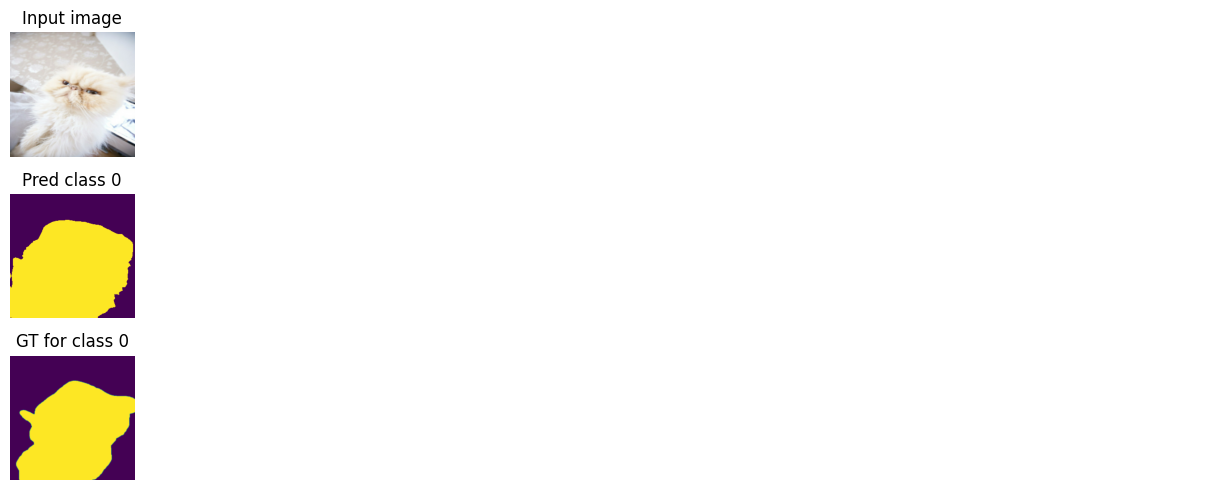

Train loss: 0.12150 | Time: 9m 53s | Val loss: 0.16669
Train_DICE_avg: 0.92394 | Train_Jaccard_avg: 0.86311 | Train_Sensitivity_avg: 0.95673 | Train_Specificity_avg: 0.92865 
Class 0 - Train_DICE: 0.92394 | Train_Jaccard: 0.86311 | Train_Sensitivity: 0.95673 | Train_Specificity: 0.92865 
Val_DICE_avg: 0.91076 | Val_Jaccard_avg: 0.84330 | Val_Sensitivity_avg: 0.93317 | Val_Specificity_avg: 0.92700 
Class 0 - Val_DICE: 0.91076 | Val_Jaccard: 0.84330 | Val_Sensitivity: 0.93317 | Val_Specificity: 0.92700 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11951 | Time: 10m 16s | Val loss: 0.16173
Train_DICE_avg: 0.92551 | Train_Jaccard_avg: 0.86589 | Train_Sensitivity_avg: 0.95741 | Train_Specificity_avg: 0.92892 
Class 0 - Train_DICE: 0.92551 | Train_Jaccard: 0.86589 | Train_Sensitivity: 0.95741 | Train_Specificity: 0.92892 
Val_DICE_avg: 0.90845 | Val_Jaccard_avg: 0.84051 | Val_Sensitivity_avg: 0.94323 | Val_Specificity_avg: 0.92052 
Class 0 - Val_DICE: 0.90845 | Val_Jaccard: 0.84051 | Val_Sensitivity: 0.94323 | Val_Specificity: 0.92052 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11692 | Time: 10m 39s | Val loss: 0.16280
Train_DICE_avg: 0.92636 | Train_Jaccard_avg: 0.86730 | Train_Sensitivity_avg: 0.95839 | Train_Specificity_avg: 0.93038 
Class 0 - Train_DICE: 0.92636 | Train_Jaccard: 0.86730 | Train_Sensitivity: 0.95839 | Train_Specificity: 0.93038 
Val_DICE_avg: 0.90389 | Val_Jaccard_avg: 0.83342 | Val_Sensitivity_avg: 0.95554 | Val_Specificity_avg: 0.91348 
Class 0 - Val_DICE: 0.90389 | Val_Jaccard: 0.83342 | Val_Sensitivity: 0.95554 | Val_Specificity: 0.91348 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11378 | Time: 11m 2s | Val loss: 0.15955
Train_DICE_avg: 0.92862 | Train_Jaccard_avg: 0.87109 | Train_Sensitivity_avg: 0.95916 | Train_Specificity_avg: 0.93219 
Class 0 - Train_DICE: 0.92862 | Train_Jaccard: 0.87109 | Train_Sensitivity: 0.95916 | Train_Specificity: 0.93219 
Val_DICE_avg: 0.90795 | Val_Jaccard_avg: 0.83974 | Val_Sensitivity_avg: 0.95336 | Val_Specificity_avg: 0.91655 
Class 0 - Val_DICE: 0.90795 | Val_Jaccard: 0.83974 | Val_Sensitivity: 0.95336 | Val_Specificity: 0.91655 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11272 | Time: 11m 25s | Val loss: 0.15911
Train_DICE_avg: 0.92875 | Train_Jaccard_avg: 0.87122 | Train_Sensitivity_avg: 0.95980 | Train_Specificity_avg: 0.93293 
Class 0 - Train_DICE: 0.92875 | Train_Jaccard: 0.87122 | Train_Sensitivity: 0.95980 | Train_Specificity: 0.93293 
Val_DICE_avg: 0.91381 | Val_Jaccard_avg: 0.84886 | Val_Sensitivity_avg: 0.94286 | Val_Specificity_avg: 0.92799 
Class 0 - Val_DICE: 0.91381 | Val_Jaccard: 0.84886 | Val_Sensitivity: 0.94286 | Val_Specificity: 0.92799 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

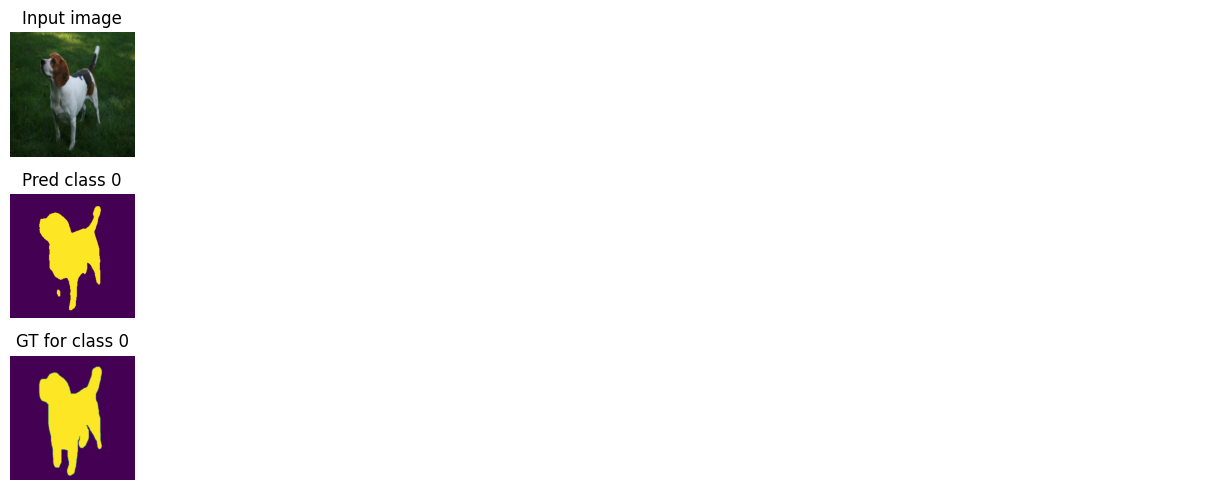

Train loss: 0.11183 | Time: 11m 48s | Val loss: 0.15357
Train_DICE_avg: 0.92979 | Train_Jaccard_avg: 0.87303 | Train_Sensitivity_avg: 0.96050 | Train_Specificity_avg: 0.93341 
Class 0 - Train_DICE: 0.92979 | Train_Jaccard: 0.87303 | Train_Sensitivity: 0.96050 | Train_Specificity: 0.93341 
Val_DICE_avg: 0.91386 | Val_Jaccard_avg: 0.84863 | Val_Sensitivity_avg: 0.94947 | Val_Specificity_avg: 0.92175 
Class 0 - Val_DICE: 0.91386 | Val_Jaccard: 0.84863 | Val_Sensitivity: 0.94947 | Val_Specificity: 0.92175 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10670 | Time: 12m 11s | Val loss: 0.15444
Train_DICE_avg: 0.93225 | Train_Jaccard_avg: 0.87722 | Train_Sensitivity_avg: 0.96163 | Train_Specificity_avg: 0.93585 
Class 0 - Train_DICE: 0.93225 | Train_Jaccard: 0.87722 | Train_Sensitivity: 0.96163 | Train_Specificity: 0.93585 
Val_DICE_avg: 0.91469 | Val_Jaccard_avg: 0.85002 | Val_Sensitivity_avg: 0.95074 | Val_Specificity_avg: 0.92558 
Class 0 - Val_DICE: 0.91469 | Val_Jaccard: 0.85002 | Val_Sensitivity: 0.95074 | Val_Specificity: 0.92558 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10367 | Time: 12m 35s | Val loss: 0.15132
Train_DICE_avg: 0.93402 | Train_Jaccard_avg: 0.88046 | Train_Sensitivity_avg: 0.96278 | Train_Specificity_avg: 0.93822 
Class 0 - Train_DICE: 0.93402 | Train_Jaccard: 0.88046 | Train_Sensitivity: 0.96278 | Train_Specificity: 0.93822 
Val_DICE_avg: 0.91482 | Val_Jaccard_avg: 0.85060 | Val_Sensitivity_avg: 0.95435 | Val_Specificity_avg: 0.92409 
Class 0 - Val_DICE: 0.91482 | Val_Jaccard: 0.85060 | Val_Sensitivity: 0.95435 | Val_Specificity: 0.92409 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10112 | Time: 12m 58s | Val loss: 0.14944
Train_DICE_avg: 0.93653 | Train_Jaccard_avg: 0.88454 | Train_Sensitivity_avg: 0.96414 | Train_Specificity_avg: 0.93892 
Class 0 - Train_DICE: 0.93653 | Train_Jaccard: 0.88454 | Train_Sensitivity: 0.96414 | Train_Specificity: 0.93892 
Val_DICE_avg: 0.91833 | Val_Jaccard_avg: 0.85566 | Val_Sensitivity_avg: 0.95106 | Val_Specificity_avg: 0.93010 
Class 0 - Val_DICE: 0.91833 | Val_Jaccard: 0.85566 | Val_Sensitivity: 0.95106 | Val_Specificity: 0.93010 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09826 | Time: 13m 21s | Val loss: 0.15181
Train_DICE_avg: 0.93739 | Train_Jaccard_avg: 0.88603 | Train_Sensitivity_avg: 0.96458 | Train_Specificity_avg: 0.94015 
Class 0 - Train_DICE: 0.93739 | Train_Jaccard: 0.88603 | Train_Sensitivity: 0.96458 | Train_Specificity: 0.94015 
Val_DICE_avg: 0.90930 | Val_Jaccard_avg: 0.84154 | Val_Sensitivity_avg: 0.96588 | Val_Specificity_avg: 0.91259 
Class 0 - Val_DICE: 0.90930 | Val_Jaccard: 0.84154 | Val_Sensitivity: 0.96588 | Val_Specificity: 0.91259 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

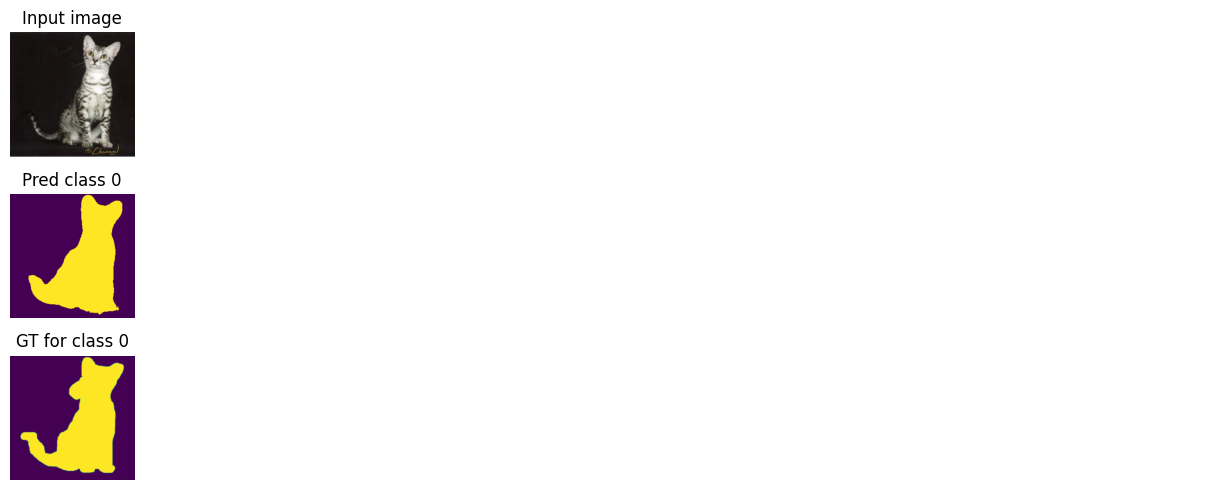

Train loss: 0.09676 | Time: 13m 44s | Val loss: 0.15340
Train_DICE_avg: 0.93796 | Train_Jaccard_avg: 0.88710 | Train_Sensitivity_avg: 0.96547 | Train_Specificity_avg: 0.94193 
Class 0 - Train_DICE: 0.93796 | Train_Jaccard: 0.88710 | Train_Sensitivity: 0.96547 | Train_Specificity: 0.94193 
Val_DICE_avg: 0.92124 | Val_Jaccard_avg: 0.86024 | Val_Sensitivity_avg: 0.94605 | Val_Specificity_avg: 0.93404 
Class 0 - Val_DICE: 0.92124 | Val_Jaccard: 0.86024 | Val_Sensitivity: 0.94605 | Val_Specificity: 0.93404 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09449 | Time: 14m 7s | Val loss: 0.15081
Train_DICE_avg: 0.93880 | Train_Jaccard_avg: 0.88853 | Train_Sensitivity_avg: 0.96597 | Train_Specificity_avg: 0.94199 
Class 0 - Train_DICE: 0.93880 | Train_Jaccard: 0.88853 | Train_Sensitivity: 0.96597 | Train_Specificity: 0.94199 
Val_DICE_avg: 0.92234 | Val_Jaccard_avg: 0.86194 | Val_Sensitivity_avg: 0.94607 | Val_Specificity_avg: 0.93541 
Class 0 - Val_DICE: 0.92234 | Val_Jaccard: 0.86194 | Val_Sensitivity: 0.94607 | Val_Specificity: 0.93541 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09316 | Time: 14m 30s | Val loss: 0.14291
Train_DICE_avg: 0.94041 | Train_Jaccard_avg: 0.89122 | Train_Sensitivity_avg: 0.96689 | Train_Specificity_avg: 0.94225 
Class 0 - Train_DICE: 0.94041 | Train_Jaccard: 0.89122 | Train_Sensitivity: 0.96689 | Train_Specificity: 0.94225 
Val_DICE_avg: 0.91907 | Val_Jaccard_avg: 0.85671 | Val_Sensitivity_avg: 0.95898 | Val_Specificity_avg: 0.92358 
Class 0 - Val_DICE: 0.91907 | Val_Jaccard: 0.85671 | Val_Sensitivity: 0.95898 | Val_Specificity: 0.92358 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09041 | Time: 14m 53s | Val loss: 0.14300
Train_DICE_avg: 0.94144 | Train_Jaccard_avg: 0.89312 | Train_Sensitivity_avg: 0.96754 | Train_Specificity_avg: 0.94537 
Class 0 - Train_DICE: 0.94144 | Train_Jaccard: 0.89312 | Train_Sensitivity: 0.96754 | Train_Specificity: 0.94537 
Val_DICE_avg: 0.92066 | Val_Jaccard_avg: 0.85909 | Val_Sensitivity_avg: 0.95840 | Val_Specificity_avg: 0.92587 
Class 0 - Val_DICE: 0.92066 | Val_Jaccard: 0.85909 | Val_Sensitivity: 0.95840 | Val_Specificity: 0.92587 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08887 | Time: 15m 16s | Val loss: 0.14197
Train_DICE_avg: 0.94355 | Train_Jaccard_avg: 0.89597 | Train_Sensitivity_avg: 0.96920 | Train_Specificity_avg: 0.94430 
Class 0 - Train_DICE: 0.94355 | Train_Jaccard: 0.89597 | Train_Sensitivity: 0.96920 | Train_Specificity: 0.94430 
Val_DICE_avg: 0.92275 | Val_Jaccard_avg: 0.86254 | Val_Sensitivity_avg: 0.95580 | Val_Specificity_avg: 0.92924 
Class 0 - Val_DICE: 0.92275 | Val_Jaccard: 0.86254 | Val_Sensitivity: 0.95580 | Val_Specificity: 0.92924 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

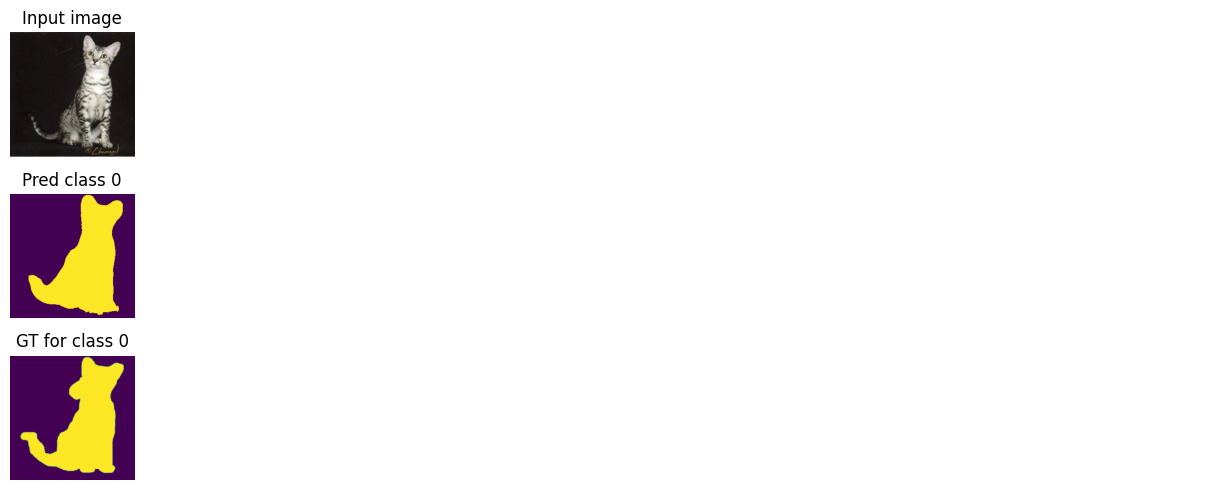

Train loss: 0.08692 | Time: 15m 39s | Val loss: 0.14215
Train_DICE_avg: 0.94429 | Train_Jaccard_avg: 0.89738 | Train_Sensitivity_avg: 0.96987 | Train_Specificity_avg: 0.94580 
Class 0 - Train_DICE: 0.94429 | Train_Jaccard: 0.89738 | Train_Sensitivity: 0.96987 | Train_Specificity: 0.94580 
Val_DICE_avg: 0.92216 | Val_Jaccard_avg: 0.86176 | Val_Sensitivity_avg: 0.95715 | Val_Specificity_avg: 0.92801 
Class 0 - Val_DICE: 0.92216 | Val_Jaccard: 0.86176 | Val_Sensitivity: 0.95715 | Val_Specificity: 0.92801 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08618 | Time: 16m 2s | Val loss: 0.14171
Train_DICE_avg: 0.94450 | Train_Jaccard_avg: 0.89832 | Train_Sensitivity_avg: 0.96870 | Train_Specificity_avg: 0.94682 
Class 0 - Train_DICE: 0.94450 | Train_Jaccard: 0.89832 | Train_Sensitivity: 0.96870 | Train_Specificity: 0.94682 
Val_DICE_avg: 0.92258 | Val_Jaccard_avg: 0.86244 | Val_Sensitivity_avg: 0.95793 | Val_Specificity_avg: 0.92769 
Class 0 - Val_DICE: 0.92258 | Val_Jaccard: 0.86244 | Val_Sensitivity: 0.95793 | Val_Specificity: 0.92769 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08502 | Time: 16m 25s | Val loss: 0.13956
Train_DICE_avg: 0.94521 | Train_Jaccard_avg: 0.89898 | Train_Sensitivity_avg: 0.96979 | Train_Specificity_avg: 0.94727 
Class 0 - Train_DICE: 0.94521 | Train_Jaccard: 0.89898 | Train_Sensitivity: 0.96979 | Train_Specificity: 0.94727 
Val_DICE_avg: 0.92431 | Val_Jaccard_avg: 0.86515 | Val_Sensitivity_avg: 0.95574 | Val_Specificity_avg: 0.92961 
Class 0 - Val_DICE: 0.92431 | Val_Jaccard: 0.86515 | Val_Sensitivity: 0.95574 | Val_Specificity: 0.92961 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08395 | Time: 16m 48s | Val loss: 0.14074
Train_DICE_avg: 0.94720 | Train_Jaccard_avg: 0.90170 | Train_Sensitivity_avg: 0.97252 | Train_Specificity_avg: 0.94763 
Class 0 - Train_DICE: 0.94720 | Train_Jaccard: 0.90170 | Train_Sensitivity: 0.97252 | Train_Specificity: 0.94763 
Val_DICE_avg: 0.92477 | Val_Jaccard_avg: 0.86583 | Val_Sensitivity_avg: 0.95466 | Val_Specificity_avg: 0.93083 
Class 0 - Val_DICE: 0.92477 | Val_Jaccard: 0.86583 | Val_Sensitivity: 0.95466 | Val_Specificity: 0.93083 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08243 | Time: 17m 11s | Val loss: 0.14111
Train_DICE_avg: 0.94700 | Train_Jaccard_avg: 0.90203 | Train_Sensitivity_avg: 0.97158 | Train_Specificity_avg: 0.94765 
Class 0 - Train_DICE: 0.94700 | Train_Jaccard: 0.90203 | Train_Sensitivity: 0.97158 | Train_Specificity: 0.94765 
Val_DICE_avg: 0.92377 | Val_Jaccard_avg: 0.86438 | Val_Sensitivity_avg: 0.95574 | Val_Specificity_avg: 0.93054 
Class 0 - Val_DICE: 0.92377 | Val_Jaccard: 0.86438 | Val_Sensitivity: 0.95574 | Val_Specificity: 0.93054 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

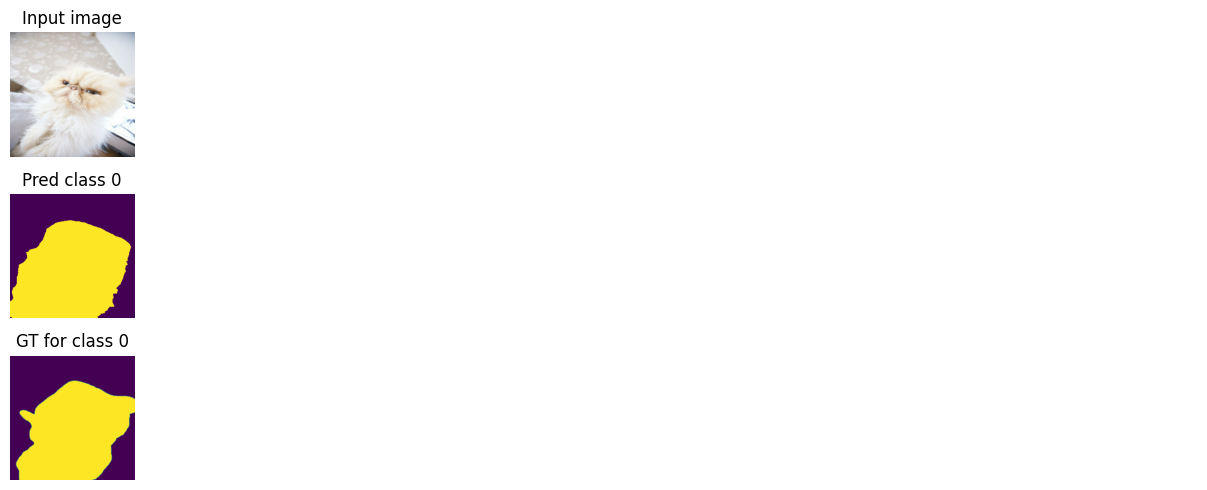

Train loss: 0.08299 | Time: 17m 34s | Val loss: 0.14124
Train_DICE_avg: 0.94589 | Train_Jaccard_avg: 0.90086 | Train_Sensitivity_avg: 0.96993 | Train_Specificity_avg: 0.94863 
Class 0 - Train_DICE: 0.94589 | Train_Jaccard: 0.90086 | Train_Sensitivity: 0.96993 | Train_Specificity: 0.94863 
Val_DICE_avg: 0.92302 | Val_Jaccard_avg: 0.86319 | Val_Sensitivity_avg: 0.95857 | Val_Specificity_avg: 0.92871 
Class 0 - Val_DICE: 0.92302 | Val_Jaccard: 0.86319 | Val_Sensitivity: 0.95857 | Val_Specificity: 0.92871 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08115 | Time: 17m 57s | Val loss: 0.14346
Train_DICE_avg: 0.94722 | Train_Jaccard_avg: 0.90257 | Train_Sensitivity_avg: 0.97227 | Train_Specificity_avg: 0.94878 
Class 0 - Train_DICE: 0.94722 | Train_Jaccard: 0.90257 | Train_Sensitivity: 0.97227 | Train_Specificity: 0.94878 
Val_DICE_avg: 0.92717 | Val_Jaccard_avg: 0.87005 | Val_Sensitivity_avg: 0.94910 | Val_Specificity_avg: 0.93816 
Class 0 - Val_DICE: 0.92717 | Val_Jaccard: 0.87005 | Val_Sensitivity: 0.94910 | Val_Specificity: 0.93816 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08128 | Time: 18m 20s | Val loss: 0.14207
Train_DICE_avg: 0.94760 | Train_Jaccard_avg: 0.90315 | Train_Sensitivity_avg: 0.97118 | Train_Specificity_avg: 0.94916 
Class 0 - Train_DICE: 0.94760 | Train_Jaccard: 0.90315 | Train_Sensitivity: 0.97118 | Train_Specificity: 0.94916 
Val_DICE_avg: 0.92613 | Val_Jaccard_avg: 0.86824 | Val_Sensitivity_avg: 0.95373 | Val_Specificity_avg: 0.93422 
Class 0 - Val_DICE: 0.92613 | Val_Jaccard: 0.86824 | Val_Sensitivity: 0.95373 | Val_Specificity: 0.93422 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08069 | Time: 18m 43s | Val loss: 0.14418
Train_DICE_avg: 0.94730 | Train_Jaccard_avg: 0.90329 | Train_Sensitivity_avg: 0.97162 | Train_Specificity_avg: 0.94901 
Class 0 - Train_DICE: 0.94730 | Train_Jaccard: 0.90329 | Train_Sensitivity: 0.97162 | Train_Specificity: 0.94901 
Val_DICE_avg: 0.92791 | Val_Jaccard_avg: 0.87121 | Val_Sensitivity_avg: 0.94719 | Val_Specificity_avg: 0.93970 
Class 0 - Val_DICE: 0.92791 | Val_Jaccard: 0.87121 | Val_Sensitivity: 0.94719 | Val_Specificity: 0.93970 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07890 | Time: 19m 6s | Val loss: 0.14738
Train_DICE_avg: 0.94879 | Train_Jaccard_avg: 0.90523 | Train_Sensitivity_avg: 0.97273 | Train_Specificity_avg: 0.94995 
Class 0 - Train_DICE: 0.94879 | Train_Jaccard: 0.90523 | Train_Sensitivity: 0.97273 | Train_Specificity: 0.94995 
Val_DICE_avg: 0.92818 | Val_Jaccard_avg: 0.87170 | Val_Sensitivity_avg: 0.94362 | Val_Specificity_avg: 0.94225 
Class 0 - Val_DICE: 0.92818 | Val_Jaccard: 0.87170 | Val_Sensitivity: 0.94362 | Val_Specificity: 0.94225 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

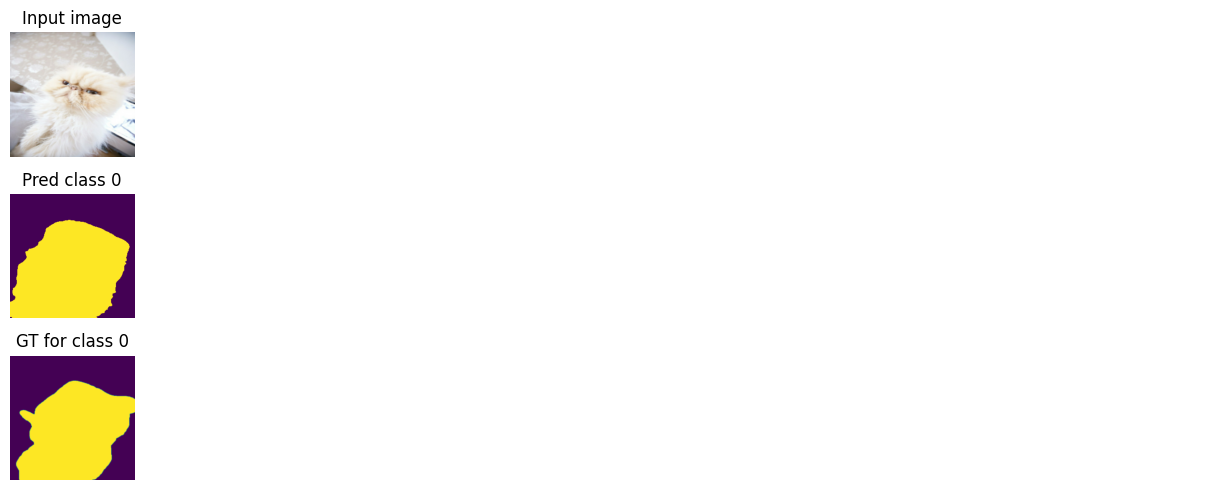

Train loss: 0.07980 | Time: 19m 30s | Val loss: 0.14330
Train_DICE_avg: 0.94796 | Train_Jaccard_avg: 0.90384 | Train_Sensitivity_avg: 0.97174 | Train_Specificity_avg: 0.94994 
Class 0 - Train_DICE: 0.94796 | Train_Jaccard: 0.90384 | Train_Sensitivity: 0.97174 | Train_Specificity: 0.94994 
Val_DICE_avg: 0.92732 | Val_Jaccard_avg: 0.87011 | Val_Sensitivity_avg: 0.95025 | Val_Specificity_avg: 0.93610 
Class 0 - Val_DICE: 0.92732 | Val_Jaccard: 0.87011 | Val_Sensitivity: 0.95025 | Val_Specificity: 0.93610 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07877 | Time: 19m 53s | Val loss: 0.14847
Train_DICE_avg: 0.94906 | Train_Jaccard_avg: 0.90573 | Train_Sensitivity_avg: 0.97264 | Train_Specificity_avg: 0.95069 
Class 0 - Train_DICE: 0.94906 | Train_Jaccard: 0.90573 | Train_Sensitivity: 0.97264 | Train_Specificity: 0.95069 
Val_DICE_avg: 0.92836 | Val_Jaccard_avg: 0.87210 | Val_Sensitivity_avg: 0.94210 | Val_Specificity_avg: 0.94389 
Class 0 - Val_DICE: 0.92836 | Val_Jaccard: 0.87210 | Val_Sensitivity: 0.94210 | Val_Specificity: 0.94389 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07887 | Time: 20m 16s | Val loss: 0.14646
Train_DICE_avg: 0.94888 | Train_Jaccard_avg: 0.90544 | Train_Sensitivity_avg: 0.97264 | Train_Specificity_avg: 0.95073 
Class 0 - Train_DICE: 0.94888 | Train_Jaccard: 0.90544 | Train_Sensitivity: 0.97264 | Train_Specificity: 0.95073 
Val_DICE_avg: 0.92797 | Val_Jaccard_avg: 0.87141 | Val_Sensitivity_avg: 0.94537 | Val_Specificity_avg: 0.94104 
Class 0 - Val_DICE: 0.92797 | Val_Jaccard: 0.87141 | Val_Sensitivity: 0.94537 | Val_Specificity: 0.94104 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07798 | Time: 20m 39s | Val loss: 0.14430
Train_DICE_avg: 0.94916 | Train_Jaccard_avg: 0.90597 | Train_Sensitivity_avg: 0.97304 | Train_Specificity_avg: 0.95088 
Class 0 - Train_DICE: 0.94916 | Train_Jaccard: 0.90597 | Train_Sensitivity: 0.97304 | Train_Specificity: 0.95088 
Val_DICE_avg: 0.92855 | Val_Jaccard_avg: 0.87236 | Val_Sensitivity_avg: 0.94611 | Val_Specificity_avg: 0.94103 
Class 0 - Val_DICE: 0.92855 | Val_Jaccard: 0.87236 | Val_Sensitivity: 0.94611 | Val_Specificity: 0.94103 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07670 | Time: 21m 2s | Val loss: 0.14651
Train_DICE_avg: 0.95023 | Train_Jaccard_avg: 0.90778 | Train_Sensitivity_avg: 0.97288 | Train_Specificity_avg: 0.95130 
Class 0 - Train_DICE: 0.95023 | Train_Jaccard: 0.90778 | Train_Sensitivity: 0.97288 | Train_Specificity: 0.95130 
Val_DICE_avg: 0.92835 | Val_Jaccard_avg: 0.87204 | Val_Sensitivity_avg: 0.94491 | Val_Specificity_avg: 0.94185 
Class 0 - Val_DICE: 0.92835 | Val_Jaccard: 0.87204 | Val_Sensitivity: 0.94491 | Val_Specificity: 0.94185 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

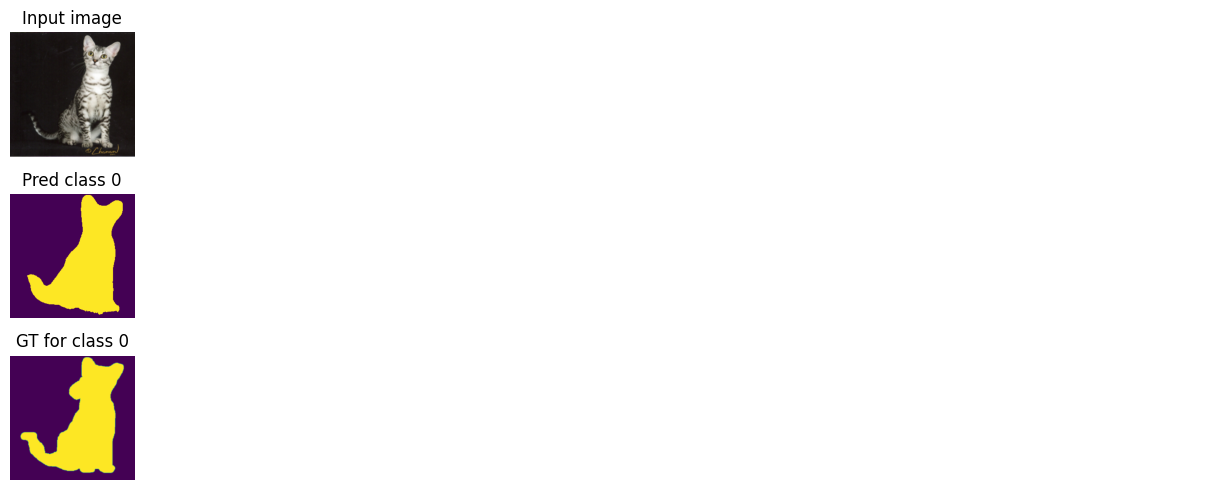

Train loss: 0.07688 | Time: 21m 25s | Val loss: 0.14764
Train_DICE_avg: 0.95247 | Train_Jaccard_avg: 0.91024 | Train_Sensitivity_avg: 0.97481 | Train_Specificity_avg: 0.95139 
Class 0 - Train_DICE: 0.95247 | Train_Jaccard: 0.91024 | Train_Sensitivity: 0.97481 | Train_Specificity: 0.95139 
Val_DICE_avg: 0.92865 | Val_Jaccard_avg: 0.87253 | Val_Sensitivity_avg: 0.94561 | Val_Specificity_avg: 0.94307 
Class 0 - Val_DICE: 0.92865 | Val_Jaccard: 0.87253 | Val_Sensitivity: 0.94561 | Val_Specificity: 0.94307 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07659 | Time: 21m 48s | Val loss: 0.14657
Train_DICE_avg: 0.95012 | Train_Jaccard_avg: 0.90756 | Train_Sensitivity_avg: 0.97361 | Train_Specificity_avg: 0.95114 
Class 0 - Train_DICE: 0.95012 | Train_Jaccard: 0.90756 | Train_Sensitivity: 0.97361 | Train_Specificity: 0.95114 
Val_DICE_avg: 0.92840 | Val_Jaccard_avg: 0.87208 | Val_Sensitivity_avg: 0.94632 | Val_Specificity_avg: 0.94185 
Class 0 - Val_DICE: 0.92840 | Val_Jaccard: 0.87208 | Val_Sensitivity: 0.94632 | Val_Specificity: 0.94185 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07580 | Time: 22m 11s | Val loss: 0.14456
Train_DICE_avg: 0.95046 | Train_Jaccard_avg: 0.90820 | Train_Sensitivity_avg: 0.97307 | Train_Specificity_avg: 0.95233 
Class 0 - Train_DICE: 0.95046 | Train_Jaccard: 0.90820 | Train_Sensitivity: 0.97307 | Train_Specificity: 0.95233 
Val_DICE_avg: 0.92843 | Val_Jaccard_avg: 0.87212 | Val_Sensitivity_avg: 0.94845 | Val_Specificity_avg: 0.94085 
Class 0 - Val_DICE: 0.92843 | Val_Jaccard: 0.87212 | Val_Sensitivity: 0.94845 | Val_Specificity: 0.94085 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07522 | Time: 22m 34s | Val loss: 0.14369
Train_DICE_avg: 0.95105 | Train_Jaccard_avg: 0.90924 | Train_Sensitivity_avg: 0.97347 | Train_Specificity_avg: 0.95241 
Class 0 - Train_DICE: 0.95105 | Train_Jaccard: 0.90924 | Train_Sensitivity: 0.97347 | Train_Specificity: 0.95241 
Val_DICE_avg: 0.92797 | Val_Jaccard_avg: 0.87133 | Val_Sensitivity_avg: 0.95124 | Val_Specificity_avg: 0.93827 
Class 0 - Val_DICE: 0.92797 | Val_Jaccard: 0.87133 | Val_Sensitivity: 0.95124 | Val_Specificity: 0.93827 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07539 | Time: 22m 57s | Val loss: 0.14332
Train_DICE_avg: 0.95076 | Train_Jaccard_avg: 0.90877 | Train_Sensitivity_avg: 0.97335 | Train_Specificity_avg: 0.95173 
Class 0 - Train_DICE: 0.95076 | Train_Jaccard: 0.90877 | Train_Sensitivity: 0.97335 | Train_Specificity: 0.95173 
Val_DICE_avg: 0.92749 | Val_Jaccard_avg: 0.87052 | Val_Sensitivity_avg: 0.95230 | Val_Specificity_avg: 0.93702 
Class 0 - Val_DICE: 0.92749 | Val_Jaccard: 0.87052 | Val_Sensitivity: 0.95230 | Val_Specificity: 0.93702 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

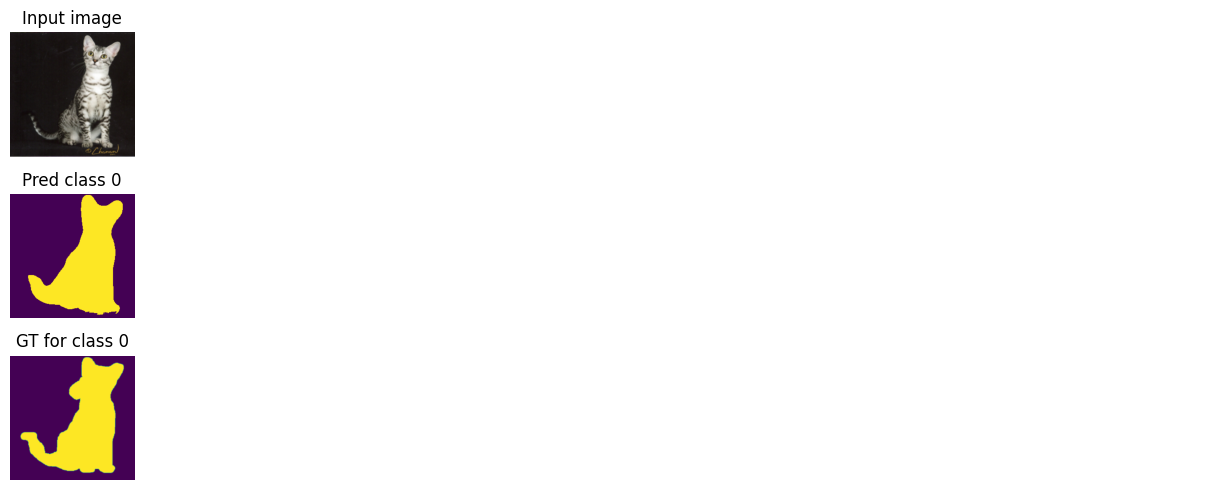

Train loss: 0.07472 | Time: 23m 20s | Val loss: 0.14440
Train_DICE_avg: 0.95231 | Train_Jaccard_avg: 0.91077 | Train_Sensitivity_avg: 0.97479 | Train_Specificity_avg: 0.95265 
Class 0 - Train_DICE: 0.95231 | Train_Jaccard: 0.91077 | Train_Sensitivity: 0.97479 | Train_Specificity: 0.95265 
Val_DICE_avg: 0.92810 | Val_Jaccard_avg: 0.87158 | Val_Sensitivity_avg: 0.95025 | Val_Specificity_avg: 0.93920 
Class 0 - Val_DICE: 0.92810 | Val_Jaccard: 0.87158 | Val_Sensitivity: 0.95025 | Val_Specificity: 0.93920 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]



Global Performance Metrics:
Loss mean: 0.13054, std: 0.01301
Dice Coefficient mean: 0.93573, std: 0.04448
Jaccard Index mean: 0.88222, std: 0.07194
Sensitivity mean: 0.95187, std: 0.04150
Specificity mean: 0.94773, std: 0.05548

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.93573, std: 0.04448
Jaccard mean: 0.88222, std: 0.07194
Sensitivity mean: 0.95187, std: 0.04150
Specificity mean: 0.94773, std: 0.05548


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-DeepLabV3+-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.66 GB
GPU Memory - Reserved: 1.45 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

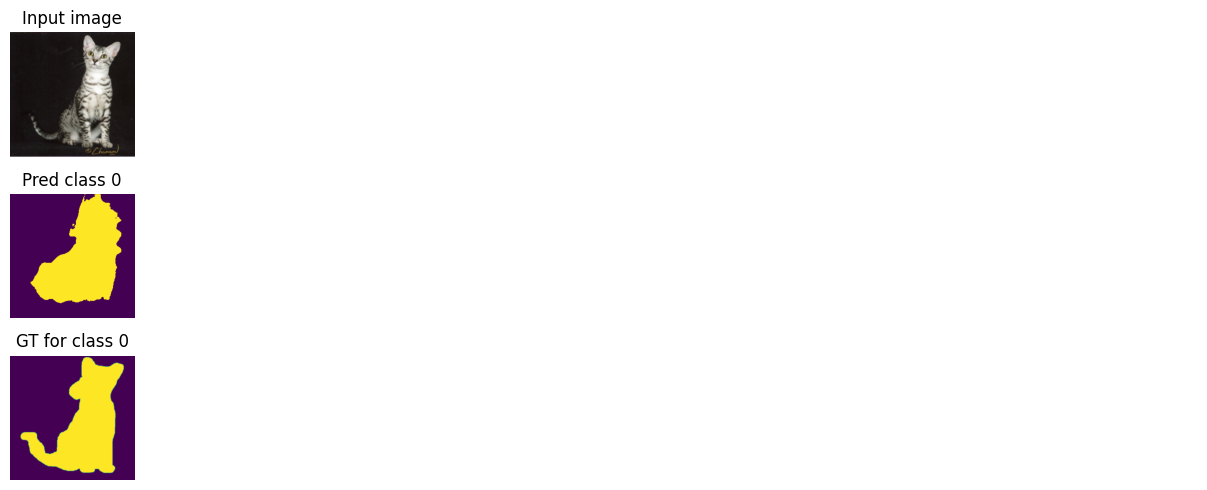

Train loss: 0.04656 | Time: 0m 23s | Val loss: 0.05166
Train_DICE_avg: 0.71497 | Train_Jaccard_avg: 0.57724 | Train_Sensitivity_avg: 0.80113 | Train_Specificity_avg: 0.78948 
Class 0 - Train_DICE: 0.71497 | Train_Jaccard: 0.57724 | Train_Sensitivity: 0.80113 | Train_Specificity: 0.78948 
Val_DICE_avg: 0.30462 | Val_Jaccard_avg: 0.20418 | Val_Sensitivity_avg: 0.98770 | Val_Specificity_avg: 0.63598 
Class 0 - Val_DICE: 0.30462 | Val_Jaccard: 0.20418 | Val_Sensitivity: 0.98770 | Val_Specificity: 0.63598 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.03249 | Time: 0m 45s | Val loss: 0.02893
Train_DICE_avg: 0.81935 | Train_Jaccard_avg: 0.70538 | Train_Sensitivity_avg: 0.86691 | Train_Specificity_avg: 0.85898 
Class 0 - Train_DICE: 0.81935 | Train_Jaccard: 0.70538 | Train_Sensitivity: 0.86691 | Train_Specificity: 0.85898 
Val_DICE_avg: 0.81823 | Val_Jaccard_avg: 0.70677 | Val_Sensitivity_avg: 0.92939 | Val_Specificity_avg: 0.83918 
Class 0 - Val_DICE: 0.81823 | Val_Jaccard: 0.70677 | Val_Sensitivity: 0.92939 | Val_Specificity: 0.83918 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02888 | Time: 1m 8s | Val loss: 0.02557
Train_DICE_avg: 0.84061 | Train_Jaccard_avg: 0.73471 | Train_Sensitivity_avg: 0.88378 | Train_Specificity_avg: 0.87157 
Class 0 - Train_DICE: 0.84061 | Train_Jaccard: 0.73471 | Train_Sensitivity: 0.88378 | Train_Specificity: 0.87157 
Val_DICE_avg: 0.85556 | Val_Jaccard_avg: 0.75800 | Val_Sensitivity_avg: 0.90864 | Val_Specificity_avg: 0.87997 
Class 0 - Val_DICE: 0.85556 | Val_Jaccard: 0.75800 | Val_Sensitivity: 0.90864 | Val_Specificity: 0.87997 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02650 | Time: 1m 30s | Val loss: 0.02423
Train_DICE_avg: 0.85431 | Train_Jaccard_avg: 0.75449 | Train_Sensitivity_avg: 0.89360 | Train_Specificity_avg: 0.88079 
Class 0 - Train_DICE: 0.85431 | Train_Jaccard: 0.75449 | Train_Sensitivity: 0.89360 | Train_Specificity: 0.88079 
Val_DICE_avg: 0.86234 | Val_Jaccard_avg: 0.76742 | Val_Sensitivity_avg: 0.91641 | Val_Specificity_avg: 0.88449 
Class 0 - Val_DICE: 0.86234 | Val_Jaccard: 0.76742 | Val_Sensitivity: 0.91641 | Val_Specificity: 0.88449 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02512 | Time: 1m 53s | Val loss: 0.02380
Train_DICE_avg: 0.86348 | Train_Jaccard_avg: 0.76787 | Train_Sensitivity_avg: 0.90032 | Train_Specificity_avg: 0.88870 
Class 0 - Train_DICE: 0.86348 | Train_Jaccard: 0.76787 | Train_Sensitivity: 0.90032 | Train_Specificity: 0.88870 
Val_DICE_avg: 0.87557 | Val_Jaccard_avg: 0.78693 | Val_Sensitivity_avg: 0.90023 | Val_Specificity_avg: 0.90406 
Class 0 - Val_DICE: 0.87557 | Val_Jaccard: 0.78693 | Val_Sensitivity: 0.90023 | Val_Specificity: 0.90406 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

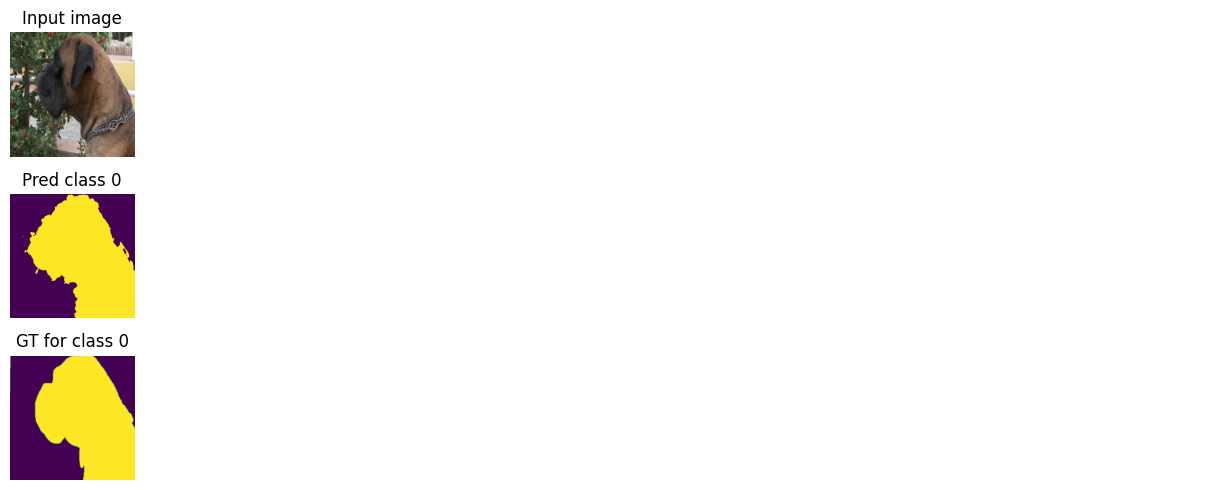

Train loss: 0.02406 | Time: 2m 15s | Val loss: 0.02338
Train_DICE_avg: 0.86968 | Train_Jaccard_avg: 0.77738 | Train_Sensitivity_avg: 0.90462 | Train_Specificity_avg: 0.89200 
Class 0 - Train_DICE: 0.86968 | Train_Jaccard: 0.77738 | Train_Sensitivity: 0.90462 | Train_Specificity: 0.89200 
Val_DICE_avg: 0.86377 | Val_Jaccard_avg: 0.77093 | Val_Sensitivity_avg: 0.93313 | Val_Specificity_avg: 0.88149 
Class 0 - Val_DICE: 0.86377 | Val_Jaccard: 0.77093 | Val_Sensitivity: 0.93313 | Val_Specificity: 0.88149 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02322 | Time: 2m 38s | Val loss: 0.02272
Train_DICE_avg: 0.87534 | Train_Jaccard_avg: 0.78581 | Train_Sensitivity_avg: 0.90991 | Train_Specificity_avg: 0.89524 
Class 0 - Train_DICE: 0.87534 | Train_Jaccard: 0.78581 | Train_Sensitivity: 0.90991 | Train_Specificity: 0.89524 
Val_DICE_avg: 0.87252 | Val_Jaccard_avg: 0.78346 | Val_Sensitivity_avg: 0.93354 | Val_Specificity_avg: 0.88667 
Class 0 - Val_DICE: 0.87252 | Val_Jaccard: 0.78346 | Val_Sensitivity: 0.93354 | Val_Specificity: 0.88667 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02239 | Time: 3m 0s | Val loss: 0.02219
Train_DICE_avg: 0.88087 | Train_Jaccard_avg: 0.79426 | Train_Sensitivity_avg: 0.91282 | Train_Specificity_avg: 0.89954 
Class 0 - Train_DICE: 0.88087 | Train_Jaccard: 0.79426 | Train_Sensitivity: 0.91282 | Train_Specificity: 0.89954 
Val_DICE_avg: 0.87439 | Val_Jaccard_avg: 0.78718 | Val_Sensitivity_avg: 0.93166 | Val_Specificity_avg: 0.89195 
Class 0 - Val_DICE: 0.87439 | Val_Jaccard: 0.78718 | Val_Sensitivity: 0.93166 | Val_Specificity: 0.89195 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02162 | Time: 3m 22s | Val loss: 0.02185
Train_DICE_avg: 0.88498 | Train_Jaccard_avg: 0.80032 | Train_Sensitivity_avg: 0.91573 | Train_Specificity_avg: 0.90186 
Class 0 - Train_DICE: 0.88498 | Train_Jaccard: 0.80032 | Train_Sensitivity: 0.91573 | Train_Specificity: 0.90186 
Val_DICE_avg: 0.88267 | Val_Jaccard_avg: 0.79845 | Val_Sensitivity_avg: 0.92215 | Val_Specificity_avg: 0.90316 
Class 0 - Val_DICE: 0.88267 | Val_Jaccard: 0.79845 | Val_Sensitivity: 0.92215 | Val_Specificity: 0.90316 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02112 | Time: 3m 45s | Val loss: 0.02148
Train_DICE_avg: 0.88837 | Train_Jaccard_avg: 0.80558 | Train_Sensitivity_avg: 0.91987 | Train_Specificity_avg: 0.90410 
Class 0 - Train_DICE: 0.88837 | Train_Jaccard: 0.80558 | Train_Sensitivity: 0.91987 | Train_Specificity: 0.90410 
Val_DICE_avg: 0.89029 | Val_Jaccard_avg: 0.80983 | Val_Sensitivity_avg: 0.91605 | Val_Specificity_avg: 0.91374 
Class 0 - Val_DICE: 0.89029 | Val_Jaccard: 0.80983 | Val_Sensitivity: 0.91605 | Val_Specificity: 0.91374 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

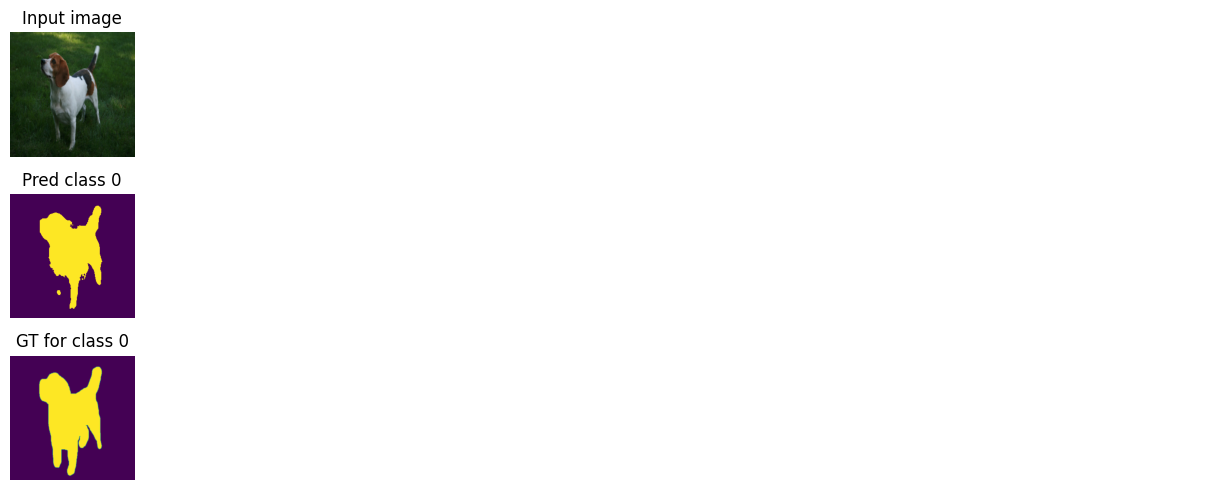

Train loss: 0.02061 | Time: 4m 8s | Val loss: 0.02139
Train_DICE_avg: 0.89048 | Train_Jaccard_avg: 0.80924 | Train_Sensitivity_avg: 0.91951 | Train_Specificity_avg: 0.90718 
Class 0 - Train_DICE: 0.89048 | Train_Jaccard: 0.80924 | Train_Sensitivity: 0.91951 | Train_Specificity: 0.90718 
Val_DICE_avg: 0.87927 | Val_Jaccard_avg: 0.79450 | Val_Sensitivity_avg: 0.94550 | Val_Specificity_avg: 0.88896 
Class 0 - Val_DICE: 0.87927 | Val_Jaccard: 0.79450 | Val_Sensitivity: 0.94550 | Val_Specificity: 0.88896 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01984 | Time: 4m 31s | Val loss: 0.02148
Train_DICE_avg: 0.89370 | Train_Jaccard_avg: 0.81441 | Train_Sensitivity_avg: 0.92434 | Train_Specificity_avg: 0.91015 
Class 0 - Train_DICE: 0.89370 | Train_Jaccard: 0.81441 | Train_Sensitivity: 0.92434 | Train_Specificity: 0.91015 
Val_DICE_avg: 0.88260 | Val_Jaccard_avg: 0.79896 | Val_Sensitivity_avg: 0.94333 | Val_Specificity_avg: 0.89340 
Class 0 - Val_DICE: 0.88260 | Val_Jaccard: 0.79896 | Val_Sensitivity: 0.94333 | Val_Specificity: 0.89340 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01931 | Time: 4m 54s | Val loss: 0.02053
Train_DICE_avg: 0.89837 | Train_Jaccard_avg: 0.82140 | Train_Sensitivity_avg: 0.92654 | Train_Specificity_avg: 0.91268 
Class 0 - Train_DICE: 0.89837 | Train_Jaccard: 0.82140 | Train_Sensitivity: 0.92654 | Train_Specificity: 0.91268 
Val_DICE_avg: 0.89716 | Val_Jaccard_avg: 0.82114 | Val_Sensitivity_avg: 0.91842 | Val_Specificity_avg: 0.92118 
Class 0 - Val_DICE: 0.89716 | Val_Jaccard: 0.82114 | Val_Sensitivity: 0.91842 | Val_Specificity: 0.92118 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01857 | Time: 5m 17s | Val loss: 0.02029
Train_DICE_avg: 0.90044 | Train_Jaccard_avg: 0.82528 | Train_Sensitivity_avg: 0.92774 | Train_Specificity_avg: 0.91609 
Class 0 - Train_DICE: 0.90044 | Train_Jaccard: 0.82528 | Train_Sensitivity: 0.92774 | Train_Specificity: 0.91609 
Val_DICE_avg: 0.88989 | Val_Jaccard_avg: 0.81092 | Val_Sensitivity_avg: 0.94232 | Val_Specificity_avg: 0.90139 
Class 0 - Val_DICE: 0.88989 | Val_Jaccard: 0.81092 | Val_Sensitivity: 0.94232 | Val_Specificity: 0.90139 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01840 | Time: 5m 39s | Val loss: 0.02039
Train_DICE_avg: 0.90322 | Train_Jaccard_avg: 0.82931 | Train_Sensitivity_avg: 0.92958 | Train_Specificity_avg: 0.91667 
Class 0 - Train_DICE: 0.90322 | Train_Jaccard: 0.82931 | Train_Sensitivity: 0.92958 | Train_Specificity: 0.91667 
Val_DICE_avg: 0.89341 | Val_Jaccard_avg: 0.81630 | Val_Sensitivity_avg: 0.92837 | Val_Specificity_avg: 0.91553 
Class 0 - Val_DICE: 0.89341 | Val_Jaccard: 0.81630 | Val_Sensitivity: 0.92837 | Val_Specificity: 0.91553 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

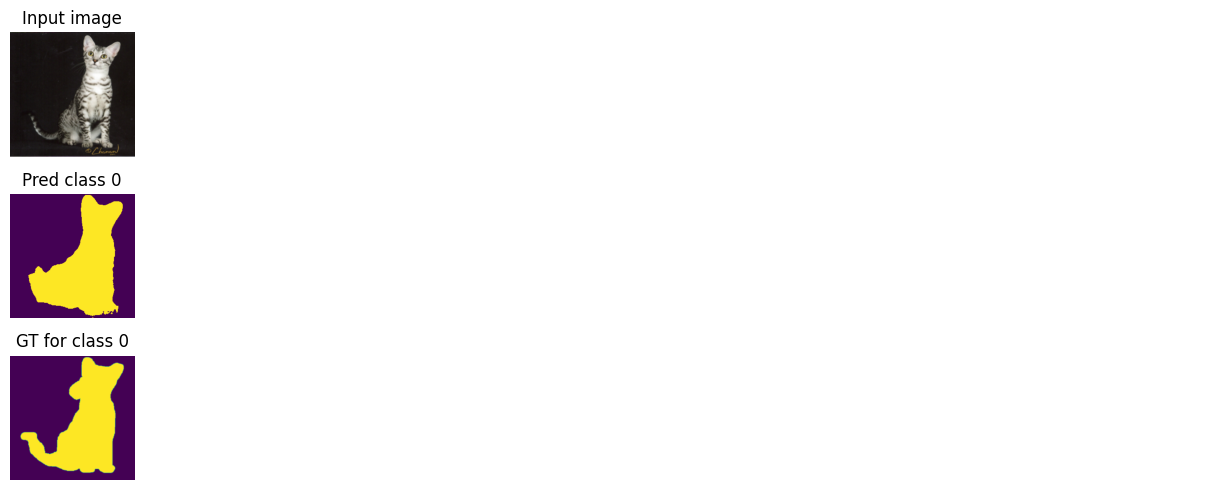

Train loss: 0.01786 | Time: 6m 2s | Val loss: 0.02004
Train_DICE_avg: 0.90505 | Train_Jaccard_avg: 0.83213 | Train_Sensitivity_avg: 0.93151 | Train_Specificity_avg: 0.91817 
Class 0 - Train_DICE: 0.90505 | Train_Jaccard: 0.83213 | Train_Sensitivity: 0.93151 | Train_Specificity: 0.91817 
Val_DICE_avg: 0.89673 | Val_Jaccard_avg: 0.82095 | Val_Sensitivity_avg: 0.93000 | Val_Specificity_avg: 0.91525 
Class 0 - Val_DICE: 0.89673 | Val_Jaccard: 0.82095 | Val_Sensitivity: 0.93000 | Val_Specificity: 0.91525 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01756 | Time: 6m 25s | Val loss: 0.02060
Train_DICE_avg: 0.90626 | Train_Jaccard_avg: 0.83425 | Train_Sensitivity_avg: 0.93224 | Train_Specificity_avg: 0.92061 
Class 0 - Train_DICE: 0.90626 | Train_Jaccard: 0.83425 | Train_Sensitivity: 0.93224 | Train_Specificity: 0.92061 
Val_DICE_avg: 0.88869 | Val_Jaccard_avg: 0.80989 | Val_Sensitivity_avg: 0.94486 | Val_Specificity_avg: 0.90132 
Class 0 - Val_DICE: 0.88869 | Val_Jaccard: 0.80989 | Val_Sensitivity: 0.94486 | Val_Specificity: 0.90132 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01699 | Time: 6m 48s | Val loss: 0.02012
Train_DICE_avg: 0.90984 | Train_Jaccard_avg: 0.84007 | Train_Sensitivity_avg: 0.93354 | Train_Specificity_avg: 0.92439 
Class 0 - Train_DICE: 0.90984 | Train_Jaccard: 0.84007 | Train_Sensitivity: 0.93354 | Train_Specificity: 0.92439 
Val_DICE_avg: 0.89936 | Val_Jaccard_avg: 0.82500 | Val_Sensitivity_avg: 0.92931 | Val_Specificity_avg: 0.91838 
Class 0 - Val_DICE: 0.89936 | Val_Jaccard: 0.82500 | Val_Sensitivity: 0.92931 | Val_Specificity: 0.91838 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01645 | Time: 7m 11s | Val loss: 0.02034
Train_DICE_avg: 0.91192 | Train_Jaccard_avg: 0.84313 | Train_Sensitivity_avg: 0.93655 | Train_Specificity_avg: 0.92369 
Class 0 - Train_DICE: 0.91192 | Train_Jaccard: 0.84313 | Train_Sensitivity: 0.93655 | Train_Specificity: 0.92369 
Val_DICE_avg: 0.89961 | Val_Jaccard_avg: 0.82567 | Val_Sensitivity_avg: 0.92273 | Val_Specificity_avg: 0.92421 
Class 0 - Val_DICE: 0.89961 | Val_Jaccard: 0.82567 | Val_Sensitivity: 0.92273 | Val_Specificity: 0.92421 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01645 | Time: 7m 34s | Val loss: 0.02024
Train_DICE_avg: 0.91219 | Train_Jaccard_avg: 0.84408 | Train_Sensitivity_avg: 0.93604 | Train_Specificity_avg: 0.92509 
Class 0 - Train_DICE: 0.91219 | Train_Jaccard: 0.84408 | Train_Sensitivity: 0.93604 | Train_Specificity: 0.92509 
Val_DICE_avg: 0.90004 | Val_Jaccard_avg: 0.82613 | Val_Sensitivity_avg: 0.91845 | Val_Specificity_avg: 0.92591 
Class 0 - Val_DICE: 0.90004 | Val_Jaccard: 0.82613 | Val_Sensitivity: 0.91845 | Val_Specificity: 0.92591 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

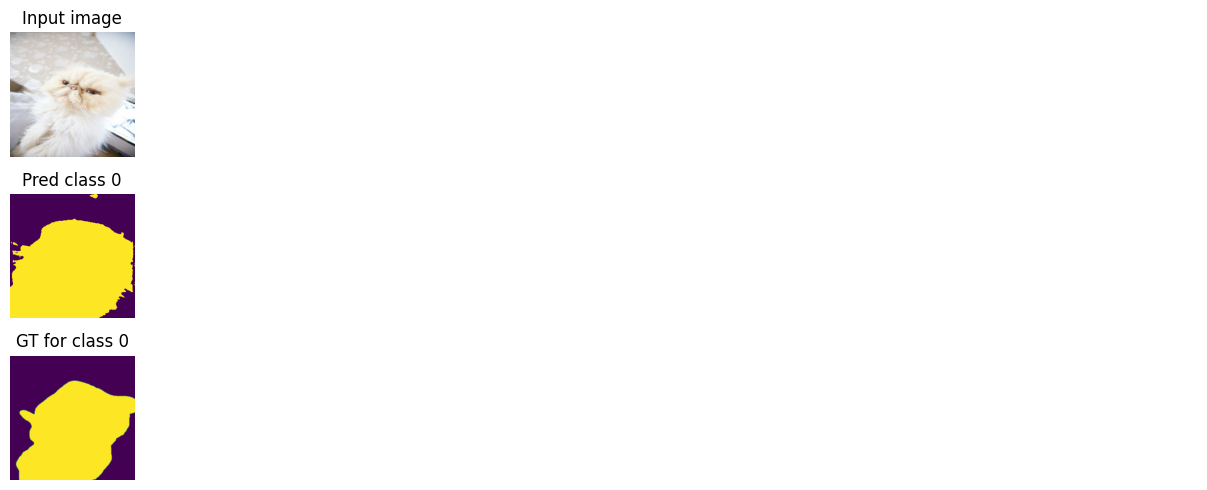

Train loss: 0.01642 | Time: 7m 57s | Val loss: 0.01980
Train_DICE_avg: 0.91315 | Train_Jaccard_avg: 0.84539 | Train_Sensitivity_avg: 0.93684 | Train_Specificity_avg: 0.92617 
Class 0 - Train_DICE: 0.91315 | Train_Jaccard: 0.84539 | Train_Sensitivity: 0.93684 | Train_Specificity: 0.92617 
Val_DICE_avg: 0.90386 | Val_Jaccard_avg: 0.83231 | Val_Sensitivity_avg: 0.92406 | Val_Specificity_avg: 0.92655 
Class 0 - Val_DICE: 0.90386 | Val_Jaccard: 0.83231 | Val_Sensitivity: 0.92406 | Val_Specificity: 0.92655 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01564 | Time: 8m 20s | Val loss: 0.01879
Train_DICE_avg: 0.91700 | Train_Jaccard_avg: 0.85178 | Train_Sensitivity_avg: 0.94077 | Train_Specificity_avg: 0.92881 
Class 0 - Train_DICE: 0.91700 | Train_Jaccard: 0.85178 | Train_Sensitivity: 0.94077 | Train_Specificity: 0.92881 
Val_DICE_avg: 0.90540 | Val_Jaccard_avg: 0.83541 | Val_Sensitivity_avg: 0.93517 | Val_Specificity_avg: 0.92346 
Class 0 - Val_DICE: 0.90540 | Val_Jaccard: 0.83541 | Val_Sensitivity: 0.93517 | Val_Specificity: 0.92346 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01522 | Time: 8m 43s | Val loss: 0.01875
Train_DICE_avg: 0.91971 | Train_Jaccard_avg: 0.85618 | Train_Sensitivity_avg: 0.94210 | Train_Specificity_avg: 0.92958 
Class 0 - Train_DICE: 0.91971 | Train_Jaccard: 0.85618 | Train_Sensitivity: 0.94210 | Train_Specificity: 0.92958 
Val_DICE_avg: 0.90598 | Val_Jaccard_avg: 0.83558 | Val_Sensitivity_avg: 0.93352 | Val_Specificity_avg: 0.92426 
Class 0 - Val_DICE: 0.90598 | Val_Jaccard: 0.83558 | Val_Sensitivity: 0.93352 | Val_Specificity: 0.92426 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01487 | Time: 9m 6s | Val loss: 0.01856
Train_DICE_avg: 0.92140 | Train_Jaccard_avg: 0.85904 | Train_Sensitivity_avg: 0.94376 | Train_Specificity_avg: 0.93165 
Class 0 - Train_DICE: 0.92140 | Train_Jaccard: 0.85904 | Train_Sensitivity: 0.94376 | Train_Specificity: 0.93165 
Val_DICE_avg: 0.90771 | Val_Jaccard_avg: 0.83814 | Val_Sensitivity_avg: 0.93373 | Val_Specificity_avg: 0.92461 
Class 0 - Val_DICE: 0.90771 | Val_Jaccard: 0.83814 | Val_Sensitivity: 0.93373 | Val_Specificity: 0.92461 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01423 | Time: 9m 29s | Val loss: 0.01862
Train_DICE_avg: 0.92383 | Train_Jaccard_avg: 0.86304 | Train_Sensitivity_avg: 0.94575 | Train_Specificity_avg: 0.93355 
Class 0 - Train_DICE: 0.92383 | Train_Jaccard: 0.86304 | Train_Sensitivity: 0.94575 | Train_Specificity: 0.93355 
Val_DICE_avg: 0.91151 | Val_Jaccard_avg: 0.84419 | Val_Sensitivity_avg: 0.93312 | Val_Specificity_avg: 0.92971 
Class 0 - Val_DICE: 0.91151 | Val_Jaccard: 0.84419 | Val_Sensitivity: 0.93312 | Val_Specificity: 0.92971 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

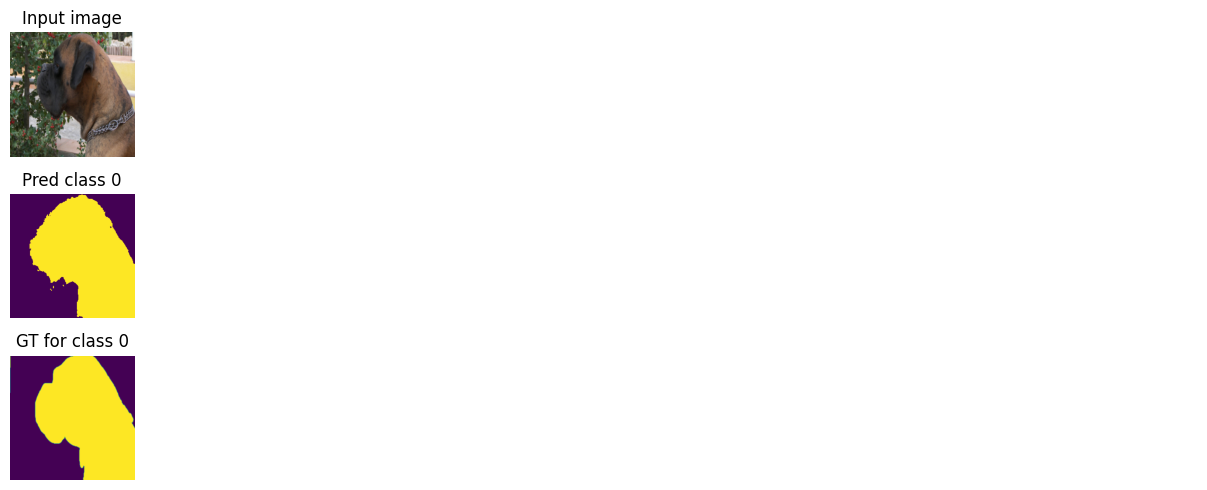

Train loss: 0.01396 | Time: 9m 52s | Val loss: 0.01840
Train_DICE_avg: 0.92597 | Train_Jaccard_avg: 0.86654 | Train_Sensitivity_avg: 0.94596 | Train_Specificity_avg: 0.93581 
Class 0 - Train_DICE: 0.92597 | Train_Jaccard: 0.86654 | Train_Sensitivity: 0.94596 | Train_Specificity: 0.93581 
Val_DICE_avg: 0.90914 | Val_Jaccard_avg: 0.84073 | Val_Sensitivity_avg: 0.94097 | Val_Specificity_avg: 0.92369 
Class 0 - Val_DICE: 0.90914 | Val_Jaccard: 0.84073 | Val_Sensitivity: 0.94097 | Val_Specificity: 0.92369 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01370 | Time: 10m 15s | Val loss: 0.01869
Train_DICE_avg: 0.92693 | Train_Jaccard_avg: 0.86827 | Train_Sensitivity_avg: 0.94730 | Train_Specificity_avg: 0.93630 
Class 0 - Train_DICE: 0.92693 | Train_Jaccard: 0.86827 | Train_Sensitivity: 0.94730 | Train_Specificity: 0.93630 
Val_DICE_avg: 0.91537 | Val_Jaccard_avg: 0.85047 | Val_Sensitivity_avg: 0.92077 | Val_Specificity_avg: 0.94211 
Class 0 - Val_DICE: 0.91537 | Val_Jaccard: 0.85047 | Val_Sensitivity: 0.92077 | Val_Specificity: 0.94211 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01339 | Time: 10m 38s | Val loss: 0.01783
Train_DICE_avg: 0.92869 | Train_Jaccard_avg: 0.87123 | Train_Sensitivity_avg: 0.94966 | Train_Specificity_avg: 0.93684 
Class 0 - Train_DICE: 0.92869 | Train_Jaccard: 0.87123 | Train_Sensitivity: 0.94966 | Train_Specificity: 0.93684 
Val_DICE_avg: 0.91581 | Val_Jaccard_avg: 0.85129 | Val_Sensitivity_avg: 0.93498 | Val_Specificity_avg: 0.93343 
Class 0 - Val_DICE: 0.91581 | Val_Jaccard: 0.85129 | Val_Sensitivity: 0.93498 | Val_Specificity: 0.93343 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01285 | Time: 11m 1s | Val loss: 0.01796
Train_DICE_avg: 0.93124 | Train_Jaccard_avg: 0.87550 | Train_Sensitivity_avg: 0.95050 | Train_Specificity_avg: 0.94047 
Class 0 - Train_DICE: 0.93124 | Train_Jaccard: 0.87550 | Train_Sensitivity: 0.95050 | Train_Specificity: 0.94047 
Val_DICE_avg: 0.91421 | Val_Jaccard_avg: 0.84896 | Val_Sensitivity_avg: 0.94238 | Val_Specificity_avg: 0.92722 
Class 0 - Val_DICE: 0.91421 | Val_Jaccard: 0.84896 | Val_Sensitivity: 0.94238 | Val_Specificity: 0.92722 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01290 | Time: 11m 24s | Val loss: 0.01838
Train_DICE_avg: 0.93011 | Train_Jaccard_avg: 0.87367 | Train_Sensitivity_avg: 0.95075 | Train_Specificity_avg: 0.94050 
Class 0 - Train_DICE: 0.93011 | Train_Jaccard: 0.87367 | Train_Sensitivity: 0.95075 | Train_Specificity: 0.94050 
Val_DICE_avg: 0.91368 | Val_Jaccard_avg: 0.84838 | Val_Sensitivity_avg: 0.94063 | Val_Specificity_avg: 0.92862 
Class 0 - Val_DICE: 0.91368 | Val_Jaccard: 0.84838 | Val_Sensitivity: 0.94063 | Val_Specificity: 0.92862 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

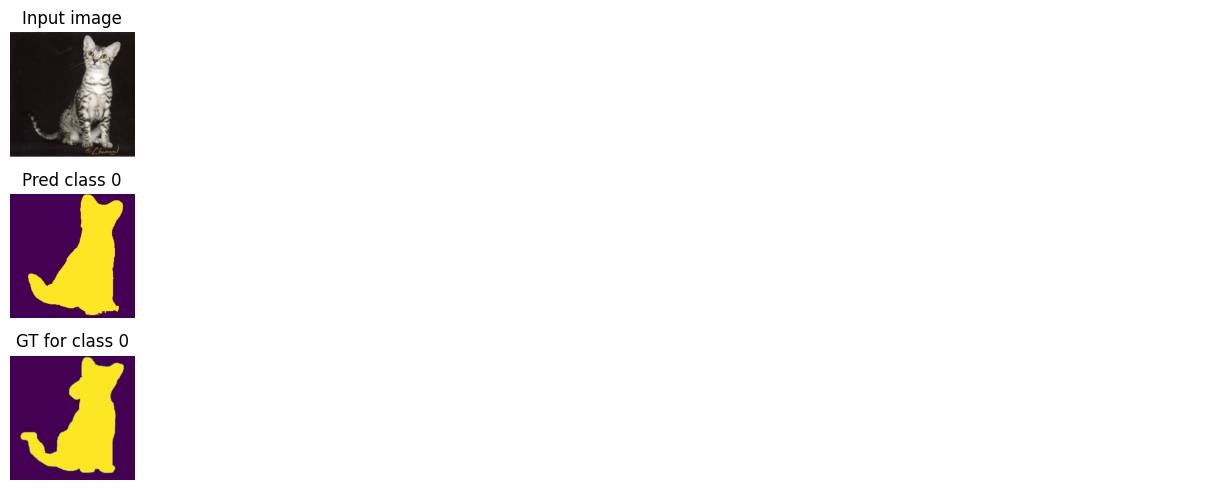

Train loss: 0.01276 | Time: 11m 47s | Val loss: 0.01768
Train_DICE_avg: 0.93151 | Train_Jaccard_avg: 0.87591 | Train_Sensitivity_avg: 0.95059 | Train_Specificity_avg: 0.94006 
Class 0 - Train_DICE: 0.93151 | Train_Jaccard: 0.87591 | Train_Sensitivity: 0.95059 | Train_Specificity: 0.94006 
Val_DICE_avg: 0.91815 | Val_Jaccard_avg: 0.85488 | Val_Sensitivity_avg: 0.93957 | Val_Specificity_avg: 0.93462 
Class 0 - Val_DICE: 0.91815 | Val_Jaccard: 0.85488 | Val_Sensitivity: 0.93957 | Val_Specificity: 0.93462 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01208 | Time: 12m 10s | Val loss: 0.01752
Train_DICE_avg: 0.93414 | Train_Jaccard_avg: 0.88051 | Train_Sensitivity_avg: 0.95346 | Train_Specificity_avg: 0.94291 
Class 0 - Train_DICE: 0.93414 | Train_Jaccard: 0.88051 | Train_Sensitivity: 0.95346 | Train_Specificity: 0.94291 
Val_DICE_avg: 0.91785 | Val_Jaccard_avg: 0.85473 | Val_Sensitivity_avg: 0.94419 | Val_Specificity_avg: 0.93097 
Class 0 - Val_DICE: 0.91785 | Val_Jaccard: 0.85473 | Val_Sensitivity: 0.94419 | Val_Specificity: 0.93097 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01163 | Time: 12m 33s | Val loss: 0.01791
Train_DICE_avg: 0.93671 | Train_Jaccard_avg: 0.88484 | Train_Sensitivity_avg: 0.95507 | Train_Specificity_avg: 0.94488 
Class 0 - Train_DICE: 0.93671 | Train_Jaccard: 0.88484 | Train_Sensitivity: 0.95507 | Train_Specificity: 0.94488 
Val_DICE_avg: 0.91277 | Val_Jaccard_avg: 0.84635 | Val_Sensitivity_avg: 0.95631 | Val_Specificity_avg: 0.91866 
Class 0 - Val_DICE: 0.91277 | Val_Jaccard: 0.84635 | Val_Sensitivity: 0.95631 | Val_Specificity: 0.91866 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01143 | Time: 12m 56s | Val loss: 0.01749
Train_DICE_avg: 0.93762 | Train_Jaccard_avg: 0.88651 | Train_Sensitivity_avg: 0.95548 | Train_Specificity_avg: 0.94518 
Class 0 - Train_DICE: 0.93762 | Train_Jaccard: 0.88651 | Train_Sensitivity: 0.95548 | Train_Specificity: 0.94518 
Val_DICE_avg: 0.91540 | Val_Jaccard_avg: 0.85062 | Val_Sensitivity_avg: 0.95826 | Val_Specificity_avg: 0.92001 
Class 0 - Val_DICE: 0.91540 | Val_Jaccard: 0.85062 | Val_Sensitivity: 0.95826 | Val_Specificity: 0.92001 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01108 | Time: 13m 19s | Val loss: 0.01723
Train_DICE_avg: 0.93957 | Train_Jaccard_avg: 0.88982 | Train_Sensitivity_avg: 0.95712 | Train_Specificity_avg: 0.94816 
Class 0 - Train_DICE: 0.93957 | Train_Jaccard: 0.88982 | Train_Sensitivity: 0.95712 | Train_Specificity: 0.94816 
Val_DICE_avg: 0.92336 | Val_Jaccard_avg: 0.86381 | Val_Sensitivity_avg: 0.94007 | Val_Specificity_avg: 0.93848 
Class 0 - Val_DICE: 0.92336 | Val_Jaccard: 0.86381 | Val_Sensitivity: 0.94007 | Val_Specificity: 0.93848 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

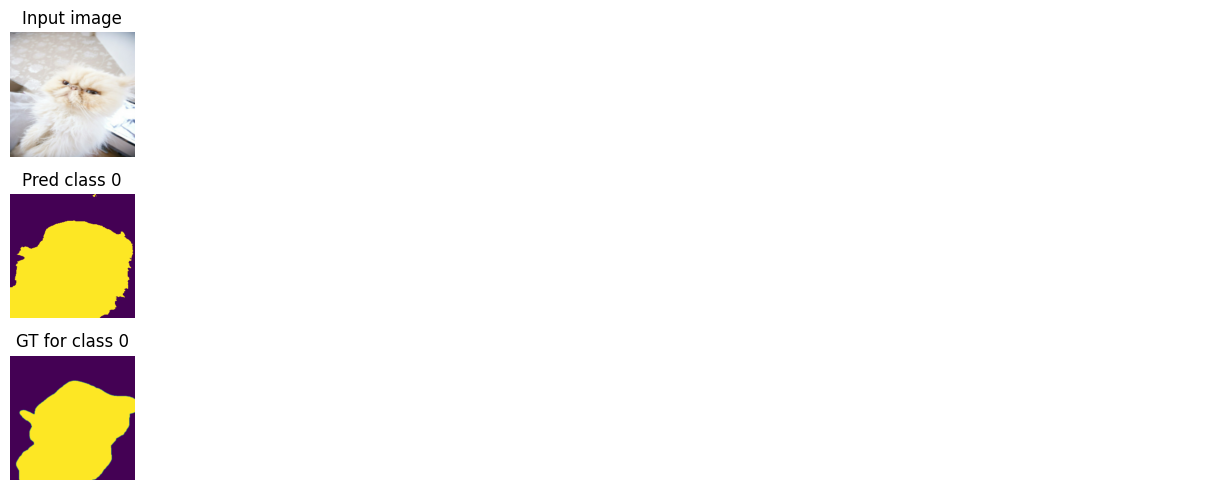

Train loss: 0.01092 | Time: 13m 42s | Val loss: 0.01734
Train_DICE_avg: 0.94016 | Train_Jaccard_avg: 0.89093 | Train_Sensitivity_avg: 0.95740 | Train_Specificity_avg: 0.94749 
Class 0 - Train_DICE: 0.94016 | Train_Jaccard: 0.89093 | Train_Sensitivity: 0.95740 | Train_Specificity: 0.94749 
Val_DICE_avg: 0.91925 | Val_Jaccard_avg: 0.85679 | Val_Sensitivity_avg: 0.95407 | Val_Specificity_avg: 0.92764 
Class 0 - Val_DICE: 0.91925 | Val_Jaccard: 0.85679 | Val_Sensitivity: 0.95407 | Val_Specificity: 0.92764 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01048 | Time: 14m 5s | Val loss: 0.01700
Train_DICE_avg: 0.94228 | Train_Jaccard_avg: 0.89447 | Train_Sensitivity_avg: 0.95897 | Train_Specificity_avg: 0.95013 
Class 0 - Train_DICE: 0.94228 | Train_Jaccard: 0.89447 | Train_Sensitivity: 0.95897 | Train_Specificity: 0.95013 
Val_DICE_avg: 0.92238 | Val_Jaccard_avg: 0.86195 | Val_Sensitivity_avg: 0.94936 | Val_Specificity_avg: 0.93183 
Class 0 - Val_DICE: 0.92238 | Val_Jaccard: 0.86195 | Val_Sensitivity: 0.94936 | Val_Specificity: 0.93183 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01036 | Time: 14m 28s | Val loss: 0.01740
Train_DICE_avg: 0.94296 | Train_Jaccard_avg: 0.89569 | Train_Sensitivity_avg: 0.95933 | Train_Specificity_avg: 0.95073 
Class 0 - Train_DICE: 0.94296 | Train_Jaccard: 0.89569 | Train_Sensitivity: 0.95933 | Train_Specificity: 0.95073 
Val_DICE_avg: 0.92090 | Val_Jaccard_avg: 0.85964 | Val_Sensitivity_avg: 0.95381 | Val_Specificity_avg: 0.92781 
Class 0 - Val_DICE: 0.92090 | Val_Jaccard: 0.85964 | Val_Sensitivity: 0.95381 | Val_Specificity: 0.92781 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01016 | Time: 14m 51s | Val loss: 0.01709
Train_DICE_avg: 0.94411 | Train_Jaccard_avg: 0.89767 | Train_Sensitivity_avg: 0.96026 | Train_Specificity_avg: 0.95163 
Class 0 - Train_DICE: 0.94411 | Train_Jaccard: 0.89767 | Train_Sensitivity: 0.96026 | Train_Specificity: 0.95163 
Val_DICE_avg: 0.92500 | Val_Jaccard_avg: 0.86646 | Val_Sensitivity_avg: 0.94587 | Val_Specificity_avg: 0.93733 
Class 0 - Val_DICE: 0.92500 | Val_Jaccard: 0.86646 | Val_Sensitivity: 0.94587 | Val_Specificity: 0.93733 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01005 | Time: 15m 14s | Val loss: 0.01707
Train_DICE_avg: 0.94410 | Train_Jaccard_avg: 0.89770 | Train_Sensitivity_avg: 0.96078 | Train_Specificity_avg: 0.95091 
Class 0 - Train_DICE: 0.94410 | Train_Jaccard: 0.89770 | Train_Sensitivity: 0.96078 | Train_Specificity: 0.95091 
Val_DICE_avg: 0.92427 | Val_Jaccard_avg: 0.86538 | Val_Sensitivity_avg: 0.94666 | Val_Specificity_avg: 0.93800 
Class 0 - Val_DICE: 0.92427 | Val_Jaccard: 0.86538 | Val_Sensitivity: 0.94666 | Val_Specificity: 0.93800 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

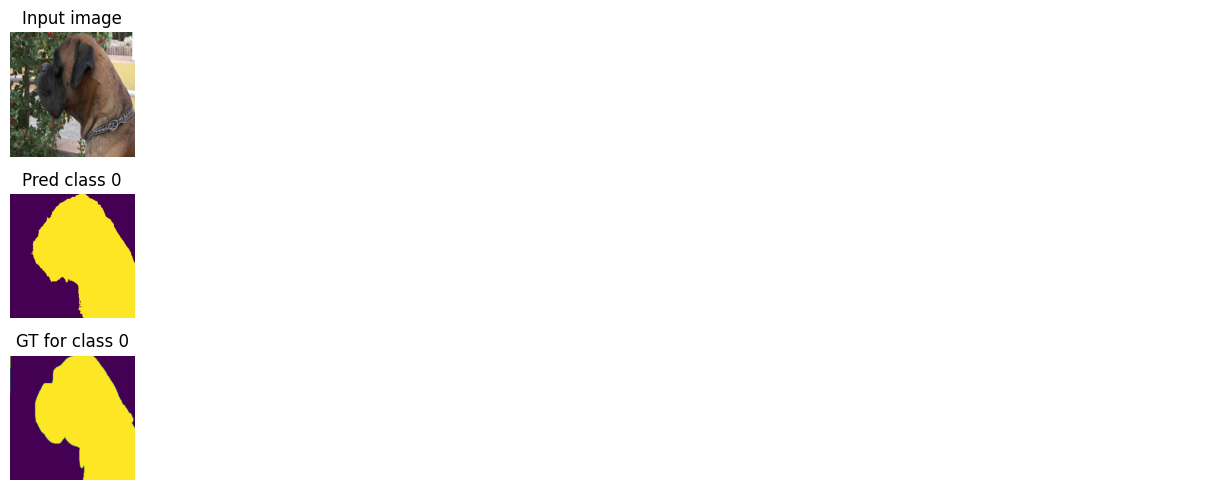

Train loss: 0.00979 | Time: 15m 37s | Val loss: 0.01688
Train_DICE_avg: 0.94533 | Train_Jaccard_avg: 0.89983 | Train_Sensitivity_avg: 0.96160 | Train_Specificity_avg: 0.95207 
Class 0 - Train_DICE: 0.94533 | Train_Jaccard: 0.89983 | Train_Sensitivity: 0.96160 | Train_Specificity: 0.95207 
Val_DICE_avg: 0.92542 | Val_Jaccard_avg: 0.86713 | Val_Sensitivity_avg: 0.94472 | Val_Specificity_avg: 0.93857 
Class 0 - Val_DICE: 0.92542 | Val_Jaccard: 0.86713 | Val_Sensitivity: 0.94472 | Val_Specificity: 0.93857 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00968 | Time: 16m 0s | Val loss: 0.01697
Train_DICE_avg: 0.94608 | Train_Jaccard_avg: 0.90119 | Train_Sensitivity_avg: 0.96201 | Train_Specificity_avg: 0.95236 
Class 0 - Train_DICE: 0.94608 | Train_Jaccard: 0.90119 | Train_Sensitivity: 0.96201 | Train_Specificity: 0.95236 
Val_DICE_avg: 0.92440 | Val_Jaccard_avg: 0.86556 | Val_Sensitivity_avg: 0.94982 | Val_Specificity_avg: 0.93582 
Class 0 - Val_DICE: 0.92440 | Val_Jaccard: 0.86556 | Val_Sensitivity: 0.94982 | Val_Specificity: 0.93582 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00957 | Time: 16m 23s | Val loss: 0.01702
Train_DICE_avg: 0.94664 | Train_Jaccard_avg: 0.90210 | Train_Sensitivity_avg: 0.96280 | Train_Specificity_avg: 0.95338 
Class 0 - Train_DICE: 0.94664 | Train_Jaccard: 0.90210 | Train_Sensitivity: 0.96280 | Train_Specificity: 0.95338 
Val_DICE_avg: 0.92680 | Val_Jaccard_avg: 0.86950 | Val_Sensitivity_avg: 0.94066 | Val_Specificity_avg: 0.94260 
Class 0 - Val_DICE: 0.92680 | Val_Jaccard: 0.86950 | Val_Sensitivity: 0.94066 | Val_Specificity: 0.94260 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00957 | Time: 16m 46s | Val loss: 0.01693
Train_DICE_avg: 0.94683 | Train_Jaccard_avg: 0.90244 | Train_Sensitivity_avg: 0.96256 | Train_Specificity_avg: 0.95428 
Class 0 - Train_DICE: 0.94683 | Train_Jaccard: 0.90244 | Train_Sensitivity: 0.96256 | Train_Specificity: 0.95428 
Val_DICE_avg: 0.92598 | Val_Jaccard_avg: 0.86828 | Val_Sensitivity_avg: 0.94717 | Val_Specificity_avg: 0.93791 
Class 0 - Val_DICE: 0.92598 | Val_Jaccard: 0.86828 | Val_Sensitivity: 0.94717 | Val_Specificity: 0.93791 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00943 | Time: 17m 9s | Val loss: 0.01674
Train_DICE_avg: 0.94680 | Train_Jaccard_avg: 0.90251 | Train_Sensitivity_avg: 0.96260 | Train_Specificity_avg: 0.95415 
Class 0 - Train_DICE: 0.94680 | Train_Jaccard: 0.90251 | Train_Sensitivity: 0.96260 | Train_Specificity: 0.95415 
Val_DICE_avg: 0.92764 | Val_Jaccard_avg: 0.87096 | Val_Sensitivity_avg: 0.94224 | Val_Specificity_avg: 0.94212 
Class 0 - Val_DICE: 0.92764 | Val_Jaccard: 0.87096 | Val_Sensitivity: 0.94224 | Val_Specificity: 0.94212 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

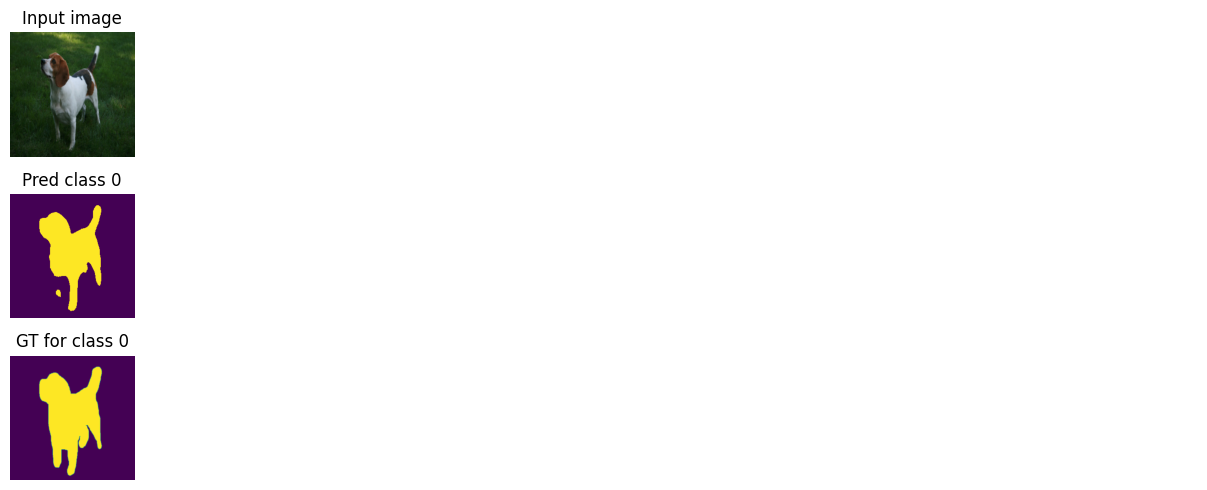

Train loss: 0.00928 | Time: 17m 33s | Val loss: 0.01683
Train_DICE_avg: 0.94795 | Train_Jaccard_avg: 0.90462 | Train_Sensitivity_avg: 0.96394 | Train_Specificity_avg: 0.95479 
Class 0 - Train_DICE: 0.94795 | Train_Jaccard: 0.90462 | Train_Sensitivity: 0.96394 | Train_Specificity: 0.95479 
Val_DICE_avg: 0.92743 | Val_Jaccard_avg: 0.87050 | Val_Sensitivity_avg: 0.94613 | Val_Specificity_avg: 0.93898 
Class 0 - Val_DICE: 0.92743 | Val_Jaccard: 0.87050 | Val_Sensitivity: 0.94613 | Val_Specificity: 0.93898 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00916 | Time: 17m 56s | Val loss: 0.01664
Train_DICE_avg: 0.94946 | Train_Jaccard_avg: 0.90637 | Train_Sensitivity_avg: 0.96516 | Train_Specificity_avg: 0.95469 
Class 0 - Train_DICE: 0.94946 | Train_Jaccard: 0.90637 | Train_Sensitivity: 0.96516 | Train_Specificity: 0.95469 
Val_DICE_avg: 0.92815 | Val_Jaccard_avg: 0.87170 | Val_Sensitivity_avg: 0.94563 | Val_Specificity_avg: 0.94070 
Class 0 - Val_DICE: 0.92815 | Val_Jaccard: 0.87170 | Val_Sensitivity: 0.94563 | Val_Specificity: 0.94070 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00904 | Time: 18m 19s | Val loss: 0.01679
Train_DICE_avg: 0.94891 | Train_Jaccard_avg: 0.90620 | Train_Sensitivity_avg: 0.96440 | Train_Specificity_avg: 0.95560 
Class 0 - Train_DICE: 0.94891 | Train_Jaccard: 0.90620 | Train_Sensitivity: 0.96440 | Train_Specificity: 0.95560 
Val_DICE_avg: 0.92805 | Val_Jaccard_avg: 0.87161 | Val_Sensitivity_avg: 0.94386 | Val_Specificity_avg: 0.94177 
Class 0 - Val_DICE: 0.92805 | Val_Jaccard: 0.87161 | Val_Sensitivity: 0.94386 | Val_Specificity: 0.94177 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00895 | Time: 18m 42s | Val loss: 0.01663
Train_DICE_avg: 0.94918 | Train_Jaccard_avg: 0.90668 | Train_Sensitivity_avg: 0.96474 | Train_Specificity_avg: 0.95544 
Class 0 - Train_DICE: 0.94918 | Train_Jaccard: 0.90668 | Train_Sensitivity: 0.96474 | Train_Specificity: 0.95544 
Val_DICE_avg: 0.92830 | Val_Jaccard_avg: 0.87195 | Val_Sensitivity_avg: 0.94533 | Val_Specificity_avg: 0.94129 
Class 0 - Val_DICE: 0.92830 | Val_Jaccard: 0.87195 | Val_Sensitivity: 0.94533 | Val_Specificity: 0.94129 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00886 | Time: 19m 5s | Val loss: 0.01689
Train_DICE_avg: 0.95099 | Train_Jaccard_avg: 0.90912 | Train_Sensitivity_avg: 0.96517 | Train_Specificity_avg: 0.95642 
Class 0 - Train_DICE: 0.95099 | Train_Jaccard: 0.90912 | Train_Sensitivity: 0.96517 | Train_Specificity: 0.95642 
Val_DICE_avg: 0.92735 | Val_Jaccard_avg: 0.87038 | Val_Sensitivity_avg: 0.94910 | Val_Specificity_avg: 0.93884 
Class 0 - Val_DICE: 0.92735 | Val_Jaccard: 0.87038 | Val_Sensitivity: 0.94910 | Val_Specificity: 0.93884 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

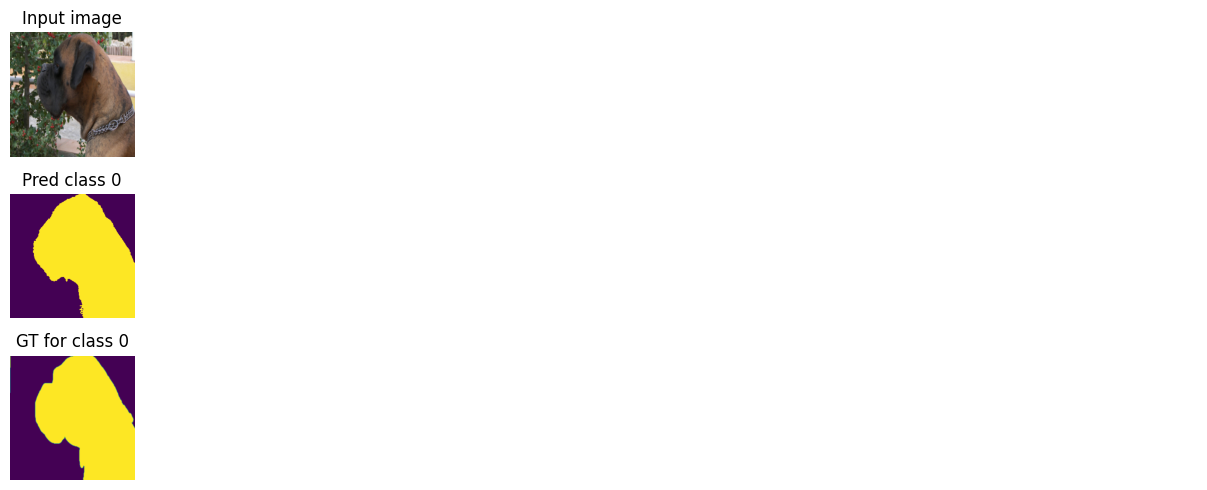

Train loss: 0.00886 | Time: 19m 28s | Val loss: 0.01698
Train_DICE_avg: 0.95071 | Train_Jaccard_avg: 0.90873 | Train_Sensitivity_avg: 0.96607 | Train_Specificity_avg: 0.95690 
Class 0 - Train_DICE: 0.95071 | Train_Jaccard: 0.90873 | Train_Sensitivity: 0.96607 | Train_Specificity: 0.95690 
Val_DICE_avg: 0.92886 | Val_Jaccard_avg: 0.87292 | Val_Sensitivity_avg: 0.94158 | Val_Specificity_avg: 0.94451 
Class 0 - Val_DICE: 0.92886 | Val_Jaccard: 0.87292 | Val_Sensitivity: 0.94158 | Val_Specificity: 0.94451 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00876 | Time: 19m 51s | Val loss: 0.01673
Train_DICE_avg: 0.94971 | Train_Jaccard_avg: 0.90758 | Train_Sensitivity_avg: 0.96568 | Train_Specificity_avg: 0.95553 
Class 0 - Train_DICE: 0.94971 | Train_Jaccard: 0.90758 | Train_Sensitivity: 0.96568 | Train_Specificity: 0.95553 
Val_DICE_avg: 0.92879 | Val_Jaccard_avg: 0.87289 | Val_Sensitivity_avg: 0.94311 | Val_Specificity_avg: 0.94330 
Class 0 - Val_DICE: 0.92879 | Val_Jaccard: 0.87289 | Val_Sensitivity: 0.94311 | Val_Specificity: 0.94330 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00870 | Time: 20m 14s | Val loss: 0.01689
Train_DICE_avg: 0.95038 | Train_Jaccard_avg: 0.90882 | Train_Sensitivity_avg: 0.96583 | Train_Specificity_avg: 0.95653 
Class 0 - Train_DICE: 0.95038 | Train_Jaccard: 0.90882 | Train_Sensitivity: 0.96583 | Train_Specificity: 0.95653 
Val_DICE_avg: 0.92896 | Val_Jaccard_avg: 0.87327 | Val_Sensitivity_avg: 0.94381 | Val_Specificity_avg: 0.94350 
Class 0 - Val_DICE: 0.92896 | Val_Jaccard: 0.87327 | Val_Sensitivity: 0.94381 | Val_Specificity: 0.94350 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00867 | Time: 20m 37s | Val loss: 0.01672
Train_DICE_avg: 0.95067 | Train_Jaccard_avg: 0.90927 | Train_Sensitivity_avg: 0.96531 | Train_Specificity_avg: 0.95645 
Class 0 - Train_DICE: 0.95067 | Train_Jaccard: 0.90927 | Train_Sensitivity: 0.96531 | Train_Specificity: 0.95645 
Val_DICE_avg: 0.92917 | Val_Jaccard_avg: 0.87361 | Val_Sensitivity_avg: 0.94291 | Val_Specificity_avg: 0.94475 
Class 0 - Val_DICE: 0.92917 | Val_Jaccard: 0.87361 | Val_Sensitivity: 0.94291 | Val_Specificity: 0.94475 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00868 | Time: 21m 0s | Val loss: 0.01697
Train_DICE_avg: 0.95167 | Train_Jaccard_avg: 0.91034 | Train_Sensitivity_avg: 0.96638 | Train_Specificity_avg: 0.95736 
Class 0 - Train_DICE: 0.95167 | Train_Jaccard: 0.91034 | Train_Sensitivity: 0.96638 | Train_Specificity: 0.95736 
Val_DICE_avg: 0.92897 | Val_Jaccard_avg: 0.87326 | Val_Sensitivity_avg: 0.94225 | Val_Specificity_avg: 0.94474 
Class 0 - Val_DICE: 0.92897 | Val_Jaccard: 0.87326 | Val_Sensitivity: 0.94225 | Val_Specificity: 0.94474 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

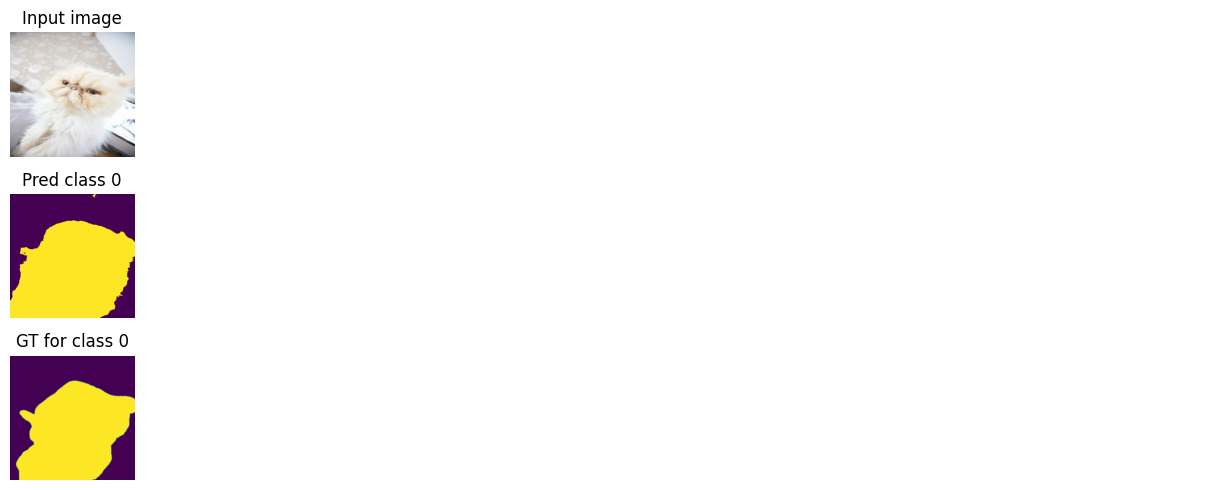

Train loss: 0.00851 | Time: 21m 24s | Val loss: 0.01675
Train_DICE_avg: 0.95202 | Train_Jaccard_avg: 0.91102 | Train_Sensitivity_avg: 0.96692 | Train_Specificity_avg: 0.95746 
Class 0 - Train_DICE: 0.95202 | Train_Jaccard: 0.91102 | Train_Sensitivity: 0.96692 | Train_Specificity: 0.95746 
Val_DICE_avg: 0.92998 | Val_Jaccard_avg: 0.87498 | Val_Sensitivity_avg: 0.94066 | Val_Specificity_avg: 0.94586 
Class 0 - Val_DICE: 0.92998 | Val_Jaccard: 0.87498 | Val_Sensitivity: 0.94066 | Val_Specificity: 0.94586 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00850 | Time: 21m 47s | Val loss: 0.01671
Train_DICE_avg: 0.95230 | Train_Jaccard_avg: 0.91144 | Train_Sensitivity_avg: 0.96700 | Train_Specificity_avg: 0.95754 
Class 0 - Train_DICE: 0.95230 | Train_Jaccard: 0.91144 | Train_Sensitivity: 0.96700 | Train_Specificity: 0.95754 
Val_DICE_avg: 0.92897 | Val_Jaccard_avg: 0.87319 | Val_Sensitivity_avg: 0.94686 | Val_Specificity_avg: 0.94157 
Class 0 - Val_DICE: 0.92897 | Val_Jaccard: 0.87319 | Val_Sensitivity: 0.94686 | Val_Specificity: 0.94157 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00843 | Time: 22m 10s | Val loss: 0.01692
Train_DICE_avg: 0.95164 | Train_Jaccard_avg: 0.91106 | Train_Sensitivity_avg: 0.96679 | Train_Specificity_avg: 0.95770 
Class 0 - Train_DICE: 0.95164 | Train_Jaccard: 0.91106 | Train_Sensitivity: 0.96679 | Train_Specificity: 0.95770 
Val_DICE_avg: 0.92884 | Val_Jaccard_avg: 0.87305 | Val_Sensitivity_avg: 0.94642 | Val_Specificity_avg: 0.94189 
Class 0 - Val_DICE: 0.92884 | Val_Jaccard: 0.87305 | Val_Sensitivity: 0.94642 | Val_Specificity: 0.94189 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00830 | Time: 22m 33s | Val loss: 0.01682
Train_DICE_avg: 0.95299 | Train_Jaccard_avg: 0.91267 | Train_Sensitivity_avg: 0.96768 | Train_Specificity_avg: 0.95831 
Class 0 - Train_DICE: 0.95299 | Train_Jaccard: 0.91267 | Train_Sensitivity: 0.96768 | Train_Specificity: 0.95831 
Val_DICE_avg: 0.92898 | Val_Jaccard_avg: 0.87326 | Val_Sensitivity_avg: 0.94722 | Val_Specificity_avg: 0.94191 
Class 0 - Val_DICE: 0.92898 | Val_Jaccard: 0.87326 | Val_Sensitivity: 0.94722 | Val_Specificity: 0.94191 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00840 | Time: 22m 56s | Val loss: 0.01665
Train_DICE_avg: 0.95272 | Train_Jaccard_avg: 0.91227 | Train_Sensitivity_avg: 0.96780 | Train_Specificity_avg: 0.95749 
Class 0 - Train_DICE: 0.95272 | Train_Jaccard: 0.91227 | Train_Sensitivity: 0.96780 | Train_Specificity: 0.95749 
Val_DICE_avg: 0.92977 | Val_Jaccard_avg: 0.87449 | Val_Sensitivity_avg: 0.94667 | Val_Specificity_avg: 0.94242 
Class 0 - Val_DICE: 0.92977 | Val_Jaccard: 0.87449 | Val_Sensitivity: 0.94667 | Val_Specificity: 0.94242 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

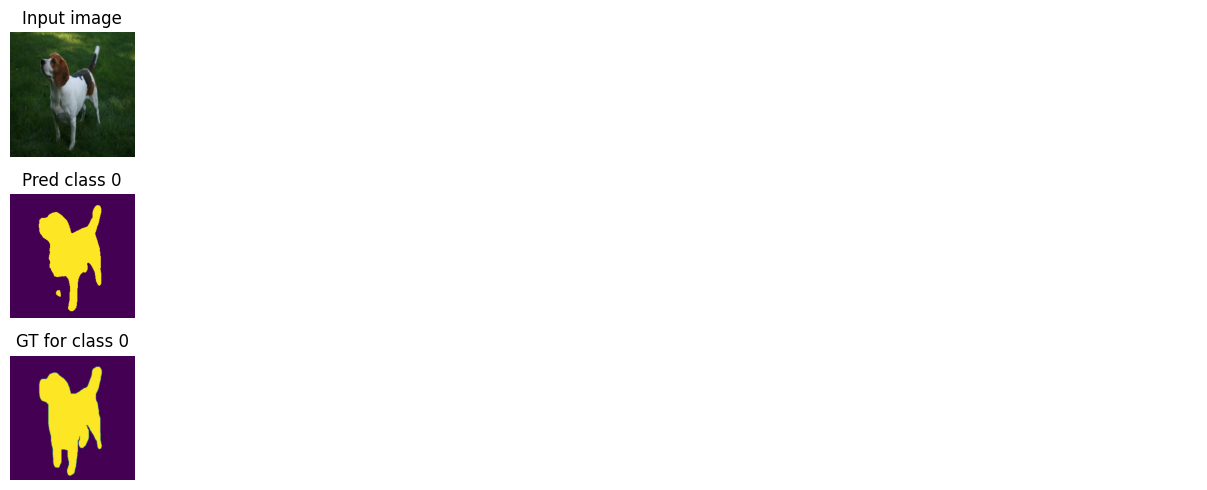

Train loss: 0.00841 | Time: 23m 19s | Val loss: 0.01680
Train_DICE_avg: 0.95186 | Train_Jaccard_avg: 0.91154 | Train_Sensitivity_avg: 0.96558 | Train_Specificity_avg: 0.95828 
Class 0 - Train_DICE: 0.95186 | Train_Jaccard: 0.91154 | Train_Sensitivity: 0.96558 | Train_Specificity: 0.95828 
Val_DICE_avg: 0.92926 | Val_Jaccard_avg: 0.87368 | Val_Sensitivity_avg: 0.94726 | Val_Specificity_avg: 0.94119 
Class 0 - Val_DICE: 0.92926 | Val_Jaccard: 0.87368 | Val_Sensitivity: 0.94726 | Val_Specificity: 0.94119 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]



Global Performance Metrics:
Loss mean: 0.01513, std: 0.00231
Dice Coefficient mean: 0.92600, std: 0.05495
Jaccard Index mean: 0.86650, std: 0.08467
Sensitivity mean: 0.96959, std: 0.03054
Specificity mean: 0.92261, std: 0.06643

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.92600, std: 0.05495
Jaccard mean: 0.86650, std: 0.08467
Sensitivity mean: 0.96959, std: 0.03054
Specificity mean: 0.92261, std: 0.06643


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-DeepLabV3+-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.76 GB
GPU Memory - Reserved: 1.46 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

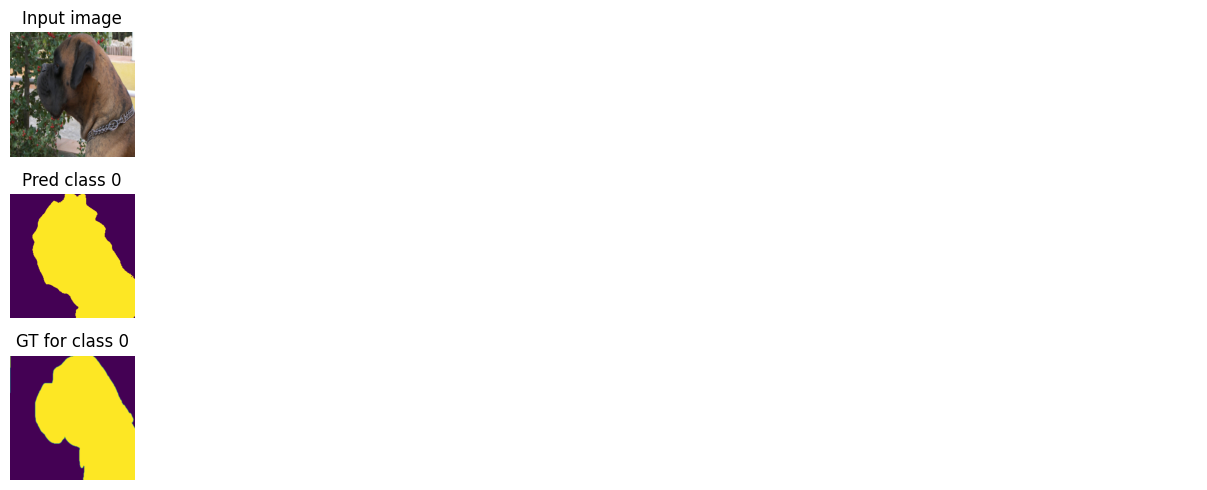

Train loss: 0.41485 | Time: 0m 22s | Val loss: 0.38855
Train_DICE_avg: 0.71385 | Train_Jaccard_avg: 0.57202 | Train_Sensitivity_avg: 0.67277 | Train_Specificity_avg: 0.83164 
Class 0 - Train_DICE: 0.71385 | Train_Jaccard: 0.57202 | Train_Sensitivity: 0.67277 | Train_Specificity: 0.83164 
Val_DICE_avg: 0.77084 | Val_Jaccard_avg: 0.63934 | Val_Sensitivity_avg: 0.74062 | Val_Specificity_avg: 0.86270 
Class 0 - Val_DICE: 0.77084 | Val_Jaccard: 0.63934 | Val_Sensitivity: 0.74062 | Val_Specificity: 0.86270 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.27322 | Time: 0m 45s | Val loss: 0.23808
Train_DICE_avg: 0.80717 | Train_Jaccard_avg: 0.68838 | Train_Sensitivity_avg: 0.78828 | Train_Specificity_avg: 0.87931 
Class 0 - Train_DICE: 0.80717 | Train_Jaccard: 0.68838 | Train_Sensitivity: 0.78828 | Train_Specificity: 0.87931 
Val_DICE_avg: 0.84160 | Val_Jaccard_avg: 0.73668 | Val_Sensitivity_avg: 0.82981 | Val_Specificity_avg: 0.89992 
Class 0 - Val_DICE: 0.84160 | Val_Jaccard: 0.73668 | Val_Sensitivity: 0.82981 | Val_Specificity: 0.89992 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.21531 | Time: 1m 7s | Val loss: 0.20605
Train_DICE_avg: 0.83813 | Train_Jaccard_avg: 0.73036 | Train_Sensitivity_avg: 0.84314 | Train_Specificity_avg: 0.88565 
Class 0 - Train_DICE: 0.83813 | Train_Jaccard: 0.73036 | Train_Sensitivity: 0.84314 | Train_Specificity: 0.88565 
Val_DICE_avg: 0.85704 | Val_Jaccard_avg: 0.75873 | Val_Sensitivity_avg: 0.83723 | Val_Specificity_avg: 0.91737 
Class 0 - Val_DICE: 0.85704 | Val_Jaccard: 0.75873 | Val_Sensitivity: 0.83723 | Val_Specificity: 0.91737 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18662 | Time: 1m 30s | Val loss: 0.17997
Train_DICE_avg: 0.84942 | Train_Jaccard_avg: 0.74638 | Train_Sensitivity_avg: 0.86787 | Train_Specificity_avg: 0.88652 
Class 0 - Train_DICE: 0.84942 | Train_Jaccard: 0.74638 | Train_Sensitivity: 0.86787 | Train_Specificity: 0.88652 
Val_DICE_avg: 0.86473 | Val_Jaccard_avg: 0.76967 | Val_Sensitivity_avg: 0.86250 | Val_Specificity_avg: 0.91050 
Class 0 - Val_DICE: 0.86473 | Val_Jaccard: 0.76967 | Val_Sensitivity: 0.86250 | Val_Specificity: 0.91050 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16775 | Time: 1m 52s | Val loss: 0.16539
Train_DICE_avg: 0.85814 | Train_Jaccard_avg: 0.75858 | Train_Sensitivity_avg: 0.88276 | Train_Specificity_avg: 0.88925 
Class 0 - Train_DICE: 0.85814 | Train_Jaccard: 0.75858 | Train_Sensitivity: 0.88276 | Train_Specificity: 0.88925 
Val_DICE_avg: 0.86794 | Val_Jaccard_avg: 0.77525 | Val_Sensitivity_avg: 0.87802 | Val_Specificity_avg: 0.90746 
Class 0 - Val_DICE: 0.86794 | Val_Jaccard: 0.77525 | Val_Sensitivity: 0.87802 | Val_Specificity: 0.90746 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

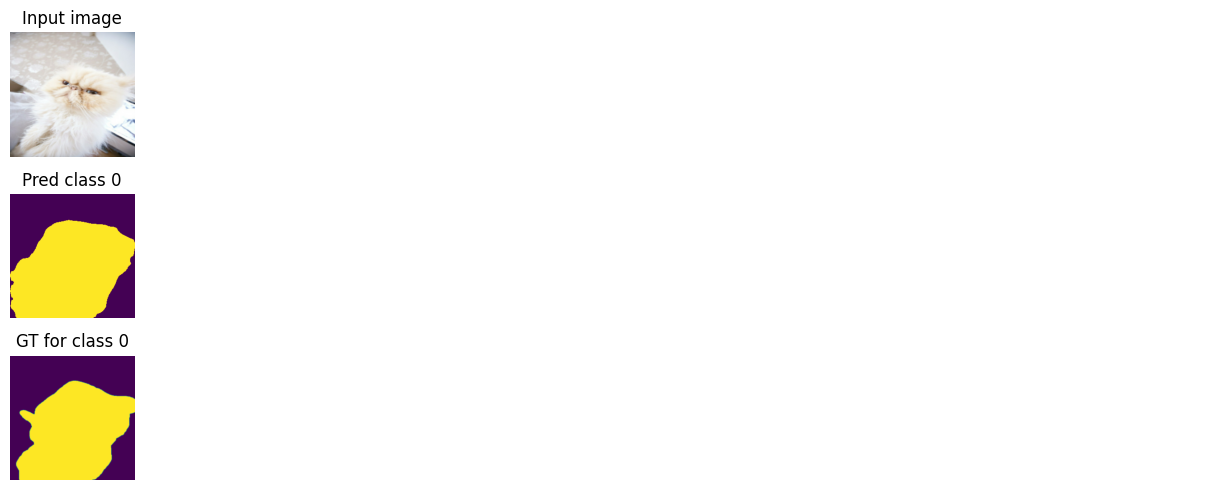

Train loss: 0.15862 | Time: 2m 15s | Val loss: 0.15401
Train_DICE_avg: 0.86034 | Train_Jaccard_avg: 0.76307 | Train_Sensitivity_avg: 0.88869 | Train_Specificity_avg: 0.88976 
Class 0 - Train_DICE: 0.86034 | Train_Jaccard: 0.76307 | Train_Sensitivity: 0.88869 | Train_Specificity: 0.88976 
Val_DICE_avg: 0.87172 | Val_Jaccard_avg: 0.78104 | Val_Sensitivity_avg: 0.88163 | Val_Specificity_avg: 0.90959 
Class 0 - Val_DICE: 0.87172 | Val_Jaccard: 0.78104 | Val_Sensitivity: 0.88163 | Val_Specificity: 0.90959 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14670 | Time: 2m 38s | Val loss: 0.14119
Train_DICE_avg: 0.86774 | Train_Jaccard_avg: 0.77344 | Train_Sensitivity_avg: 0.89693 | Train_Specificity_avg: 0.89233 
Class 0 - Train_DICE: 0.86774 | Train_Jaccard: 0.77344 | Train_Sensitivity: 0.89693 | Train_Specificity: 0.89233 
Val_DICE_avg: 0.87504 | Val_Jaccard_avg: 0.78657 | Val_Sensitivity_avg: 0.90512 | Val_Specificity_avg: 0.90370 
Class 0 - Val_DICE: 0.87504 | Val_Jaccard: 0.78657 | Val_Sensitivity: 0.90512 | Val_Specificity: 0.90370 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13916 | Time: 3m 0s | Val loss: 0.13821
Train_DICE_avg: 0.87177 | Train_Jaccard_avg: 0.77969 | Train_Sensitivity_avg: 0.90270 | Train_Specificity_avg: 0.89377 
Class 0 - Train_DICE: 0.87177 | Train_Jaccard: 0.77969 | Train_Sensitivity: 0.90270 | Train_Specificity: 0.89377 
Val_DICE_avg: 0.88019 | Val_Jaccard_avg: 0.79340 | Val_Sensitivity_avg: 0.89017 | Val_Specificity_avg: 0.91315 
Class 0 - Val_DICE: 0.88019 | Val_Jaccard: 0.79340 | Val_Sensitivity: 0.89017 | Val_Specificity: 0.91315 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13280 | Time: 3m 23s | Val loss: 0.13304
Train_DICE_avg: 0.87531 | Train_Jaccard_avg: 0.78515 | Train_Sensitivity_avg: 0.90812 | Train_Specificity_avg: 0.89628 
Class 0 - Train_DICE: 0.87531 | Train_Jaccard: 0.78515 | Train_Sensitivity: 0.90812 | Train_Specificity: 0.89628 
Val_DICE_avg: 0.88423 | Val_Jaccard_avg: 0.80008 | Val_Sensitivity_avg: 0.89273 | Val_Specificity_avg: 0.91761 
Class 0 - Val_DICE: 0.88423 | Val_Jaccard: 0.80008 | Val_Sensitivity: 0.89273 | Val_Specificity: 0.91761 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12824 | Time: 3m 45s | Val loss: 0.12742
Train_DICE_avg: 0.87769 | Train_Jaccard_avg: 0.78915 | Train_Sensitivity_avg: 0.91072 | Train_Specificity_avg: 0.89566 
Class 0 - Train_DICE: 0.87769 | Train_Jaccard: 0.78915 | Train_Sensitivity: 0.91072 | Train_Specificity: 0.89566 
Val_DICE_avg: 0.88598 | Val_Jaccard_avg: 0.80302 | Val_Sensitivity_avg: 0.89822 | Val_Specificity_avg: 0.91711 
Class 0 - Val_DICE: 0.88598 | Val_Jaccard: 0.80302 | Val_Sensitivity: 0.89822 | Val_Specificity: 0.91711 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

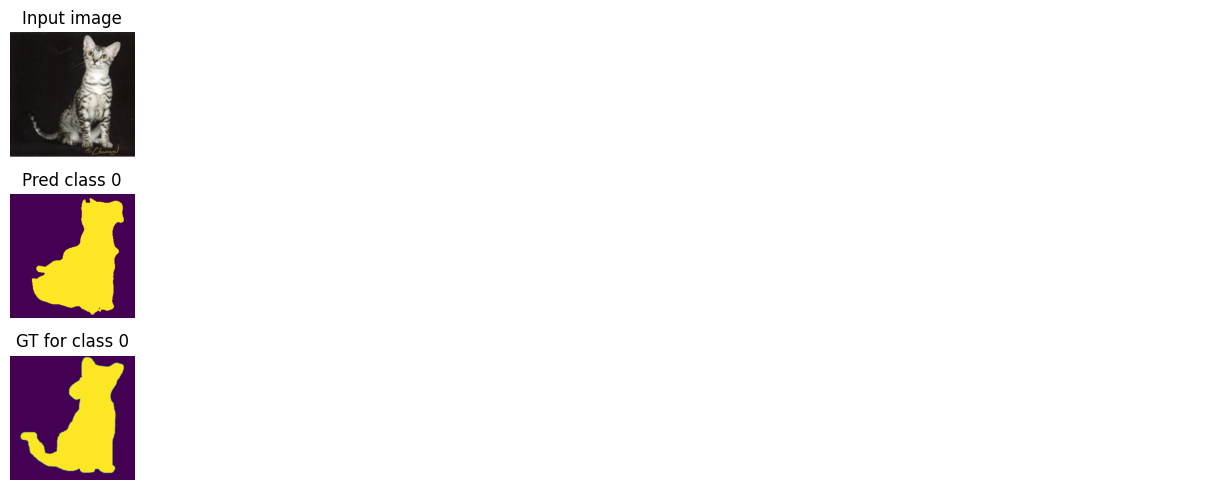

Train loss: 0.12297 | Time: 4m 9s | Val loss: 0.11980
Train_DICE_avg: 0.88023 | Train_Jaccard_avg: 0.79279 | Train_Sensitivity_avg: 0.91391 | Train_Specificity_avg: 0.89880 
Class 0 - Train_DICE: 0.88023 | Train_Jaccard: 0.79279 | Train_Sensitivity: 0.91391 | Train_Specificity: 0.89880 
Val_DICE_avg: 0.89035 | Val_Jaccard_avg: 0.80952 | Val_Sensitivity_avg: 0.90558 | Val_Specificity_avg: 0.91698 
Class 0 - Val_DICE: 0.89035 | Val_Jaccard: 0.80952 | Val_Sensitivity: 0.90558 | Val_Specificity: 0.91698 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11454 | Time: 4m 32s | Val loss: 0.11528
Train_DICE_avg: 0.88548 | Train_Jaccard_avg: 0.80077 | Train_Sensitivity_avg: 0.92068 | Train_Specificity_avg: 0.89937 
Class 0 - Train_DICE: 0.88548 | Train_Jaccard: 0.80077 | Train_Sensitivity: 0.92068 | Train_Specificity: 0.89937 
Val_DICE_avg: 0.88648 | Val_Jaccard_avg: 0.80350 | Val_Sensitivity_avg: 0.91670 | Val_Specificity_avg: 0.90872 
Class 0 - Val_DICE: 0.88648 | Val_Jaccard: 0.80350 | Val_Sensitivity: 0.91670 | Val_Specificity: 0.90872 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11049 | Time: 4m 55s | Val loss: 0.11779
Train_DICE_avg: 0.88680 | Train_Jaccard_avg: 0.80330 | Train_Sensitivity_avg: 0.92507 | Train_Specificity_avg: 0.89943 
Class 0 - Train_DICE: 0.88680 | Train_Jaccard: 0.80330 | Train_Sensitivity: 0.92507 | Train_Specificity: 0.89943 
Val_DICE_avg: 0.89205 | Val_Jaccard_avg: 0.81236 | Val_Sensitivity_avg: 0.89574 | Val_Specificity_avg: 0.92670 
Class 0 - Val_DICE: 0.89205 | Val_Jaccard: 0.81236 | Val_Sensitivity: 0.89574 | Val_Specificity: 0.92670 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10575 | Time: 5m 17s | Val loss: 0.10867
Train_DICE_avg: 0.89017 | Train_Jaccard_avg: 0.80805 | Train_Sensitivity_avg: 0.92765 | Train_Specificity_avg: 0.89937 
Class 0 - Train_DICE: 0.89017 | Train_Jaccard: 0.80805 | Train_Sensitivity: 0.92765 | Train_Specificity: 0.89937 
Val_DICE_avg: 0.88621 | Val_Jaccard_avg: 0.80378 | Val_Sensitivity_avg: 0.92775 | Val_Specificity_avg: 0.90535 
Class 0 - Val_DICE: 0.88621 | Val_Jaccard: 0.80378 | Val_Sensitivity: 0.92775 | Val_Specificity: 0.90535 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10092 | Time: 5m 40s | Val loss: 0.10565
Train_DICE_avg: 0.89379 | Train_Jaccard_avg: 0.81383 | Train_Sensitivity_avg: 0.93153 | Train_Specificity_avg: 0.90254 
Class 0 - Train_DICE: 0.89379 | Train_Jaccard: 0.81383 | Train_Sensitivity: 0.93153 | Train_Specificity: 0.90254 
Val_DICE_avg: 0.88873 | Val_Jaccard_avg: 0.80730 | Val_Sensitivity_avg: 0.92753 | Val_Specificity_avg: 0.90707 
Class 0 - Val_DICE: 0.88873 | Val_Jaccard: 0.80730 | Val_Sensitivity: 0.92753 | Val_Specificity: 0.90707 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

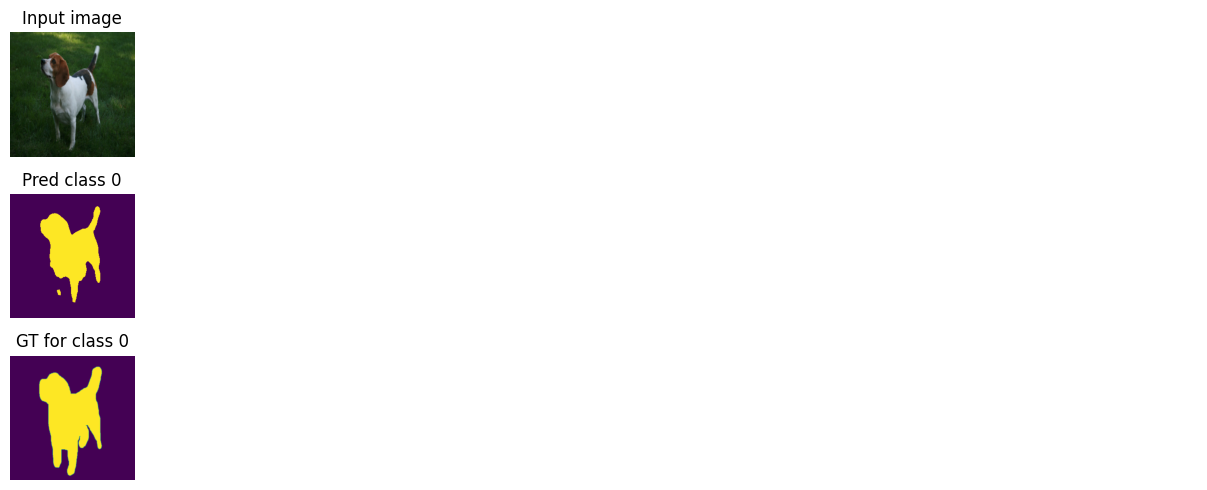

Train loss: 0.09840 | Time: 6m 4s | Val loss: 0.10482
Train_DICE_avg: 0.89501 | Train_Jaccard_avg: 0.81557 | Train_Sensitivity_avg: 0.93419 | Train_Specificity_avg: 0.90219 
Class 0 - Train_DICE: 0.89501 | Train_Jaccard: 0.81557 | Train_Sensitivity: 0.93419 | Train_Specificity: 0.90219 
Val_DICE_avg: 0.89515 | Val_Jaccard_avg: 0.81763 | Val_Sensitivity_avg: 0.91824 | Val_Specificity_avg: 0.91982 
Class 0 - Val_DICE: 0.89515 | Val_Jaccard: 0.81763 | Val_Sensitivity: 0.91824 | Val_Specificity: 0.91982 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09604 | Time: 6m 27s | Val loss: 0.10543
Train_DICE_avg: 0.89681 | Train_Jaccard_avg: 0.81867 | Train_Sensitivity_avg: 0.93604 | Train_Specificity_avg: 0.90236 
Class 0 - Train_DICE: 0.89681 | Train_Jaccard: 0.81867 | Train_Sensitivity: 0.93604 | Train_Specificity: 0.90236 
Val_DICE_avg: 0.89701 | Val_Jaccard_avg: 0.82069 | Val_Sensitivity_avg: 0.91033 | Val_Specificity_avg: 0.92652 
Class 0 - Val_DICE: 0.89701 | Val_Jaccard: 0.82069 | Val_Sensitivity: 0.91033 | Val_Specificity: 0.92652 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09321 | Time: 6m 50s | Val loss: 0.10137
Train_DICE_avg: 0.89907 | Train_Jaccard_avg: 0.82209 | Train_Sensitivity_avg: 0.93787 | Train_Specificity_avg: 0.90438 
Class 0 - Train_DICE: 0.89907 | Train_Jaccard: 0.82209 | Train_Sensitivity: 0.93787 | Train_Specificity: 0.90438 
Val_DICE_avg: 0.88766 | Val_Jaccard_avg: 0.80571 | Val_Sensitivity_avg: 0.93488 | Val_Specificity_avg: 0.90062 
Class 0 - Val_DICE: 0.88766 | Val_Jaccard: 0.80571 | Val_Sensitivity: 0.93488 | Val_Specificity: 0.90062 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08987 | Time: 7m 13s | Val loss: 0.09915
Train_DICE_avg: 0.90214 | Train_Jaccard_avg: 0.82701 | Train_Sensitivity_avg: 0.94005 | Train_Specificity_avg: 0.90827 
Class 0 - Train_DICE: 0.90214 | Train_Jaccard: 0.82701 | Train_Sensitivity: 0.94005 | Train_Specificity: 0.90827 
Val_DICE_avg: 0.89896 | Val_Jaccard_avg: 0.82349 | Val_Sensitivity_avg: 0.92153 | Val_Specificity_avg: 0.92036 
Class 0 - Val_DICE: 0.89896 | Val_Jaccard: 0.82349 | Val_Sensitivity: 0.92153 | Val_Specificity: 0.92036 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08802 | Time: 7m 35s | Val loss: 0.09565
Train_DICE_avg: 0.90340 | Train_Jaccard_avg: 0.82929 | Train_Sensitivity_avg: 0.94206 | Train_Specificity_avg: 0.90750 
Class 0 - Train_DICE: 0.90340 | Train_Jaccard: 0.82929 | Train_Sensitivity: 0.94206 | Train_Specificity: 0.90750 
Val_DICE_avg: 0.89741 | Val_Jaccard_avg: 0.82157 | Val_Sensitivity_avg: 0.93203 | Val_Specificity_avg: 0.91467 
Class 0 - Val_DICE: 0.89741 | Val_Jaccard: 0.82157 | Val_Sensitivity: 0.93203 | Val_Specificity: 0.91467 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

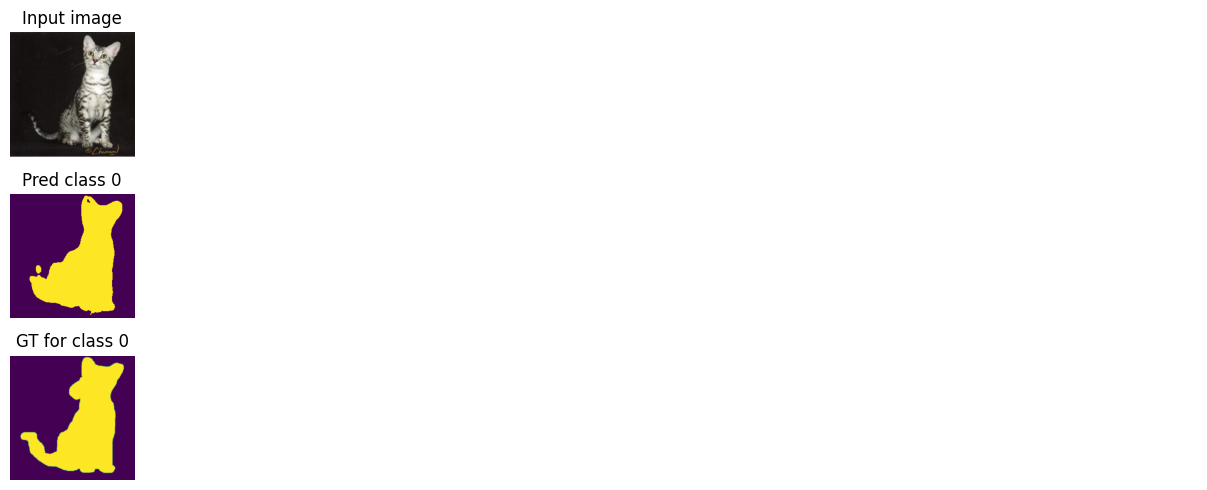

Train loss: 0.08749 | Time: 7m 58s | Val loss: 0.09253
Train_DICE_avg: 0.90370 | Train_Jaccard_avg: 0.82971 | Train_Sensitivity_avg: 0.94163 | Train_Specificity_avg: 0.90756 
Class 0 - Train_DICE: 0.90370 | Train_Jaccard: 0.82971 | Train_Sensitivity: 0.94163 | Train_Specificity: 0.90756 
Val_DICE_avg: 0.89728 | Val_Jaccard_avg: 0.82110 | Val_Sensitivity_avg: 0.93800 | Val_Specificity_avg: 0.91158 
Class 0 - Val_DICE: 0.89728 | Val_Jaccard: 0.82110 | Val_Sensitivity: 0.93800 | Val_Specificity: 0.91158 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08302 | Time: 8m 22s | Val loss: 0.09226
Train_DICE_avg: 0.90712 | Train_Jaccard_avg: 0.83520 | Train_Sensitivity_avg: 0.94564 | Train_Specificity_avg: 0.90982 
Class 0 - Train_DICE: 0.90712 | Train_Jaccard: 0.83520 | Train_Sensitivity: 0.94564 | Train_Specificity: 0.90982 
Val_DICE_avg: 0.90634 | Val_Jaccard_avg: 0.83506 | Val_Sensitivity_avg: 0.92331 | Val_Specificity_avg: 0.92730 
Class 0 - Val_DICE: 0.90634 | Val_Jaccard: 0.83506 | Val_Sensitivity: 0.92331 | Val_Specificity: 0.92730 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08019 | Time: 8m 44s | Val loss: 0.08961
Train_DICE_avg: 0.90975 | Train_Jaccard_avg: 0.83928 | Train_Sensitivity_avg: 0.94779 | Train_Specificity_avg: 0.91021 
Class 0 - Train_DICE: 0.90975 | Train_Jaccard: 0.83928 | Train_Sensitivity: 0.94779 | Train_Specificity: 0.91021 
Val_DICE_avg: 0.90316 | Val_Jaccard_avg: 0.83027 | Val_Sensitivity_avg: 0.93382 | Val_Specificity_avg: 0.91964 
Class 0 - Val_DICE: 0.90316 | Val_Jaccard: 0.83027 | Val_Sensitivity: 0.93382 | Val_Specificity: 0.91964 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07650 | Time: 9m 7s | Val loss: 0.08681
Train_DICE_avg: 0.91291 | Train_Jaccard_avg: 0.84455 | Train_Sensitivity_avg: 0.95111 | Train_Specificity_avg: 0.91323 
Class 0 - Train_DICE: 0.91291 | Train_Jaccard: 0.84455 | Train_Sensitivity: 0.95111 | Train_Specificity: 0.91323 
Val_DICE_avg: 0.90250 | Val_Jaccard_avg: 0.82934 | Val_Sensitivity_avg: 0.94042 | Val_Specificity_avg: 0.91505 
Class 0 - Val_DICE: 0.90250 | Val_Jaccard: 0.82934 | Val_Sensitivity: 0.94042 | Val_Specificity: 0.91505 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07476 | Time: 9m 30s | Val loss: 0.08602
Train_DICE_avg: 0.91450 | Train_Jaccard_avg: 0.84724 | Train_Sensitivity_avg: 0.95255 | Train_Specificity_avg: 0.91488 
Class 0 - Train_DICE: 0.91450 | Train_Jaccard: 0.84724 | Train_Sensitivity: 0.95255 | Train_Specificity: 0.91488 
Val_DICE_avg: 0.91059 | Val_Jaccard_avg: 0.84201 | Val_Sensitivity_avg: 0.92960 | Val_Specificity_avg: 0.92874 
Class 0 - Val_DICE: 0.91059 | Val_Jaccard: 0.84201 | Val_Sensitivity: 0.92960 | Val_Specificity: 0.92874 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

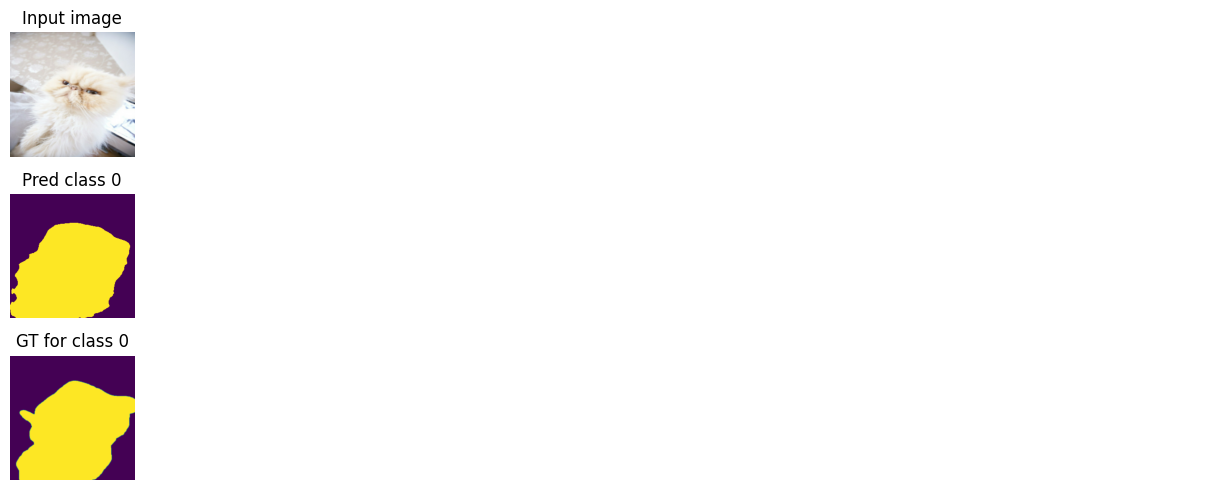

Train loss: 0.07165 | Time: 9m 54s | Val loss: 0.08094
Train_DICE_avg: 0.91706 | Train_Jaccard_avg: 0.85139 | Train_Sensitivity_avg: 0.95541 | Train_Specificity_avg: 0.91615 
Class 0 - Train_DICE: 0.91706 | Train_Jaccard: 0.85139 | Train_Sensitivity: 0.95541 | Train_Specificity: 0.91615 
Val_DICE_avg: 0.90511 | Val_Jaccard_avg: 0.83375 | Val_Sensitivity_avg: 0.95116 | Val_Specificity_avg: 0.91210 
Class 0 - Val_DICE: 0.90511 | Val_Jaccard: 0.83375 | Val_Sensitivity: 0.95116 | Val_Specificity: 0.91210 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07039 | Time: 10m 17s | Val loss: 0.08046
Train_DICE_avg: 0.91916 | Train_Jaccard_avg: 0.85493 | Train_Sensitivity_avg: 0.95480 | Train_Specificity_avg: 0.91994 
Class 0 - Train_DICE: 0.91916 | Train_Jaccard: 0.85493 | Train_Sensitivity: 0.95480 | Train_Specificity: 0.91994 
Val_DICE_avg: 0.90689 | Val_Jaccard_avg: 0.83656 | Val_Sensitivity_avg: 0.94880 | Val_Specificity_avg: 0.91580 
Class 0 - Val_DICE: 0.90689 | Val_Jaccard: 0.83656 | Val_Sensitivity: 0.94880 | Val_Specificity: 0.91580 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06791 | Time: 10m 39s | Val loss: 0.08114
Train_DICE_avg: 0.92130 | Train_Jaccard_avg: 0.85849 | Train_Sensitivity_avg: 0.95752 | Train_Specificity_avg: 0.92010 
Class 0 - Train_DICE: 0.92130 | Train_Jaccard: 0.85849 | Train_Sensitivity: 0.95752 | Train_Specificity: 0.92010 
Val_DICE_avg: 0.90315 | Val_Jaccard_avg: 0.83175 | Val_Sensitivity_avg: 0.95315 | Val_Specificity_avg: 0.91177 
Class 0 - Val_DICE: 0.90315 | Val_Jaccard: 0.83175 | Val_Sensitivity: 0.95315 | Val_Specificity: 0.91177 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06745 | Time: 11m 3s | Val loss: 0.08657
Train_DICE_avg: 0.92187 | Train_Jaccard_avg: 0.85949 | Train_Sensitivity_avg: 0.95714 | Train_Specificity_avg: 0.92110 
Class 0 - Train_DICE: 0.92187 | Train_Jaccard: 0.85949 | Train_Sensitivity: 0.95714 | Train_Specificity: 0.92110 
Val_DICE_avg: 0.91375 | Val_Jaccard_avg: 0.84781 | Val_Sensitivity_avg: 0.92221 | Val_Specificity_avg: 0.93847 
Class 0 - Val_DICE: 0.91375 | Val_Jaccard: 0.84781 | Val_Sensitivity: 0.92221 | Val_Specificity: 0.93847 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06551 | Time: 11m 25s | Val loss: 0.07817
Train_DICE_avg: 0.92379 | Train_Jaccard_avg: 0.86242 | Train_Sensitivity_avg: 0.95884 | Train_Specificity_avg: 0.92143 
Class 0 - Train_DICE: 0.92379 | Train_Jaccard: 0.86242 | Train_Sensitivity: 0.95884 | Train_Specificity: 0.92143 
Val_DICE_avg: 0.90724 | Val_Jaccard_avg: 0.83711 | Val_Sensitivity_avg: 0.95322 | Val_Specificity_avg: 0.91374 
Class 0 - Val_DICE: 0.90724 | Val_Jaccard: 0.83711 | Val_Sensitivity: 0.95322 | Val_Specificity: 0.91374 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

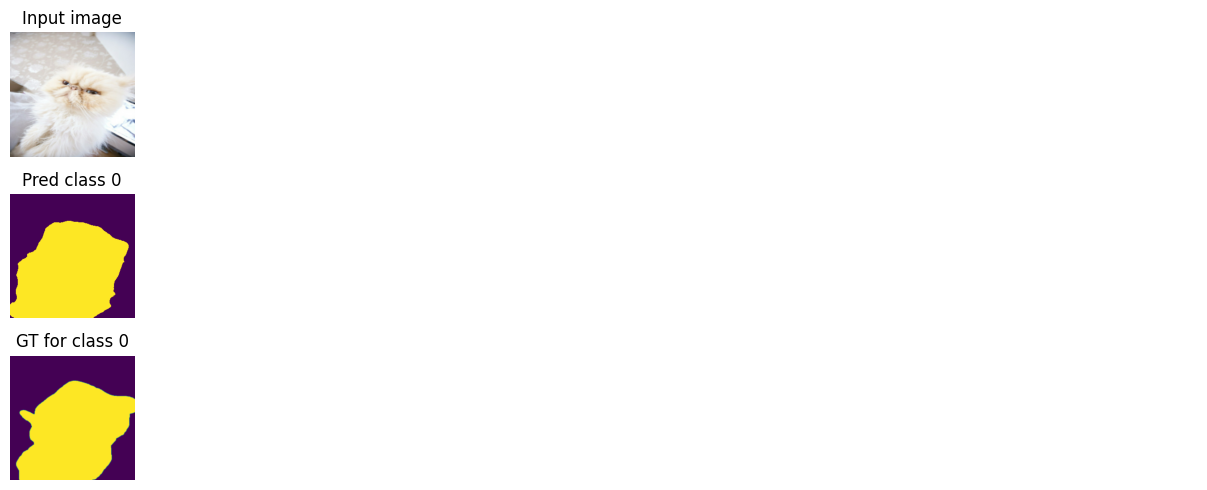

Train loss: 0.06608 | Time: 11m 49s | Val loss: 0.07828
Train_DICE_avg: 0.92293 | Train_Jaccard_avg: 0.86124 | Train_Sensitivity_avg: 0.95846 | Train_Specificity_avg: 0.92174 
Class 0 - Train_DICE: 0.92293 | Train_Jaccard: 0.86124 | Train_Sensitivity: 0.95846 | Train_Specificity: 0.92174 
Val_DICE_avg: 0.91244 | Val_Jaccard_avg: 0.84543 | Val_Sensitivity_avg: 0.94428 | Val_Specificity_avg: 0.92418 
Class 0 - Val_DICE: 0.91244 | Val_Jaccard: 0.84543 | Val_Sensitivity: 0.94428 | Val_Specificity: 0.92418 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06178 | Time: 12m 12s | Val loss: 0.07363
Train_DICE_avg: 0.92758 | Train_Jaccard_avg: 0.86920 | Train_Sensitivity_avg: 0.96144 | Train_Specificity_avg: 0.92611 
Class 0 - Train_DICE: 0.92758 | Train_Jaccard: 0.86920 | Train_Sensitivity: 0.96144 | Train_Specificity: 0.92611 
Val_DICE_avg: 0.91678 | Val_Jaccard_avg: 0.85253 | Val_Sensitivity_avg: 0.94838 | Val_Specificity_avg: 0.92696 
Class 0 - Val_DICE: 0.91678 | Val_Jaccard: 0.85253 | Val_Sensitivity: 0.94838 | Val_Specificity: 0.92696 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05998 | Time: 12m 35s | Val loss: 0.07234
Train_DICE_avg: 0.92946 | Train_Jaccard_avg: 0.87218 | Train_Sensitivity_avg: 0.96270 | Train_Specificity_avg: 0.92761 
Class 0 - Train_DICE: 0.92946 | Train_Jaccard: 0.87218 | Train_Sensitivity: 0.96270 | Train_Specificity: 0.92761 
Val_DICE_avg: 0.91852 | Val_Jaccard_avg: 0.85532 | Val_Sensitivity_avg: 0.94898 | Val_Specificity_avg: 0.92790 
Class 0 - Val_DICE: 0.91852 | Val_Jaccard: 0.85532 | Val_Sensitivity: 0.94898 | Val_Specificity: 0.92790 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05907 | Time: 12m 58s | Val loss: 0.07269
Train_DICE_avg: 0.93027 | Train_Jaccard_avg: 0.87369 | Train_Sensitivity_avg: 0.96341 | Train_Specificity_avg: 0.92835 
Class 0 - Train_DICE: 0.93027 | Train_Jaccard: 0.87369 | Train_Sensitivity: 0.96341 | Train_Specificity: 0.92835 
Val_DICE_avg: 0.91801 | Val_Jaccard_avg: 0.85481 | Val_Sensitivity_avg: 0.94878 | Val_Specificity_avg: 0.92854 
Class 0 - Val_DICE: 0.91801 | Val_Jaccard: 0.85481 | Val_Sensitivity: 0.94878 | Val_Specificity: 0.92854 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05699 | Time: 13m 21s | Val loss: 0.07147
Train_DICE_avg: 0.93227 | Train_Jaccard_avg: 0.87718 | Train_Sensitivity_avg: 0.96554 | Train_Specificity_avg: 0.92875 
Class 0 - Train_DICE: 0.93227 | Train_Jaccard: 0.87718 | Train_Sensitivity: 0.96554 | Train_Specificity: 0.92875 
Val_DICE_avg: 0.92226 | Val_Jaccard_avg: 0.86175 | Val_Sensitivity_avg: 0.94516 | Val_Specificity_avg: 0.93422 
Class 0 - Val_DICE: 0.92226 | Val_Jaccard: 0.86175 | Val_Sensitivity: 0.94516 | Val_Specificity: 0.93422 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

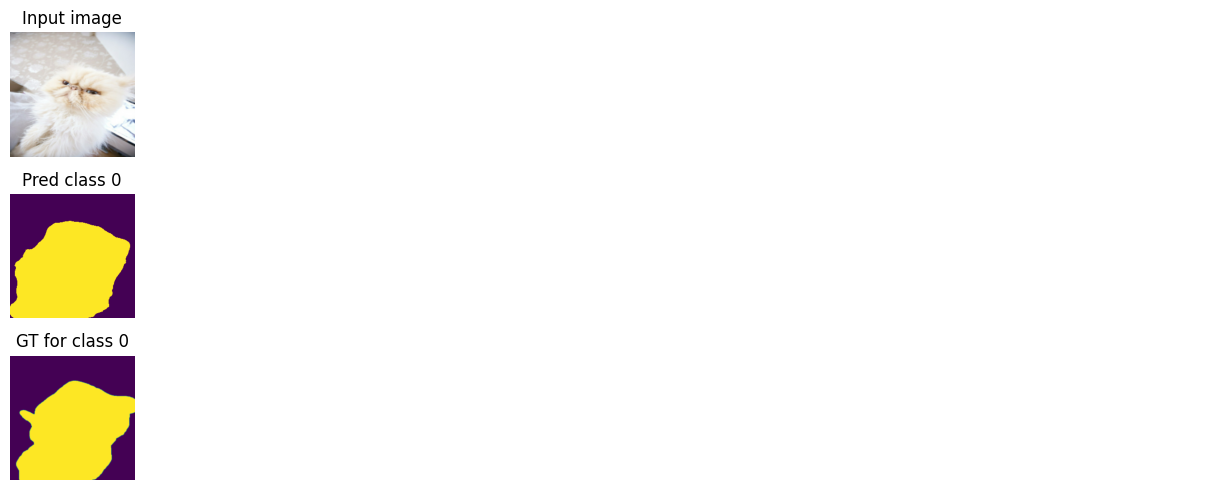

Train loss: 0.05623 | Time: 13m 44s | Val loss: 0.06977
Train_DICE_avg: 0.93338 | Train_Jaccard_avg: 0.87887 | Train_Sensitivity_avg: 0.96539 | Train_Specificity_avg: 0.92992 
Class 0 - Train_DICE: 0.93338 | Train_Jaccard: 0.87887 | Train_Sensitivity: 0.96539 | Train_Specificity: 0.92992 
Val_DICE_avg: 0.91978 | Val_Jaccard_avg: 0.85766 | Val_Sensitivity_avg: 0.95308 | Val_Specificity_avg: 0.92752 
Class 0 - Val_DICE: 0.91978 | Val_Jaccard: 0.85766 | Val_Sensitivity: 0.95308 | Val_Specificity: 0.92752 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05546 | Time: 14m 7s | Val loss: 0.06851
Train_DICE_avg: 0.93454 | Train_Jaccard_avg: 0.88087 | Train_Sensitivity_avg: 0.96547 | Train_Specificity_avg: 0.93213 
Class 0 - Train_DICE: 0.93454 | Train_Jaccard: 0.88087 | Train_Sensitivity: 0.96547 | Train_Specificity: 0.93213 
Val_DICE_avg: 0.91874 | Val_Jaccard_avg: 0.85580 | Val_Sensitivity_avg: 0.95763 | Val_Specificity_avg: 0.92494 
Class 0 - Val_DICE: 0.91874 | Val_Jaccard: 0.85580 | Val_Sensitivity: 0.95763 | Val_Specificity: 0.92494 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05389 | Time: 14m 30s | Val loss: 0.06793
Train_DICE_avg: 0.93595 | Train_Jaccard_avg: 0.88338 | Train_Sensitivity_avg: 0.96704 | Train_Specificity_avg: 0.93218 
Class 0 - Train_DICE: 0.93595 | Train_Jaccard: 0.88338 | Train_Sensitivity: 0.96704 | Train_Specificity: 0.93218 
Val_DICE_avg: 0.92301 | Val_Jaccard_avg: 0.86289 | Val_Sensitivity_avg: 0.95236 | Val_Specificity_avg: 0.93118 
Class 0 - Val_DICE: 0.92301 | Val_Jaccard: 0.86289 | Val_Sensitivity: 0.95236 | Val_Specificity: 0.93118 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05296 | Time: 14m 53s | Val loss: 0.06749
Train_DICE_avg: 0.93684 | Train_Jaccard_avg: 0.88487 | Train_Sensitivity_avg: 0.96785 | Train_Specificity_avg: 0.93318 
Class 0 - Train_DICE: 0.93684 | Train_Jaccard: 0.88487 | Train_Sensitivity: 0.96785 | Train_Specificity: 0.93318 
Val_DICE_avg: 0.92200 | Val_Jaccard_avg: 0.86109 | Val_Sensitivity_avg: 0.95478 | Val_Specificity_avg: 0.92804 
Class 0 - Val_DICE: 0.92200 | Val_Jaccard: 0.86109 | Val_Sensitivity: 0.95478 | Val_Specificity: 0.92804 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05239 | Time: 15m 16s | Val loss: 0.06748
Train_DICE_avg: 0.93768 | Train_Jaccard_avg: 0.88632 | Train_Sensitivity_avg: 0.96796 | Train_Specificity_avg: 0.93506 
Class 0 - Train_DICE: 0.93768 | Train_Jaccard: 0.88632 | Train_Sensitivity: 0.96796 | Train_Specificity: 0.93506 
Val_DICE_avg: 0.92348 | Val_Jaccard_avg: 0.86359 | Val_Sensitivity_avg: 0.95239 | Val_Specificity_avg: 0.93202 
Class 0 - Val_DICE: 0.92348 | Val_Jaccard: 0.86359 | Val_Sensitivity: 0.95239 | Val_Specificity: 0.93202 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

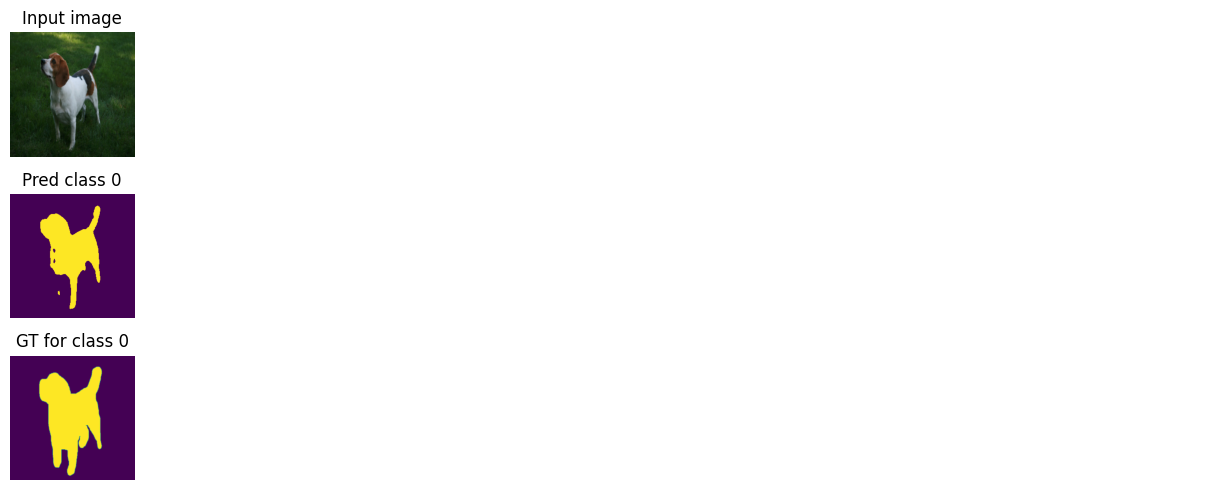

Train loss: 0.05132 | Time: 15m 39s | Val loss: 0.06744
Train_DICE_avg: 0.93863 | Train_Jaccard_avg: 0.88795 | Train_Sensitivity_avg: 0.96897 | Train_Specificity_avg: 0.93573 
Class 0 - Train_DICE: 0.93863 | Train_Jaccard: 0.88795 | Train_Sensitivity: 0.96897 | Train_Specificity: 0.93573 
Val_DICE_avg: 0.91912 | Val_Jaccard_avg: 0.85622 | Val_Sensitivity_avg: 0.95907 | Val_Specificity_avg: 0.92209 
Class 0 - Val_DICE: 0.91912 | Val_Jaccard: 0.85622 | Val_Sensitivity: 0.95907 | Val_Specificity: 0.92209 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05060 | Time: 16m 2s | Val loss: 0.06684
Train_DICE_avg: 0.93946 | Train_Jaccard_avg: 0.88940 | Train_Sensitivity_avg: 0.96947 | Train_Specificity_avg: 0.93616 
Class 0 - Train_DICE: 0.93946 | Train_Jaccard: 0.88940 | Train_Sensitivity: 0.96947 | Train_Specificity: 0.93616 
Val_DICE_avg: 0.92029 | Val_Jaccard_avg: 0.85832 | Val_Sensitivity_avg: 0.95894 | Val_Specificity_avg: 0.92495 
Class 0 - Val_DICE: 0.92029 | Val_Jaccard: 0.85832 | Val_Sensitivity: 0.95894 | Val_Specificity: 0.92495 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04993 | Time: 16m 25s | Val loss: 0.06609
Train_DICE_avg: 0.94020 | Train_Jaccard_avg: 0.89070 | Train_Sensitivity_avg: 0.96991 | Train_Specificity_avg: 0.93606 
Class 0 - Train_DICE: 0.94020 | Train_Jaccard: 0.89070 | Train_Sensitivity: 0.96991 | Train_Specificity: 0.93606 
Val_DICE_avg: 0.92132 | Val_Jaccard_avg: 0.85993 | Val_Sensitivity_avg: 0.95902 | Val_Specificity_avg: 0.92559 
Class 0 - Val_DICE: 0.92132 | Val_Jaccard: 0.85993 | Val_Sensitivity: 0.95902 | Val_Specificity: 0.92559 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05011 | Time: 16m 48s | Val loss: 0.06604
Train_DICE_avg: 0.94015 | Train_Jaccard_avg: 0.89059 | Train_Sensitivity_avg: 0.96948 | Train_Specificity_avg: 0.93704 
Class 0 - Train_DICE: 0.94015 | Train_Jaccard: 0.89059 | Train_Sensitivity: 0.96948 | Train_Specificity: 0.93704 
Val_DICE_avg: 0.92341 | Val_Jaccard_avg: 0.86352 | Val_Sensitivity_avg: 0.95591 | Val_Specificity_avg: 0.92998 
Class 0 - Val_DICE: 0.92341 | Val_Jaccard: 0.86352 | Val_Sensitivity: 0.95591 | Val_Specificity: 0.92998 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04934 | Time: 17m 11s | Val loss: 0.06681
Train_DICE_avg: 0.94084 | Train_Jaccard_avg: 0.89176 | Train_Sensitivity_avg: 0.97045 | Train_Specificity_avg: 0.93709 
Class 0 - Train_DICE: 0.94084 | Train_Jaccard: 0.89176 | Train_Sensitivity: 0.97045 | Train_Specificity: 0.93709 
Val_DICE_avg: 0.92461 | Val_Jaccard_avg: 0.86557 | Val_Sensitivity_avg: 0.95208 | Val_Specificity_avg: 0.93236 
Class 0 - Val_DICE: 0.92461 | Val_Jaccard: 0.86557 | Val_Sensitivity: 0.95208 | Val_Specificity: 0.93236 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

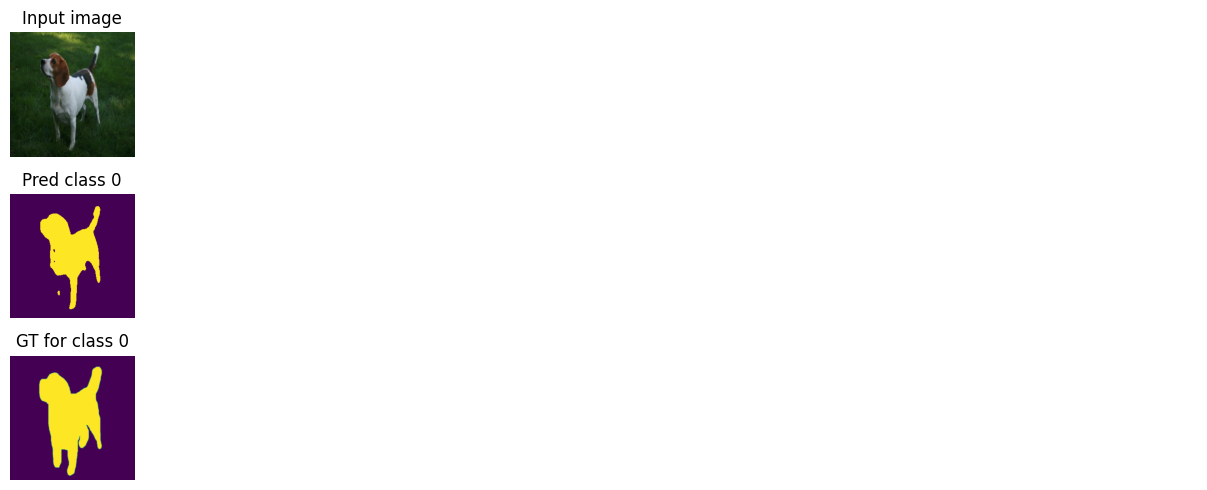

Train loss: 0.04858 | Time: 17m 34s | Val loss: 0.06608
Train_DICE_avg: 0.94200 | Train_Jaccard_avg: 0.89378 | Train_Sensitivity_avg: 0.97040 | Train_Specificity_avg: 0.93850 
Class 0 - Train_DICE: 0.94200 | Train_Jaccard: 0.89378 | Train_Sensitivity: 0.97040 | Train_Specificity: 0.93850 
Val_DICE_avg: 0.92130 | Val_Jaccard_avg: 0.86008 | Val_Sensitivity_avg: 0.95913 | Val_Specificity_avg: 0.92584 
Class 0 - Val_DICE: 0.92130 | Val_Jaccard: 0.86008 | Val_Sensitivity: 0.95913 | Val_Specificity: 0.92584 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04899 | Time: 17m 57s | Val loss: 0.06667
Train_DICE_avg: 0.94090 | Train_Jaccard_avg: 0.89191 | Train_Sensitivity_avg: 0.97114 | Train_Specificity_avg: 0.93688 
Class 0 - Train_DICE: 0.94090 | Train_Jaccard: 0.89191 | Train_Sensitivity: 0.97114 | Train_Specificity: 0.93688 
Val_DICE_avg: 0.92405 | Val_Jaccard_avg: 0.86459 | Val_Sensitivity_avg: 0.95319 | Val_Specificity_avg: 0.93205 
Class 0 - Val_DICE: 0.92405 | Val_Jaccard: 0.86459 | Val_Sensitivity: 0.95319 | Val_Specificity: 0.93205 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04806 | Time: 18m 20s | Val loss: 0.06602
Train_DICE_avg: 0.94230 | Train_Jaccard_avg: 0.89443 | Train_Sensitivity_avg: 0.97127 | Train_Specificity_avg: 0.93928 
Class 0 - Train_DICE: 0.94230 | Train_Jaccard: 0.89443 | Train_Sensitivity: 0.97127 | Train_Specificity: 0.93928 
Val_DICE_avg: 0.92289 | Val_Jaccard_avg: 0.86257 | Val_Sensitivity_avg: 0.95645 | Val_Specificity_avg: 0.92771 
Class 0 - Val_DICE: 0.92289 | Val_Jaccard: 0.86257 | Val_Sensitivity: 0.95645 | Val_Specificity: 0.92771 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04749 | Time: 18m 43s | Val loss: 0.06778
Train_DICE_avg: 0.94281 | Train_Jaccard_avg: 0.89521 | Train_Sensitivity_avg: 0.97168 | Train_Specificity_avg: 0.93858 
Class 0 - Train_DICE: 0.94281 | Train_Jaccard: 0.89521 | Train_Sensitivity: 0.97168 | Train_Specificity: 0.93858 
Val_DICE_avg: 0.92741 | Val_Jaccard_avg: 0.87036 | Val_Sensitivity_avg: 0.94542 | Val_Specificity_avg: 0.93981 
Class 0 - Val_DICE: 0.92741 | Val_Jaccard: 0.87036 | Val_Sensitivity: 0.94542 | Val_Specificity: 0.93981 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04703 | Time: 19m 6s | Val loss: 0.06717
Train_DICE_avg: 0.94337 | Train_Jaccard_avg: 0.89616 | Train_Sensitivity_avg: 0.97208 | Train_Specificity_avg: 0.94041 
Class 0 - Train_DICE: 0.94337 | Train_Jaccard: 0.89616 | Train_Sensitivity: 0.97208 | Train_Specificity: 0.94041 
Val_DICE_avg: 0.92582 | Val_Jaccard_avg: 0.86762 | Val_Sensitivity_avg: 0.94920 | Val_Specificity_avg: 0.93614 
Class 0 - Val_DICE: 0.92582 | Val_Jaccard: 0.86762 | Val_Sensitivity: 0.94920 | Val_Specificity: 0.93614 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

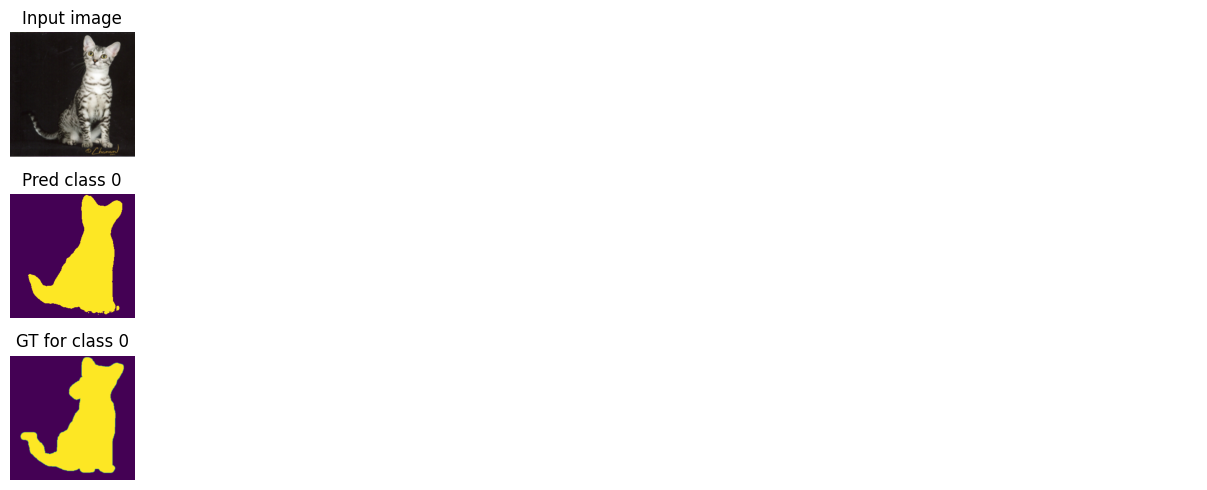

Train loss: 0.04714 | Time: 19m 29s | Val loss: 0.06648
Train_DICE_avg: 0.94367 | Train_Jaccard_avg: 0.89677 | Train_Sensitivity_avg: 0.97127 | Train_Specificity_avg: 0.94081 
Class 0 - Train_DICE: 0.94367 | Train_Jaccard: 0.89677 | Train_Sensitivity: 0.97127 | Train_Specificity: 0.94081 
Val_DICE_avg: 0.92691 | Val_Jaccard_avg: 0.86945 | Val_Sensitivity_avg: 0.94923 | Val_Specificity_avg: 0.93679 
Class 0 - Val_DICE: 0.92691 | Val_Jaccard: 0.86945 | Val_Sensitivity: 0.94923 | Val_Specificity: 0.93679 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04667 | Time: 19m 52s | Val loss: 0.06679
Train_DICE_avg: 0.94362 | Train_Jaccard_avg: 0.89667 | Train_Sensitivity_avg: 0.97241 | Train_Specificity_avg: 0.93933 
Class 0 - Train_DICE: 0.94362 | Train_Jaccard: 0.89667 | Train_Sensitivity: 0.97241 | Train_Specificity: 0.93933 
Val_DICE_avg: 0.92670 | Val_Jaccard_avg: 0.86910 | Val_Sensitivity_avg: 0.94879 | Val_Specificity_avg: 0.93722 
Class 0 - Val_DICE: 0.92670 | Val_Jaccard: 0.86910 | Val_Sensitivity: 0.94879 | Val_Specificity: 0.93722 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04624 | Time: 20m 15s | Val loss: 0.06712
Train_DICE_avg: 0.94454 | Train_Jaccard_avg: 0.89823 | Train_Sensitivity_avg: 0.97215 | Train_Specificity_avg: 0.94155 
Class 0 - Train_DICE: 0.94454 | Train_Jaccard: 0.89823 | Train_Sensitivity: 0.97215 | Train_Specificity: 0.94155 
Val_DICE_avg: 0.92792 | Val_Jaccard_avg: 0.87118 | Val_Sensitivity_avg: 0.94617 | Val_Specificity_avg: 0.94004 
Class 0 - Val_DICE: 0.92792 | Val_Jaccard: 0.87118 | Val_Sensitivity: 0.94617 | Val_Specificity: 0.94004 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04575 | Time: 20m 38s | Val loss: 0.06787
Train_DICE_avg: 0.94469 | Train_Jaccard_avg: 0.89857 | Train_Sensitivity_avg: 0.97323 | Train_Specificity_avg: 0.94099 
Class 0 - Train_DICE: 0.94469 | Train_Jaccard: 0.89857 | Train_Sensitivity: 0.97323 | Train_Specificity: 0.94099 
Val_DICE_avg: 0.92786 | Val_Jaccard_avg: 0.87102 | Val_Sensitivity_avg: 0.94441 | Val_Specificity_avg: 0.94051 
Class 0 - Val_DICE: 0.92786 | Val_Jaccard: 0.87102 | Val_Sensitivity: 0.94441 | Val_Specificity: 0.94051 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04585 | Time: 21m 2s | Val loss: 0.06821
Train_DICE_avg: 0.94471 | Train_Jaccard_avg: 0.89854 | Train_Sensitivity_avg: 0.97286 | Train_Specificity_avg: 0.94072 
Class 0 - Train_DICE: 0.94471 | Train_Jaccard: 0.89854 | Train_Sensitivity: 0.97286 | Train_Specificity: 0.94072 
Val_DICE_avg: 0.92796 | Val_Jaccard_avg: 0.87133 | Val_Sensitivity_avg: 0.94354 | Val_Specificity_avg: 0.94129 
Class 0 - Val_DICE: 0.92796 | Val_Jaccard: 0.87133 | Val_Sensitivity: 0.94354 | Val_Specificity: 0.94129 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

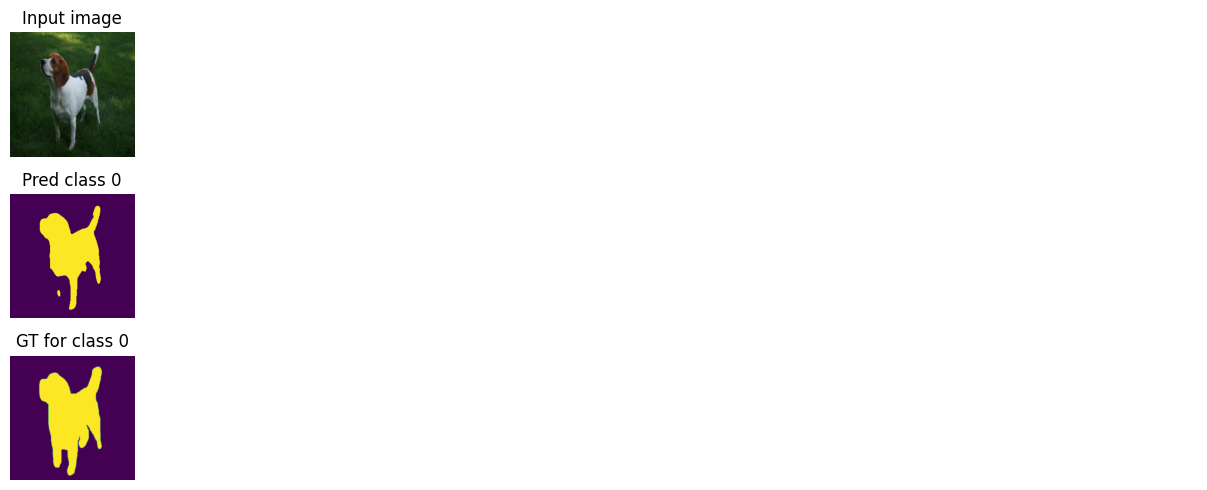

Train loss: 0.04652 | Time: 21m 25s | Val loss: 0.06702
Train_DICE_avg: 0.94427 | Train_Jaccard_avg: 0.89778 | Train_Sensitivity_avg: 0.97181 | Train_Specificity_avg: 0.94177 
Class 0 - Train_DICE: 0.94427 | Train_Jaccard: 0.89778 | Train_Sensitivity: 0.97181 | Train_Specificity: 0.94177 
Val_DICE_avg: 0.92762 | Val_Jaccard_avg: 0.87063 | Val_Sensitivity_avg: 0.94675 | Val_Specificity_avg: 0.93929 
Class 0 - Val_DICE: 0.92762 | Val_Jaccard: 0.87063 | Val_Sensitivity: 0.94675 | Val_Specificity: 0.93929 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04562 | Time: 21m 48s | Val loss: 0.06584
Train_DICE_avg: 0.94474 | Train_Jaccard_avg: 0.89853 | Train_Sensitivity_avg: 0.97328 | Train_Specificity_avg: 0.94090 
Class 0 - Train_DICE: 0.94474 | Train_Jaccard: 0.89853 | Train_Sensitivity: 0.97328 | Train_Specificity: 0.94090 
Val_DICE_avg: 0.92694 | Val_Jaccard_avg: 0.86935 | Val_Sensitivity_avg: 0.95052 | Val_Specificity_avg: 0.93540 
Class 0 - Val_DICE: 0.92694 | Val_Jaccard: 0.86935 | Val_Sensitivity: 0.95052 | Val_Specificity: 0.93540 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04503 | Time: 22m 11s | Val loss: 0.06703
Train_DICE_avg: 0.94572 | Train_Jaccard_avg: 0.90036 | Train_Sensitivity_avg: 0.97335 | Train_Specificity_avg: 0.94206 
Class 0 - Train_DICE: 0.94572 | Train_Jaccard: 0.90036 | Train_Sensitivity: 0.97335 | Train_Specificity: 0.94206 
Val_DICE_avg: 0.92811 | Val_Jaccard_avg: 0.87151 | Val_Sensitivity_avg: 0.94598 | Val_Specificity_avg: 0.94016 
Class 0 - Val_DICE: 0.92811 | Val_Jaccard: 0.87151 | Val_Sensitivity: 0.94598 | Val_Specificity: 0.94016 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04443 | Time: 22m 34s | Val loss: 0.06593
Train_DICE_avg: 0.94630 | Train_Jaccard_avg: 0.90143 | Train_Sensitivity_avg: 0.97387 | Train_Specificity_avg: 0.94266 
Class 0 - Train_DICE: 0.94630 | Train_Jaccard: 0.90143 | Train_Sensitivity: 0.97387 | Train_Specificity: 0.94266 
Val_DICE_avg: 0.92755 | Val_Jaccard_avg: 0.87047 | Val_Sensitivity_avg: 0.94948 | Val_Specificity_avg: 0.93699 
Class 0 - Val_DICE: 0.92755 | Val_Jaccard: 0.87047 | Val_Sensitivity: 0.94948 | Val_Specificity: 0.93699 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04453 | Time: 22m 57s | Val loss: 0.06629
Train_DICE_avg: 0.94622 | Train_Jaccard_avg: 0.90116 | Train_Sensitivity_avg: 0.97381 | Train_Specificity_avg: 0.94192 
Class 0 - Train_DICE: 0.94622 | Train_Jaccard: 0.90116 | Train_Sensitivity: 0.97381 | Train_Specificity: 0.94192 
Val_DICE_avg: 0.92786 | Val_Jaccard_avg: 0.87105 | Val_Sensitivity_avg: 0.94815 | Val_Specificity_avg: 0.93881 
Class 0 - Val_DICE: 0.92786 | Val_Jaccard: 0.87105 | Val_Sensitivity: 0.94815 | Val_Specificity: 0.93881 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

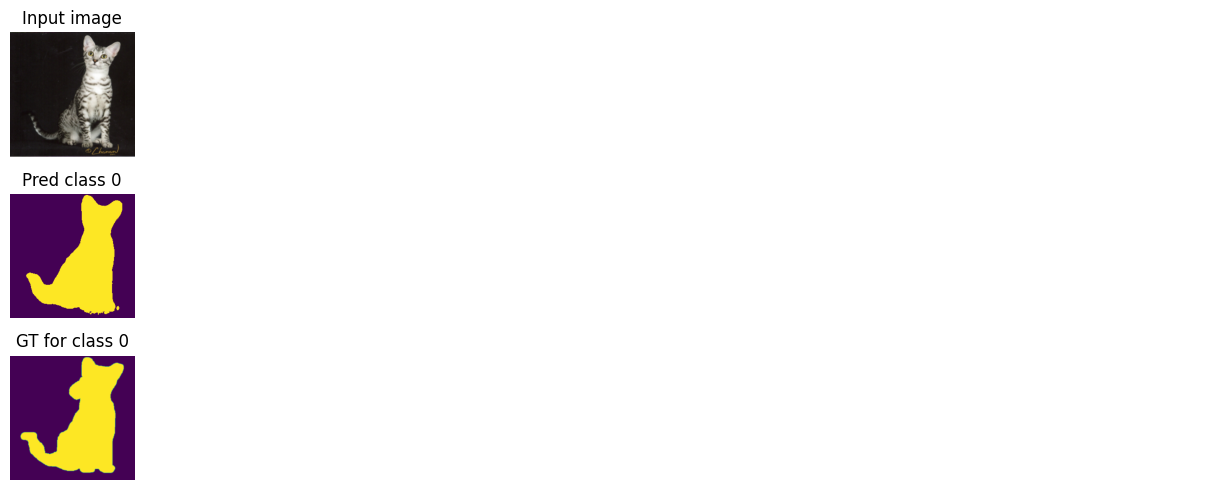

Train loss: 0.04446 | Time: 23m 20s | Val loss: 0.06614
Train_DICE_avg: 0.94644 | Train_Jaccard_avg: 0.90162 | Train_Sensitivity_avg: 0.97374 | Train_Specificity_avg: 0.94313 
Class 0 - Train_DICE: 0.94644 | Train_Jaccard: 0.90162 | Train_Sensitivity: 0.97374 | Train_Specificity: 0.94313 
Val_DICE_avg: 0.92766 | Val_Jaccard_avg: 0.87072 | Val_Sensitivity_avg: 0.94873 | Val_Specificity_avg: 0.93768 
Class 0 - Val_DICE: 0.92766 | Val_Jaccard: 0.87072 | Val_Sensitivity: 0.94873 | Val_Specificity: 0.93768 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]



Global Performance Metrics:
Loss mean: 0.06143, std: 0.00827
Dice Coefficient mean: 0.93442, std: 0.04196
Jaccard Index mean: 0.87959, std: 0.06825
Sensitivity mean: 0.92533, std: 0.05371
Specificity mean: 0.96722, std: 0.04186

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.93442, std: 0.04196
Jaccard mean: 0.87959, std: 0.06825
Sensitivity mean: 0.92533, std: 0.05371
Specificity mean: 0.96722, std: 0.04186
